# **Analysis of Go-To-Market Stragfery for investment in cab industry**


**Project Workflow:**
1.	Data Collection and Understanding
2.	Exploratory Data Analysis (EDA)
3.	Feature Engineering and Data Transformation
4.  Insights Generation
5.	Hypothesis Testing
6.	Conclusion




In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import string
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.api as sm
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [20]:
#!pip install cmasher

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df_cab= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Cab_Data.csv')
df_city= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/City.csv')
df_customer= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Customer_ID.csv')
df_transaction= pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/Transaction_ID.csv')
df_holidays=pd.read_csv('/content/drive/My Drive/Dataset/G2M Cab_DataSets/US_Holiday_Dates.csv')

# **Undrestanding the data**

**Cab Data:** this file includes details of transaction for 2 cab companies 'Pink Cab' and 'Yellow Cab'

``Transaction ID:`` A unique identifier alloted to each transaction

``Date of Travel:`` The date on which the cab service was availed by the customer

``Company:`` Indicates the cab company associated with the transaction

``City:`` Specifies the city in which the cab service was utilized

``KM Travelled:`` Represents the distance covered during the cab ride

``Price Charged:`` Denotes the amount charged to the customer for availing the cab service

``Cost of Trip:`` Indicates the operational cost incurred by the cab companies for facilitating the trip

In [23]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [24]:
print(df_cab.shape)
df_cab.sample(3)

(359392, 7)


Transaction ID  Date of Travel     Company           City  \
161395        10199122           42938  Yellow Cab  WASHINGTON DC   
121509        10149334           42790  Yellow Cab  WASHINGTON DC   
265529        10325699           43221  Yellow Cab    NEW YORK NY   

        KM Travelled  Price Charged  Cost of Trip  
161395          4.85          62.74        62.274  
121509         43.32         760.86       571.824  
265529         34.65         943.46       490.644

# City Data

``City:`` Refers to the name of the city where the cab service is provided.

``Population:`` Indicates the total population of the city where the cab service operates.

``Users:`` Represents the number of users or customers availing cab services in the respective city.

In [25]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [26]:
print(df_city.shape)
df_city.sample(3)

(20, 3)


City Population     Users
9   ATLANTA GA   814,885    24,701 
11   AUSTIN TX   698,371    14,978 
12  SEATTLE WA   671,238    25,063

In [27]:
df_city

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

# Customer Data

``Customer ID:`` This is a unique identifier assigned to each customer using the cab service.

``Gender:`` Indicates the gender of the customer availing the cab service.

``Age:`` Represents the age of the customer availing the cab service.

``Income (USD/Month):`` Indicates the monthly income of the customer in USD.

In [28]:
print(df_customer.shape)
df_customer.info()

(49171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [29]:
df_customer.sample(3)

Customer ID  Gender  Age  Income (USD/Month)
5747          2183    Male   44               19429
11399         8478    Male   23               15810
30072        12037  Female   18               11086

# Transaction data

``Transaction ID:`` This is a unique identifier assigned to each payment.

``Customer ID:`` This is a unique identifier assigned to each customer using the cab service. It helps in associating transactions with specific customers and understanding their usage patterns.

``Payment_Mode:`` Indicates the mode of payment used for the transaction, such as cash or credit/debit card.

In [30]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [31]:
print(df_transaction.shape)
df_transaction.sample(3)

(440098, 3)


Transaction ID  Customer ID Payment_Mode
266961        10266972        44714         Card
355057        10355068         2540         Cash
25791         10025802        52546         Cash

In [32]:
df_transaction.describe().T

count          mean            std         min  \
Transaction ID  440098.0  1.022006e+07  127045.493722  10000011.0   
Customer ID     440098.0  2.361951e+04   21195.549816         1.0   

                        25%         50%          75%         max  
Transaction ID  10110035.25  10220059.5  10330083.75  10440108.0  
Customer ID         3530.00     15168.0     43884.00     60000.0

# Holiday Data

The holiday data file contains information about holidays observed, including the date, holiday name, day of the week, month, and year.

``Date:`` This field represents the date of the holiday

``Holiday:`` This field contains the name or description of the holiday being observed.

``WeekDay:`` This field indicates the day of the week on which the holiday falls.

``Month:`` This field represents the month in which the holiday occurred

``Day:`` This field represents the day of the month on which the holiday occurred.

``Year:`` This field represents the year in which the holiday occurred.

In [33]:
df_holidays.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [34]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [35]:
print(df_holidays.shape)


(342, 6)


In [36]:
df_holidays.head(3)

Date      Holiday  WeekDay  Month  Day  Year
0  2004-07-04  4th of July   Sunday      7    4  2004
1  2005-07-04  4th of July   Monday      7    4  2005
2  2006-07-04  4th of July  Tuesday      7    4  2006

**Filtering Holiday data**

We need to filter holiday between 01/2016 to 12/2018 as the main dataset Cab data period ranges from 01/2016 to 12/2018 as the main dataset Cab data period ranges from

In [37]:
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])
holidays_filtered_df = df_holidays[(df_holidays['Date'] >= '2016-01-01') & (df_holidays['Date'] <= '2018-12-31')]
holidays_filtered_df.sample(3)

Date           Holiday   WeekDay  Month  Day  Year
61  2016-10-10      Columbus Day    Monday     10   10  2016
236 2018-11-22  Thanksgiving Day  Thursday     11   22  2018
48  2016-12-24     Christmas Eve  Saturday     12   24  2016

**Null Values**

In [38]:
print(f" Null values in Cab data: {df_cab.isnull().sum().sum()}")
print(f" \n Null values in City data: {df_city.isnull().sum().sum()}")
print(f" \n Null values in Customer data: {df_customer.isnull().sum().sum()}")
print(f" \n Null values in Transaction data: {df_transaction.isnull().sum().sum()}")

 Null values in Cab data: 0
 
 Null values in City data: 0
 
 Null values in Customer data: 0
 
 Null values in Transaction data: 0


**Missing Values**

In [39]:
df_cab.describe(include='all')

Transaction ID  Date of Travel     Company         City  \
count     3.593920e+05   359392.000000      359392       359392   
unique             NaN             NaN           2           19   
top                NaN             NaN  Yellow Cab  NEW YORK NY   
freq               NaN             NaN      274681        99885   
mean      1.022076e+07    42964.067998         NaN          NaN   
std       1.268058e+05      307.467197         NaN          NaN   
min       1.000001e+07    42371.000000         NaN          NaN   
25%       1.011081e+07    42697.000000         NaN          NaN   
50%       1.022104e+07    42988.000000         NaN          NaN   
75%       1.033094e+07    43232.000000         NaN          NaN   
max       1.044011e+07    43465.000000         NaN          NaN   

         KM Travelled  Price Charged   Cost of Trip  
count   359392.000000  359392.000000  359392.000000  
unique            NaN            NaN            NaN  
top               NaN            NaN            NaN  
freq              NaN            NaN            NaN  
mean        22.567254     423.443311     286.190113  
std         12.233526     274.378911     157.993661  
min          1.900000      15.600000      19.000000  
25%         12.000000     206.437500     151.200000  
50%         22.440000     386.360000     282.480000  
75%         32.960000     583.660000     413.683200  
max         48.000000    2048.030000     691.200000

In [40]:
print(f" Missing values in Cab data: {df_cab.isna().any().any()}")
print(f" \n Missing values in City data: {df_city.isna().any().any()}")
print(f" \n Missing values in Customer data: {df_customer.isna().any().any()}")
print(f" \n Missing values in Transaction data: {df_transaction.isna().any().any()}")

 Missing values in Cab data: False
 
 Missing values in City data: False
 
 Missing values in Customer data: False
 
 Missing values in Transaction data: False


**Duplicate records**

In [41]:
print(f" Duplicate records -- Cab data: {df_cab.duplicated().sum()}")
print(f" \n Duplicate records -- City data: {df_city.duplicated().sum()}")
print(f" \n Duplicate records -- Customer data: {df_customer.duplicated().sum()}")
print(f" \n Duplicate records -- Transaction data: {df_transaction.duplicated().sum()}")

 Duplicate records -- Cab data: 0
 
 Duplicate records -- City data: 0
 
 Duplicate records -- Customer data: 0
 
 Duplicate records -- Transaction data: 0


# **Data Preprocessing**


1.   Rename columns in datframe
2.   Feature Engineering : Creating  new features
3.   Remove punctuations in record values



**Rename columns in all dataframes**

In [42]:
dataframes=[df_cab,df_customer,df_transaction]
for df in dataframes:
  for col in df.columns:
    if ' ' in col:
      df.rename(columns={col: col.replace(' ', '_')}, inplace=True)

**Data Transformation**

**``Note``** that the **``Date_of_Travel``** column contains date  in Excel numberical format. We know that the given dataset period ranges from 31/01/2016 to 31/12/2018. Hence we conver the serial number into date format and store it in a new colum called **``Trave_Date``**

In [43]:
df_cab.tail()

Transaction_ID  Date_of_Travel     Company           City  \
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192

In [44]:
# Serial number to date format
import xlrd
def serial_to_date(serial_number):
  datetime_date = xlrd.xldate_as_datetime(serial_number, 0)
  return datetime_date.date()

In [45]:
df_cab["Travel_Date"] = df_cab["Date_of_Travel"].apply(serial_to_date)
df_cab["Travel_Date"] = df_cab["Travel_Date"].astype('datetime64[ms]')

**Feature Engineering**

Extract year, month, day using datetime methods

In [46]:
df_cab['Year'] = df_cab['Travel_Date'].dt.year
df_cab['Month'] = df_cab['Travel_Date'].dt.month
df_cab['Day'] = df_cab['Travel_Date'].dt.day
df_cab['Day_of_week'] = df_cab['Travel_Date'].dt.dayofweek
df_cab['Day_of_week_name'] = df_cab['Travel_Date'].dt.day_name()
df_cab['Weekend'] = df_cab['Day_of_week'].isin([5, 6]).astype(int)

In [47]:
df_cab.head()

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip Travel_Date  Year  Month  Day  Day_of_week  \
0         370.95       313.635  2016-01-08  2016      1    8            4   
1         358.52       334.854  2016-01-06  2016      1    6            2   
2         125.20        97.632  2016-01-02  2016      1    2            5   
3         377.40       351.602  2016-01-07  2016      1    7            3   
4         114.62        97.776  2016-01-03  2016      1    3            6   

  Day_of_week_name  Weekend  
0           Friday        0  
1        Wednesday        0  
2         Saturday        1  
3         Thursday        0  
4           Sunday        1

Change the column name in easy format like **Income_(USD/Month)** to **"Income"**

In [48]:
df_customer.rename(columns={"Income_(USD/Month)": "Income"}, inplace=True)
df_customer.sample(3)

Customer_ID  Gender  Age  Income
33712        15803  Female   18    9393
5884         18327    Male   19   20472
9455           399  Female   19   23901

**Remove punctuations in records**

In [49]:
df_city.head(2)

City   Population      Users
0  NEW YORK NY   8,405,837    302,149 
1   CHICAGO IL   1,955,130    164,468

In [50]:
def preprocess_text(text):
    # Remove punctuation:
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Convert to integer
    try:
        result = int(no_punctuation)
    except ValueError:
        # Handle cases where the text cannot be converted to an integer
        result = None

    return result

In [51]:
df_city['Population']=df_city['Population'].apply(preprocess_text)
df_city['Users']=df_city['Users'].apply(preprocess_text)

# **Exploratory Data Analysis**

# Merge the data

Create a master data by merging Cab data, Transaytion data , Customer data and City data

# **Relationships across Files**
**Cab_Data.csv** links to Transaction_ID.csv via a transaction ID.

**Transaction_ID.csv** links to Customer_ID.csv via a customer ID.

**Customer_ID.csv** links to City.csv via a City field

In [52]:
df_transaction.shape
print(f" Count of duplicate Transaction ID records in Cab data: {df_cab.duplicated().sum()}")

 Count of duplicate Transaction ID records in Cab data: 0


In [53]:
# Transaction_ID is the unique identifier
merged_df = pd.merge(left=df_cab, right=df_transaction, on='Transaction_ID', how='inner')

#merge with Customer_ID based on Customer_ID in transaction_id
merged_df = pd.merge(left=merged_df, right=df_customer, on='Customer_ID', how='inner')

# merge with City based on City in Cab_Data
merged_df = pd.merge(left=merged_df, right=df_city, left_on='City', right_on='City', how='inner')

# merge with Holiday data on Month and Day
merged_df = pd.merge(left=merged_df, right= holidays_filtered_df[['Month', 'Day', 'Holiday']],
                    how='left', on=['Month', 'Day'])
merged_df.head(3)

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price_Charged  Cost_of_Trip Travel_Date  Year  Month  ...  \
0         370.95       313.635  2016-01-08  2016      1  ...   
1         358.52       334.854  2016-01-06  2016      1  ...   
2         125.20        97.632  2016-01-02  2016      1  ...   

   Day_of_week_name  Weekend Customer_ID  Payment_Mode  Gender Age Income  \
0            Friday        0       29290          Card    Male  28  10813   
1         Wednesday        0       27703          Card    Male  27   9237   
2          Saturday        1       28712          Cash    Male  53  11242   

   Population  Users  Holiday  
0      814885  24701      NaN  
1      814885  24701      NaN  
2      814885  24701      NaN  

[3 rows x 22 columns]

**``Note:-``** The **``Holiday``** Column includes null values that failed to match. To determine whether the specified day is a holiday or not, let's add a new column called **``Holiday_Indicator``**.

In [54]:
merged_df['Holiday_Indicator'] = merged_df['Holiday'].notnull().astype(int)
merged_df.head(3)

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price_Charged  Cost_of_Trip Travel_Date  Year  Month  ...  Weekend  \
0         370.95       313.635  2016-01-08  2016      1  ...        0   
1         358.52       334.854  2016-01-06  2016      1  ...        0   
2         125.20        97.632  2016-01-02  2016      1  ...        1   

   Customer_ID Payment_Mode  Gender  Age Income Population  Users  Holiday  \
0        29290         Card    Male   28  10813     814885  24701      NaN   
1        27703         Card    Male   27   9237     814885  24701      NaN   
2        28712         Cash    Male   53  11242     814885  24701      NaN   

   Holiday_Indicator  
0                  0  
1                  0  
2                  0  

[3 rows x 23 columns]

In [55]:
merged_df['Profit'] = merged_df['Price_Charged']-merged_df['Cost_of_Trip']
merged_df['Profit_Percentage'] = (merged_df['Profit'] / merged_df['Price_Charged']) * 100
merged_df=merged_df.round(2)
merged_df.head()

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip Travel_Date  Year  Month  ...  Payment_Mode  \
0         370.95        313.64  2016-01-08  2016      1  ...          Card   
1         358.52        334.85  2016-01-06  2016      1  ...          Card   
2         125.20         97.63  2016-01-02  2016      1  ...          Cash   
3         377.40        351.60  2016-01-07  2016      1  ...          Cash   
4         114.62         97.78  2016-01-03  2016      1  ...          Card   

   Gender Age  Income  Population  Users Holiday  Holiday_Indicator  Profit  \
0    Male  28   10813      814885  24701     NaN                  0   57.32   
1    Male  27    9237      814885  24701     NaN                  0   23.67   
2    Male  53   11242      814885  24701     NaN                  0   27.57   
3    Male  23   23327      814885  24701     NaN                  0   25.80   
4    Male  33    8536      814885  24701     NaN                  0   16.84   

   Profit_Percentage  
0              15.45  
1               6.60  
2              22.02  
3               6.84  
4              14.70  

[5 rows x 25 columns]

In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386799 entries, 0 to 386798
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     386799 non-null  int64         
 1   Date_of_Travel     386799 non-null  int64         
 2   Company            386799 non-null  object        
 3   City               386799 non-null  object        
 4   KM_Travelled       386799 non-null  float64       
 5   Price_Charged      386799 non-null  float64       
 6   Cost_of_Trip       386799 non-null  float64       
 7   Travel_Date        386799 non-null  datetime64[ms]
 8   Year               386799 non-null  int32         
 9   Month              386799 non-null  int32         
 10  Day                386799 non-null  int32         
 11  Day_of_week        386799 non-null  int32         
 12  Day_of_week_name   386799 non-null  object        
 13  Weekend            386799 non-null  int64   

In [57]:
data=merged_df.copy()

**Drop the not required columns**

Example: **``Date_of_Travel``** is in series format and we have new column **``Travel_Date``** with date format. So we can drop the Date_of_Travel column

In [58]:
data = data.drop(['Date_of_Travel'], axis=1)

In [59]:
print(f" Null values in Merged data: {data.isnull().sum().sum()}")

 Null values in Merged data: 325625


**``Note:-``** As we have seen earlier Null values are because of Holiday data. So lets handle Null Values.

In [60]:
data['Holiday'].fillna(0, inplace=True)
print(f" Null values in Merged data: {data.isnull().sum().sum()}")

 Null values in Merged data: 0


**Handle Duplicate data after merging the data**

In [61]:
print(f" Duplicate records in Merged data: {data.duplicated().sum()}")

 Duplicate records in Merged data: 20969


In [62]:
#Fetch all duplicate values
duplicate=data[data.duplicated(keep='last')]
duplicate.head()

Transaction_ID   Company       City  KM_Travelled  Price_Charged  \
5633        10007271  Pink Cab  BOSTON MA         35.35         309.89   
5634        10007271  Pink Cab  BOSTON MA         35.35         309.89   
5640        10007276  Pink Cab  BOSTON MA         11.76         107.62   
5641        10007276  Pink Cab  BOSTON MA         11.76         107.62   
5646        10007280  Pink Cab  BOSTON MA          9.09          93.70   

      Cost_of_Trip Travel_Date  Year  Month  Day  ...  Payment_Mode  Gender  \
5633        399.46  2016-02-14  2016      2   14  ...          Cash  Female   
5634        399.46  2016-02-14  2016      2   14  ...          Cash  Female   
5640        138.77  2016-02-14  2016      2   14  ...          Card    Male   
5641        138.77  2016-02-14  2016      2   14  ...          Card    Male   
5646         96.35  2016-02-14  2016      2   14  ...          Card    Male   

      Age  Income Population  Users          Holiday  Holiday_Indicator  \
5633   33    5688     248968  80021  Valentine’s Day                  1   
5634   33    5688     248968  80021  Valentine’s Day                  1   
5640   28   10235     248968  80021  Valentine’s Day                  1   
5641   28   10235     248968  80021  Valentine’s Day                  1   
5646   56   16282     248968  80021  Valentine’s Day                  1   

      Profit  Profit_Percentage  
5633  -89.56             -28.90  
5634  -89.56             -28.90  
5640  -31.15             -28.94  
5641  -31.15             -28.94  
5646   -2.65              -2.83  

[5 rows x 24 columns]

In [63]:
#Remove Duplicate Records
data.drop_duplicates(inplace=True)
data.duplicated().sum()
print(f" Duplicate records in Merged data: {data.duplicated().sum()}")

 Duplicate records in Merged data: 0


In [64]:
print(f" Missing values in Merged data: {data.isna().any().any()}")

 Missing values in Merged data: False


# **Numerical Features**

In [65]:
numerical_variables = [feature for feature in data.columns if merged_df[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

data[numerical_variables].sample(1)

Number of numberical variables: 18


Transaction_ID  KM_Travelled  Price_Charged  Cost_of_Trip Travel_Date  \
240085        10272361          29.4         407.07        412.78  2017-12-07   

        Year  Month  Day  Day_of_week  Weekend  Customer_ID  Age  Income  \
240085  2017     12    7            3        0         8997   22    3155   

        Population   Users  Holiday_Indicator  Profit  Profit_Percentage  
240085     1595037  144132                  0   -5.71               -1.4

# **Categorial Features**

In [66]:
categorial_variables = [feature for feature in data.columns if merged_df[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

data[categorial_variables].sample(1)

Number of categorial variables: 6


Company            City Day_of_week_name Payment_Mode Gender Holiday
192242  Pink Cab  LOS ANGELES CA           Sunday         Card   Male       0

# **Univariate Analysis**

**1. Numerical  variables**

Transaction_ID
Skew : 0.0


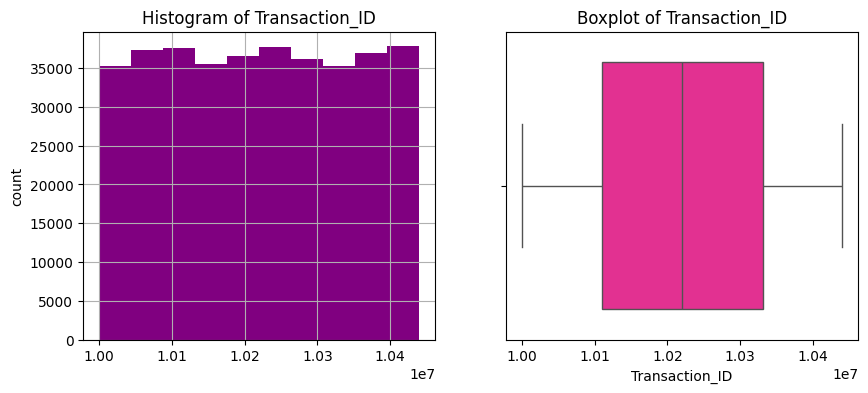

KM_Travelled
Skew : 0.06


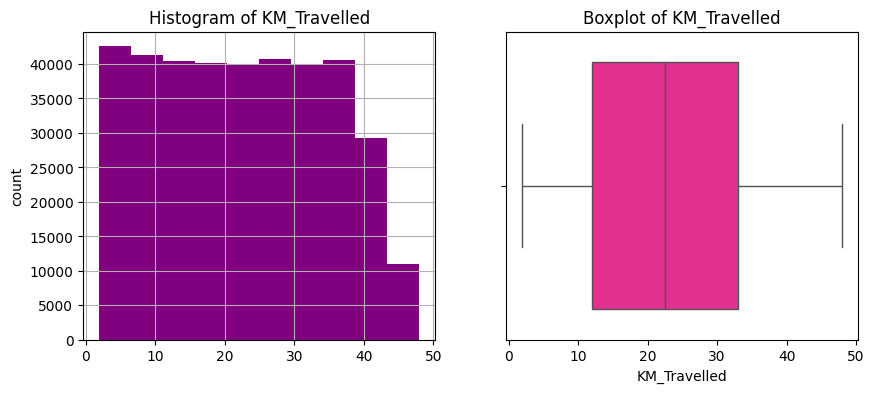

Price_Charged
Skew : 0.87


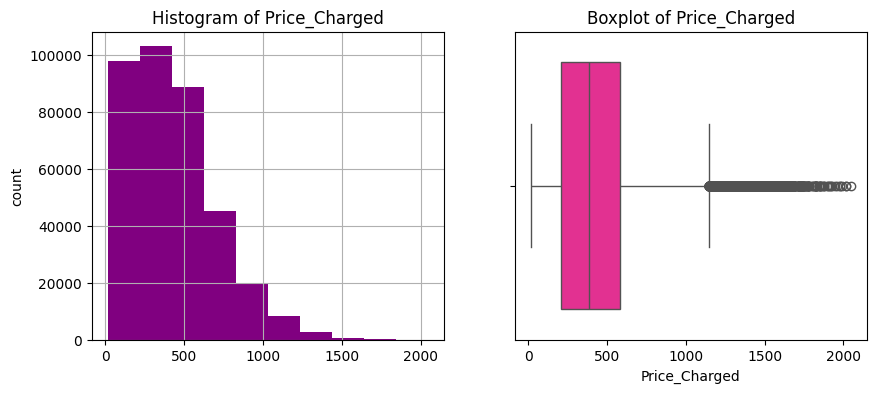

Cost_of_Trip
Skew : 0.14


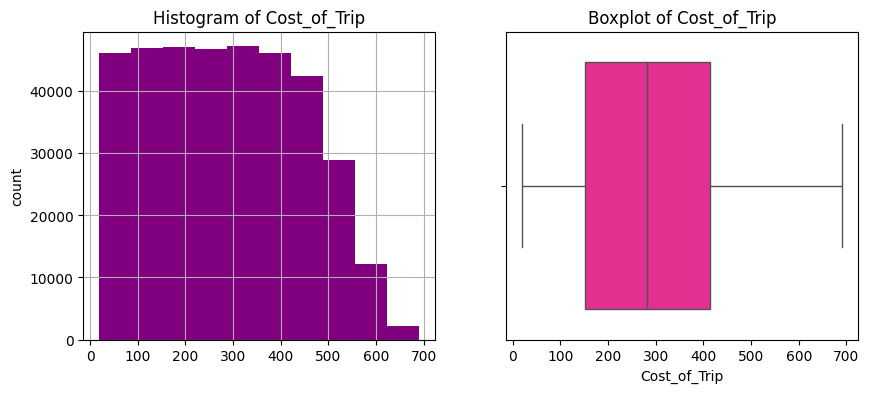

Year
Skew : -0.08


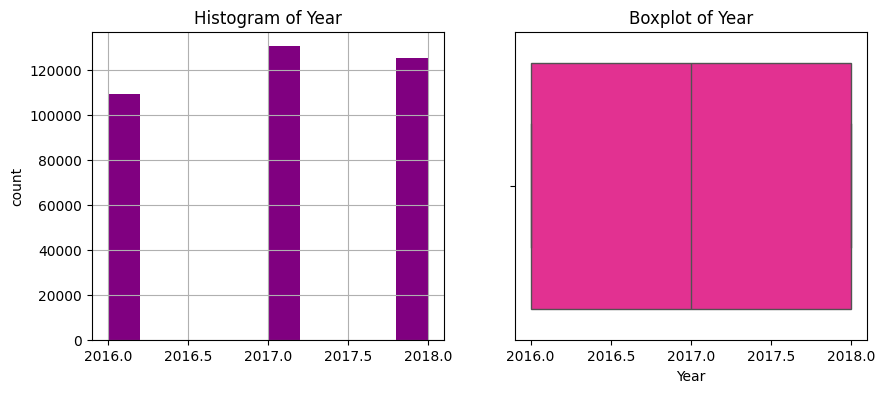

Month
Skew : -0.41


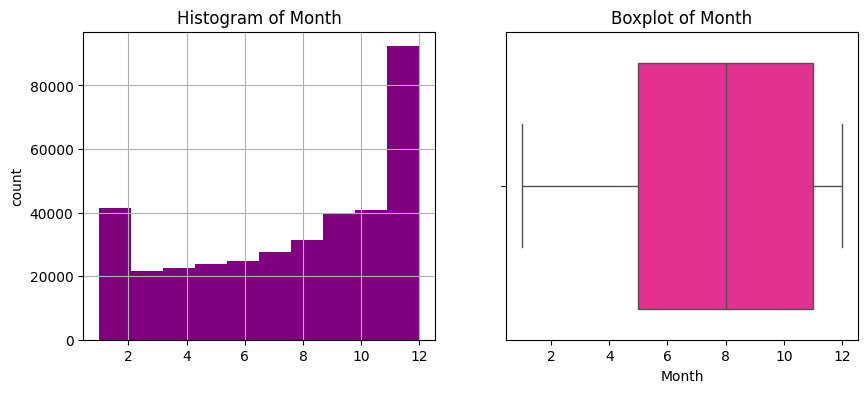

Day
Skew : 0.02


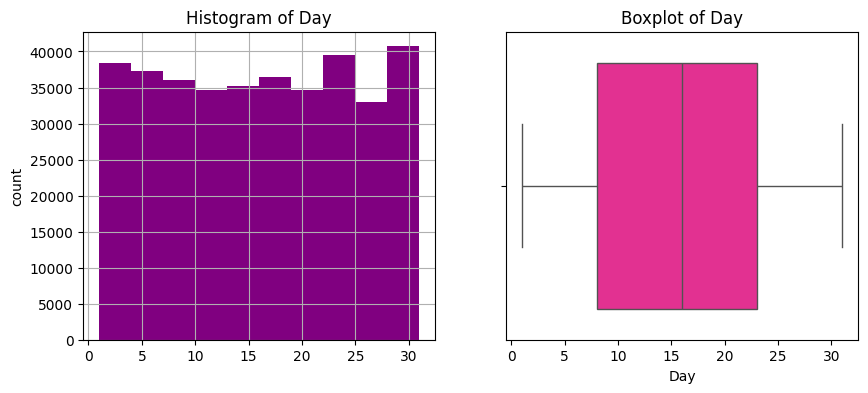

Day_of_week
Skew : -0.61


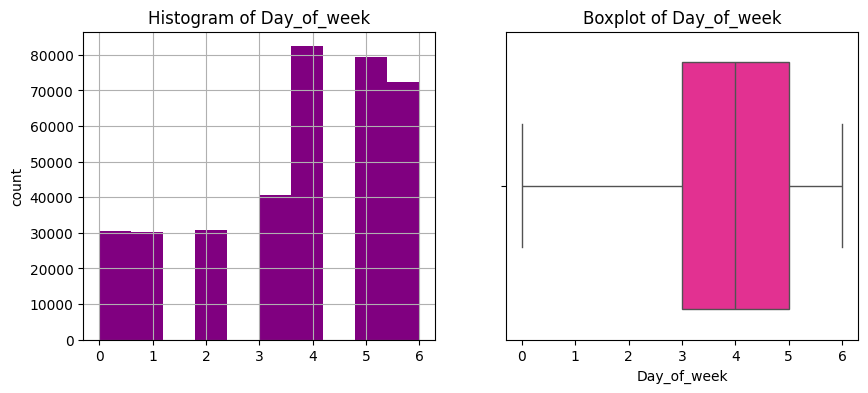

Weekend
Skew : 0.35


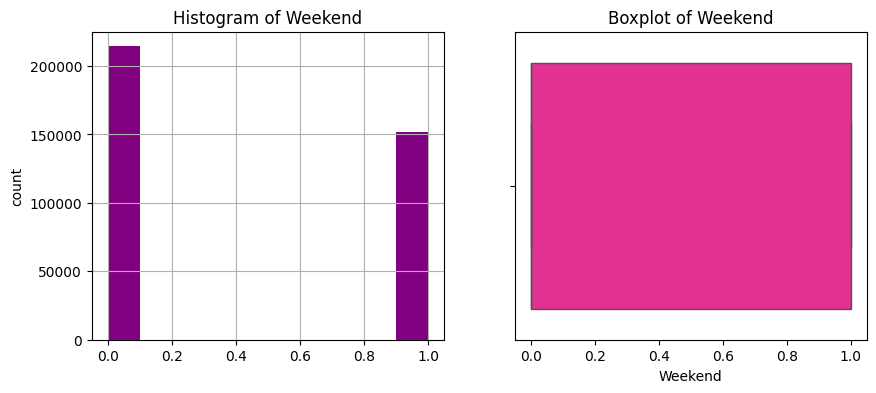

Customer_ID
Skew : 0.88


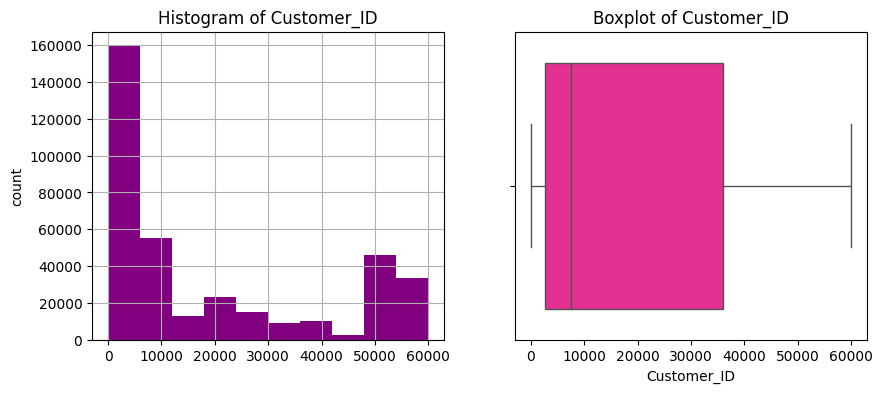

Age
Skew : 0.69


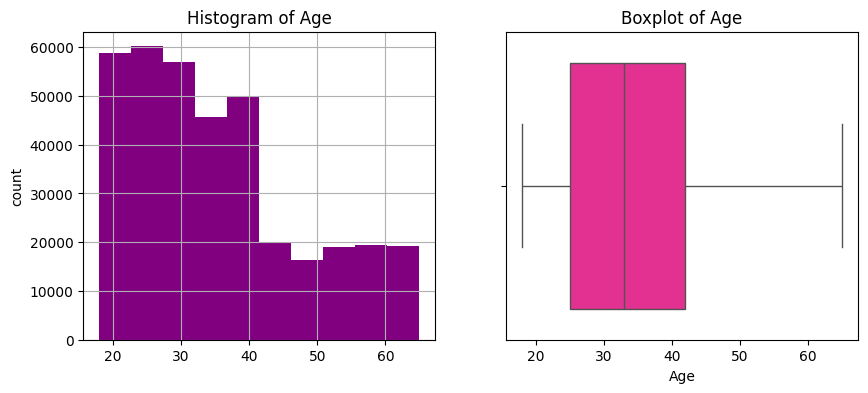

Income
Skew : 0.31


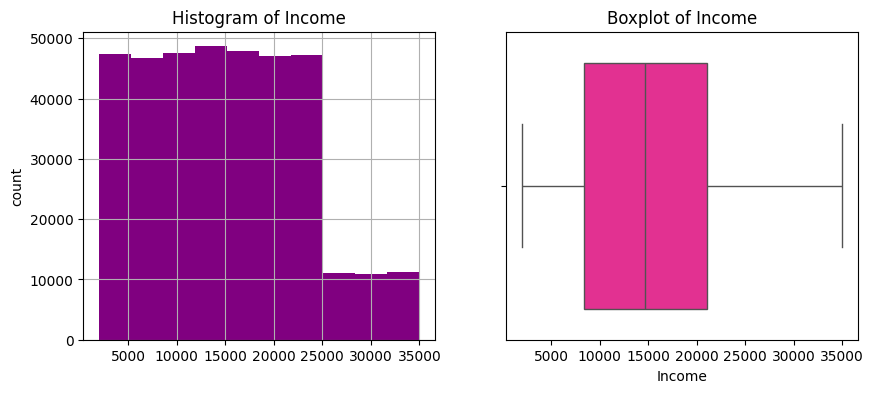

Population
Skew : 0.9


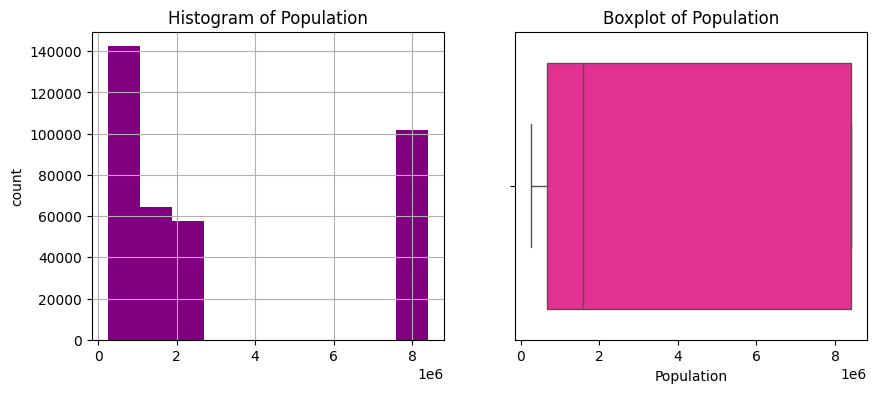

Users
Skew : 0.27


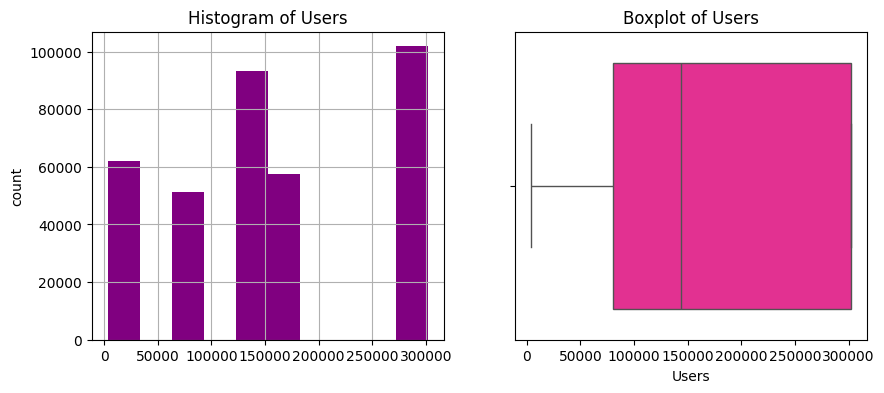

Holiday_Indicator
Skew : 2.49


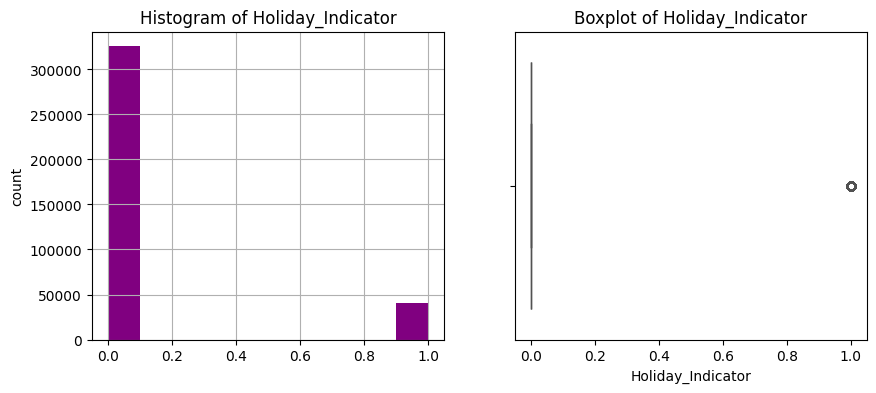

Profit
Skew : 1.9


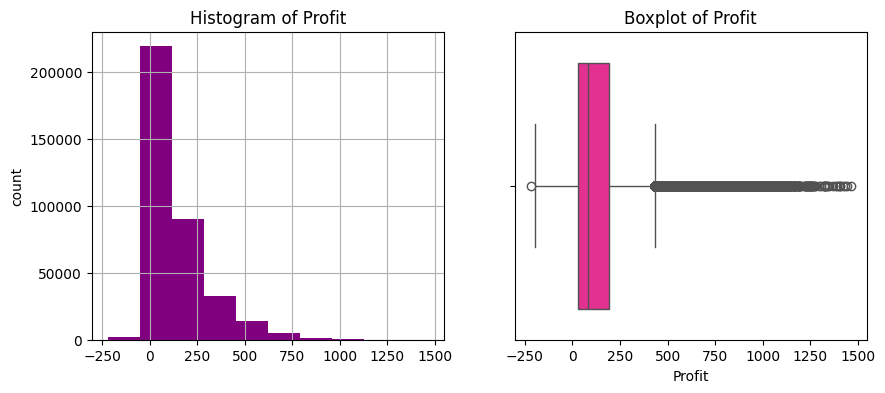

Profit_Percentage
Skew : -0.1


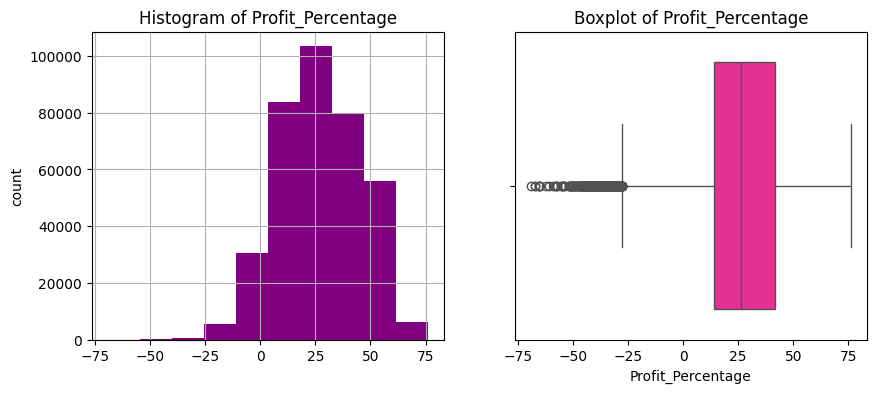

In [67]:
for col in numerical_variables:
  if col!='Travel_Date':
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True,color='purple')
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col],color='deeppink')
    plt.title('Boxplot of ' + col)
    plt.show()

**Cost of the trip**

 From Univariate analysis, there are outliers in Price_Charged.

 Below Box plot indicates that`Pink Cab` and  `Yellow Cab` have many outliers in Prices charged whereas there are no outliers in Cost of the Trip. This implies that both the company has profited or charged more based on model of the car, city, or season. So we cannot remove these values from the dataset.

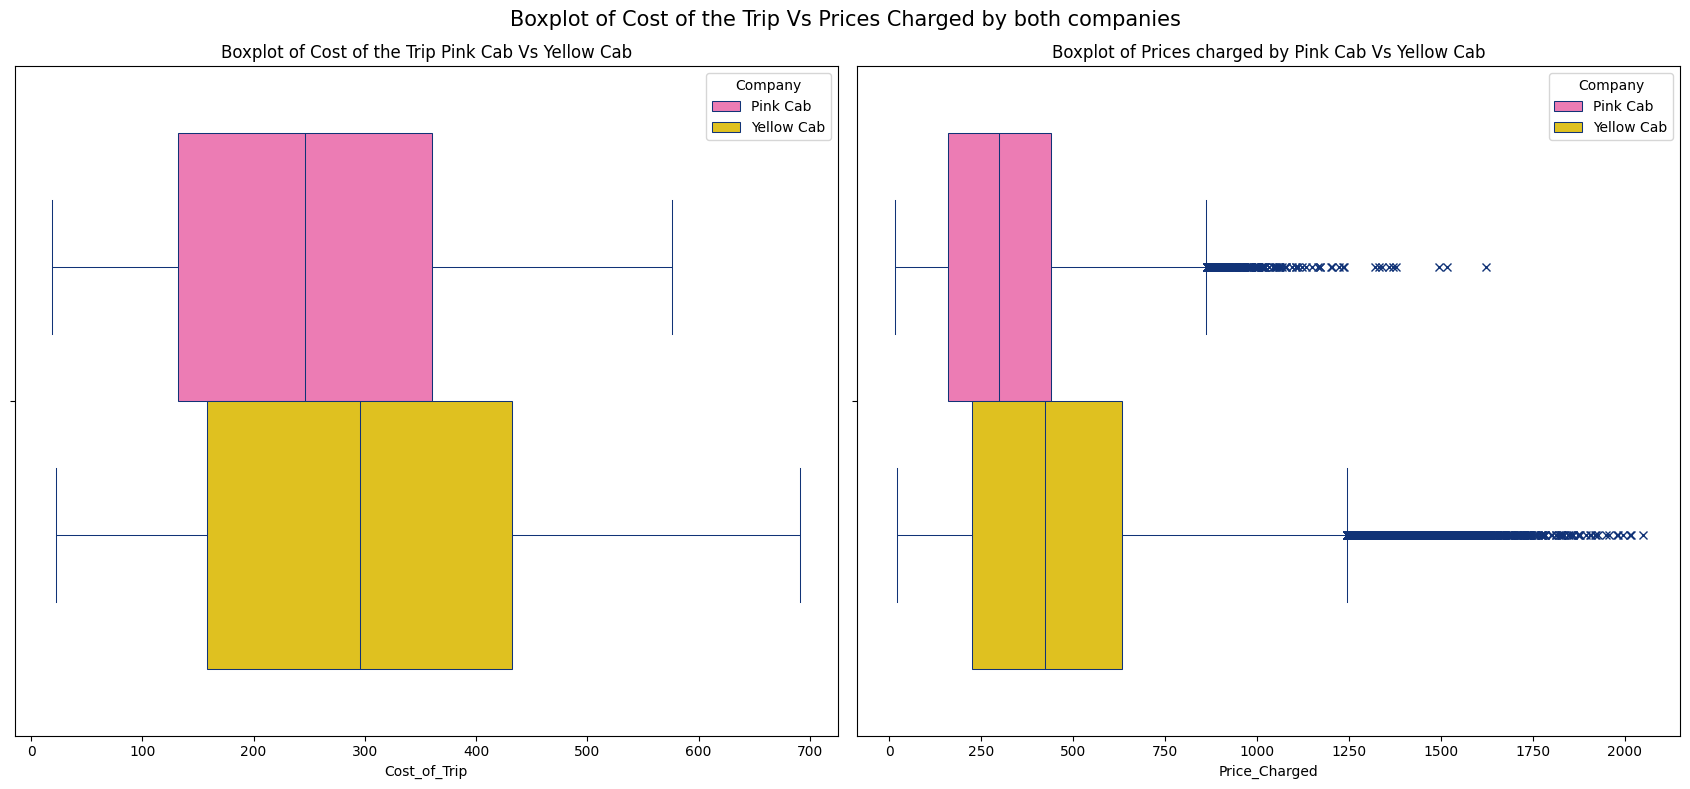

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
palletes=['hotpink','gold']
fig.suptitle('Boxplot of Cost of the Trip Vs Prices Charged by both companies', fontsize=15)
sns.boxplot(data=data, x="Cost_of_Trip", hue="Company",palette=palletes,ax=axes[0],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[0].set_title('Boxplot of Cost of the Trip Pink Cab Vs Yellow Cab')
sns.boxplot(data=data, x="Price_Charged", hue="Company",palette=palletes,ax=axes[1],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[1].set_title('Boxplot of Prices charged by Pink Cab Vs Yellow Cab')
plt.tight_layout()
plt.show()

**2. Categorial  variables**

In [69]:
print(categorial_variables)

['Company', 'City', 'Day_of_week_name', 'Payment_Mode', 'Gender', 'Holiday']


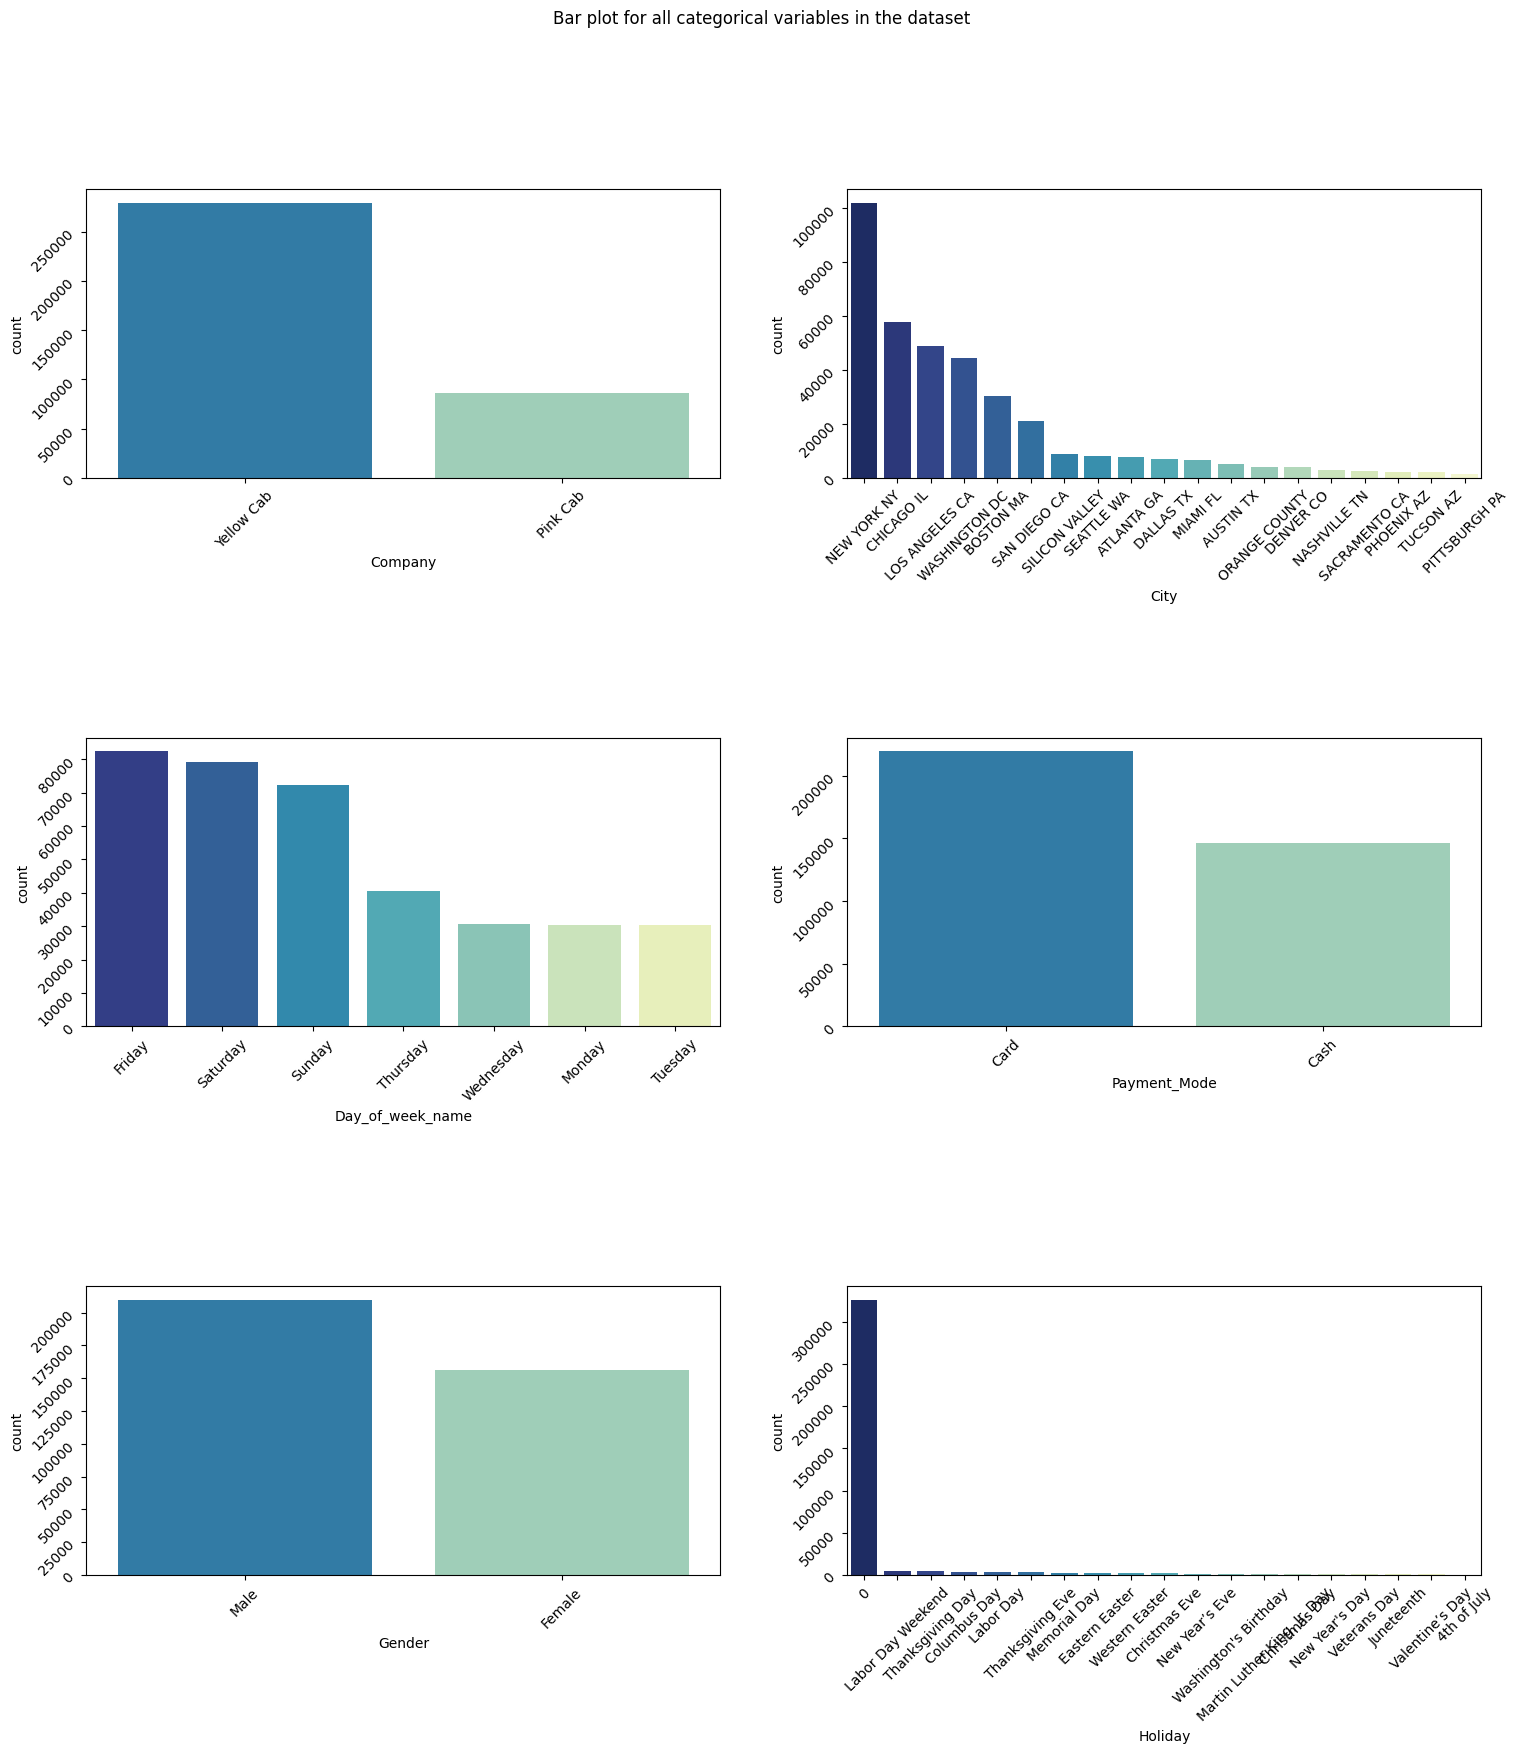

In [70]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset')
p_color=['gold','hotpink']
g_color=['dodgerblue','deeppink']
pay_color=['greenyellow','yellowgreen']
sns.countplot(ax = axes[0, 0], x = 'Company', data = data, palette = 'YlGnBu_r',
              order = data['Company'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'City', data = data,  palette='YlGnBu_r',
              order = data['City'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Day_of_week_name', data = data, palette = 'YlGnBu_r',
              order = data['Day_of_week_name'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Payment_Mode', data = data, palette = 'YlGnBu_r',
              order = data['Payment_Mode'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Gender', data = data, palette = 'YlGnBu_r',
              order = data['Gender'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Holiday', data = data, palette = 'YlGnBu_r',
              order = data['Holiday'].value_counts().index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=45)
plt.show()


# **Correlation Analysis**

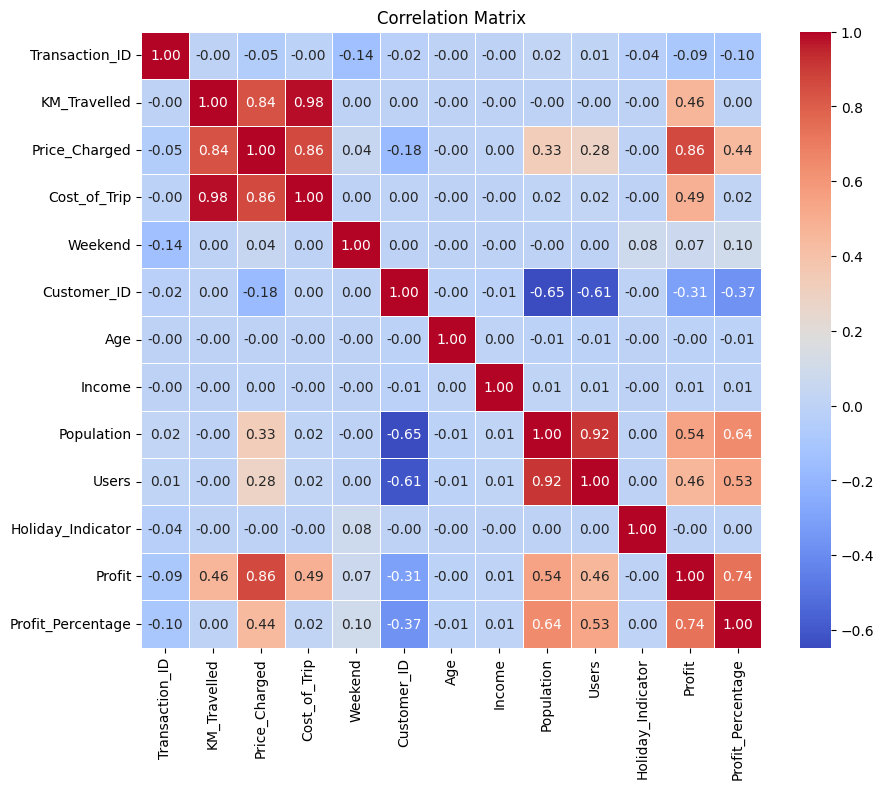

In [71]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
#print("Correlation Matrix:")
#print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [72]:
PinkCab_df = data[data['Company']=='Pink Cab']
YellowCab_df = data[data['Company']=='Yellow Cab']
PinkCab_df.head(2)

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   

   Cost_of_Trip Travel_Date  Year  Month  Day  ...  Payment_Mode Gender  Age  \
0        313.64  2016-01-08  2016      1    8  ...          Card   Male   28   
1        334.85  2016-01-06  2016      1    6  ...          Card   Male   27   

   Income Population  Users  Holiday  Holiday_Indicator  Profit  \
0   10813     814885  24701        0                  0   57.32   
1    9237     814885  24701        0                  0   23.67   

   Profit_Percentage  
0              15.45  
1               6.60  

[2 rows x 24 columns]

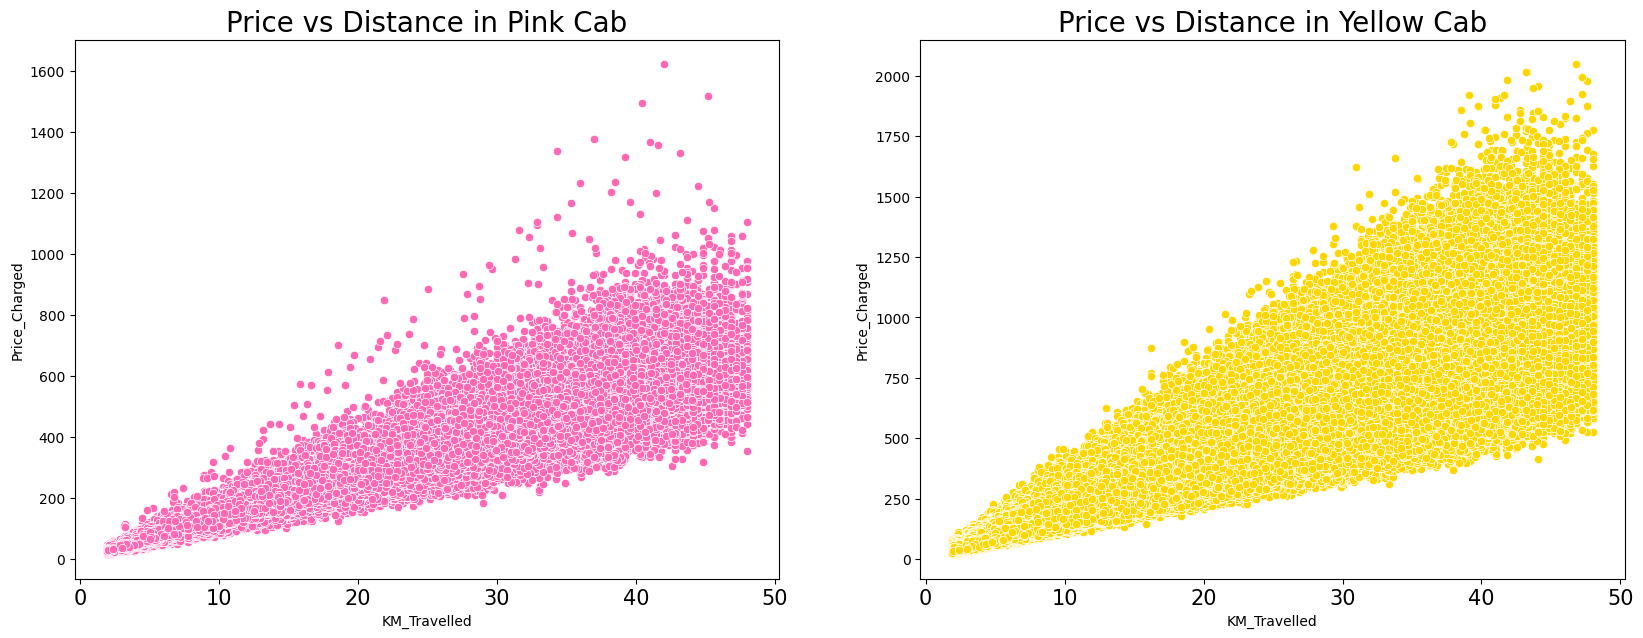

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

sns.scatterplot(data=PinkCab_df, x='KM_Travelled', y='Price_Charged',color='hotpink', ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

sns.scatterplot(data=YellowCab_df, x='KM_Travelled', y='Price_Charged',color='gold', ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

plt.show()

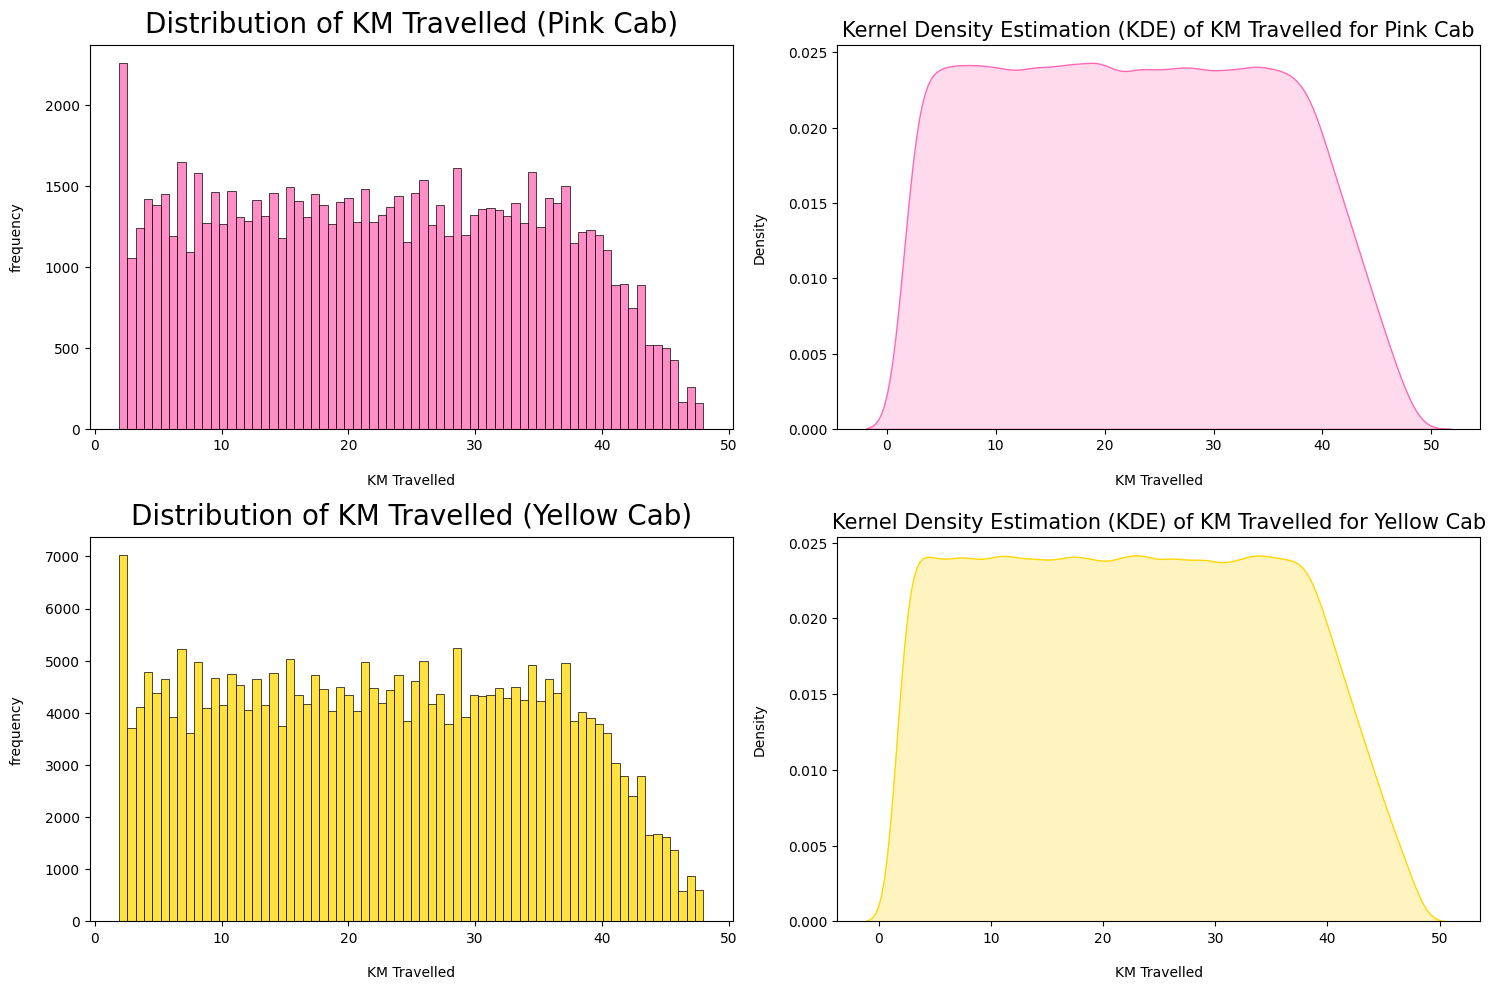

In [74]:
# Distribution and KDE plot for distribution of 'KM Travelled' for Pink Cab
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['KM_Travelled'], kde=False, color='hotpink', bins=70, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
axes[0, 0].set_xlabel("KM Travelled", labelpad=15)
axes[0, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Pink Cab
sns.kdeplot(PinkCab_df['KM_Travelled'], shade=True, color='hotpink', ax=axes[0, 1])
axes[0, 1].set_xlabel('KM Travelled', labelpad=15)
axes[0, 1].set_ylabel('Density', labelpad=15)
axes[0, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Pink Cab', fontsize=15)

# Distribution and KDE plot for distribution of 'KM Travelled' for Yellow Cab
sns.histplot(YellowCab_df['KM_Travelled'], kde=False, color='gold', bins=70, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
axes[1, 0].set_xlabel("KM Travelled", labelpad=15)
axes[1, 0].set_ylabel("frequency", labelpad=15)

# KDE plot for Yellow Cab
sns.kdeplot(YellowCab_df['KM_Travelled'], shade=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_xlabel('KM Travelled', labelpad=15)
axes[1, 1].set_ylabel('Density', labelpad=15)
axes[1, 1].set_title('Kernel Density Estimation (KDE) of KM Travelled for Yellow Cab', fontsize=15)

plt.tight_layout()
plt.show()

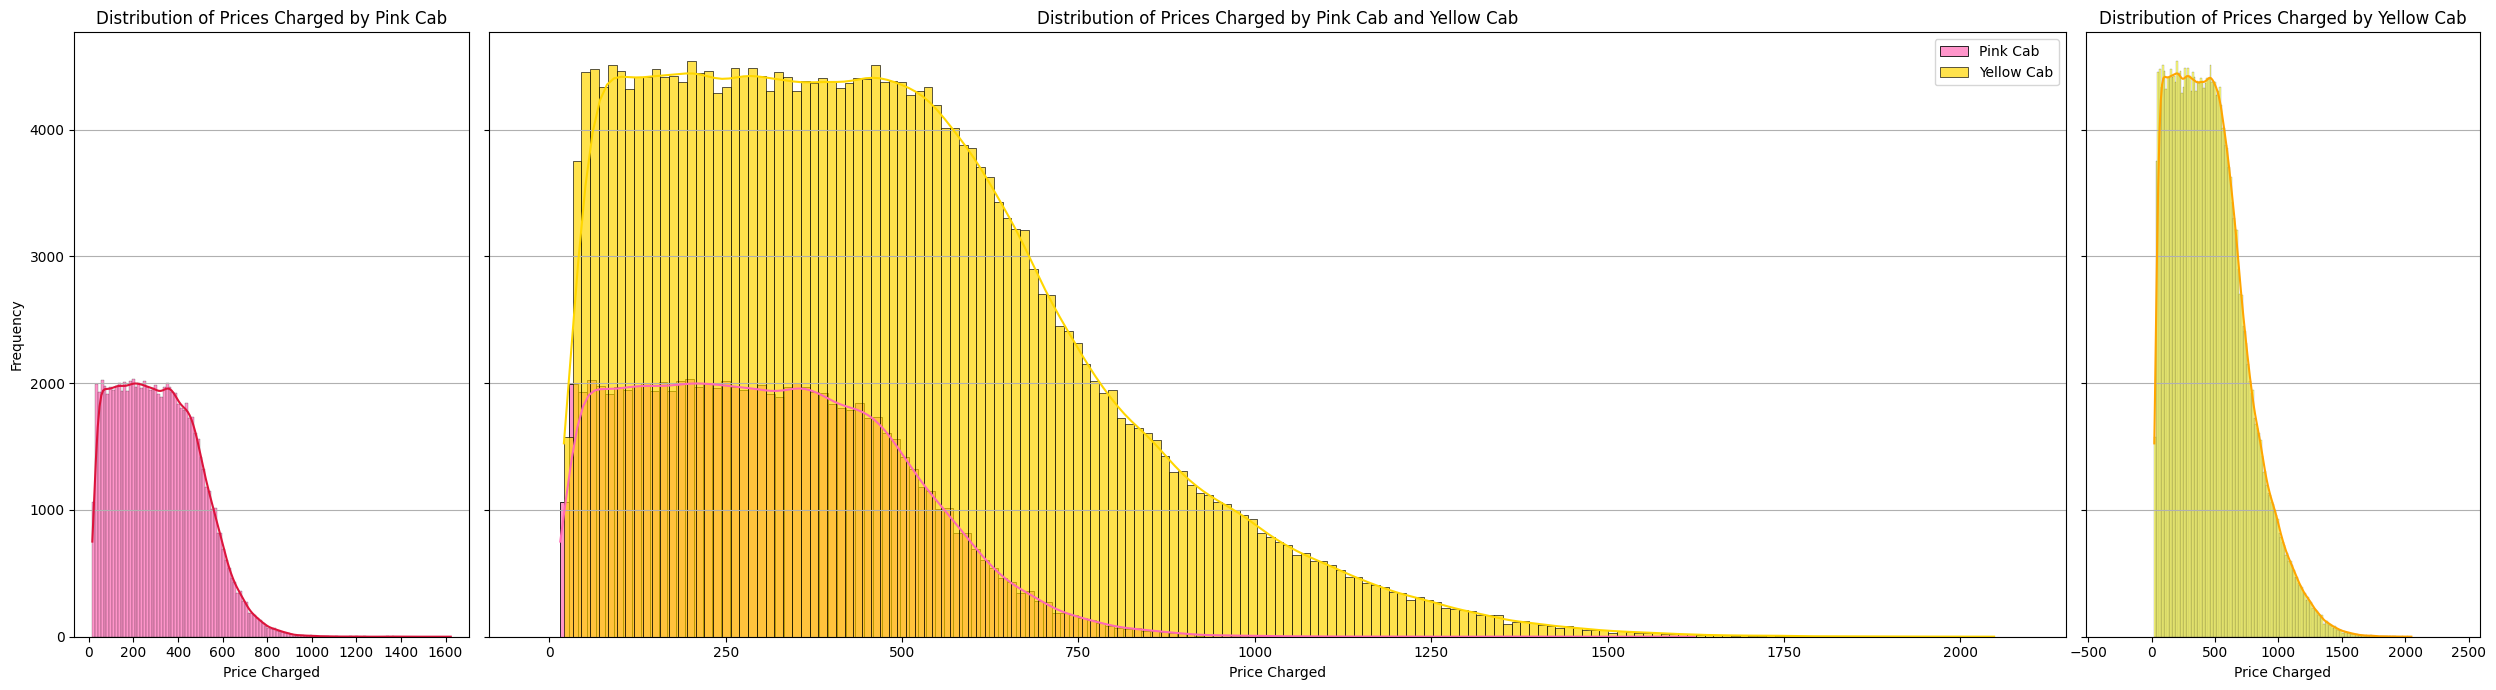

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7), sharey=True, gridspec_kw={'width_ratios': [1, 4, 1]})

# Distribution plot for Pink Cab
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[0],alpha=0.7)
axes[0].lines[0].set_color('crimson')
axes[0].set_xlabel('Price Charged')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y')
axes[0].set_title('Distribution of Prices Charged by Pink Cab')

# Common center plot
sns.histplot(PinkCab_df['Price_Charged'], kde=True, color='hotpink', label='Pink Cab', ax=axes[1], alpha=0.7)
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='gold', label='Yellow Cab', ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Price Charged')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prices Charged by Pink Cab and Yellow Cab')
axes[1].grid(axis='y')
axes[1].legend()

# Distribution plot for Yellow Cab
sns.histplot(YellowCab_df['Price_Charged'], kde=True, color='yellow', label='Yellow Cab', ax=axes[2])#
axes[2].lines[0].set_color('orange')
axes[2].set_xlabel('Price Charged')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Prices Charged by Yellow Cab')
plt.grid(axis='y')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [76]:
min_price = np.min(PinkCab_df['Price_Charged'])
max_price = np.max(PinkCab_df['Price_Charged'])
mode_price = PinkCab_df['Price_Charged'].mode()[0]  # Mode may return multiple values, so we select the first one

# Print the results
print("Minimum price charged by Pink Cab:", min_price)
print("Maximum price charged by Pink Cab:", max_price)
print("Most common price charged by Pink Cab:", mode_price)

min_price_y = np.min(YellowCab_df['Price_Charged'])
max_price_y = np.max(YellowCab_df['Price_Charged'])
mode_price_y = YellowCab_df['Price_Charged'].mode()[0]  # Mode may return multiple values, so we select the first one

# Print the results
print("Minimum price charged by Yellow Cab:", min_price_y)
print("Maximum price charged by Yellow Cab:", max_price_y)
print("Most common price charged by Yellow Cab:", mode_price_y)


Minimum price charged by Pink Cab: 15.6
Maximum price charged by Pink Cab: 1623.48
Most common price charged by Pink Cab: 204.21
Minimum price charged by Yellow Cab: 20.73
Maximum price charged by Yellow Cab: 2048.03
Most common price charged by Yellow Cab: 191.27


In [77]:
# Assuming PinkCab_df is your DataFrame containing data for Pink Cab rides

# Sort the DataFrame by 'Price_Charged' in ascending order
sorted_df = PinkCab_df.sort_values(by='Price_Charged')

# Get the row with the minimum price
min_price_row = sorted_df.iloc[0]

# Extract the minimum price and its corresponding KM_Travelled value
min_price = min_price_row['Price_Charged']
km_travelled_for_min_price = min_price_row['KM_Travelled']

# Print the results
print("Minimum price charged by Pink Cab:", min_price)
print("Corresponding KM_Travelled for the minimum price:", km_travelled_for_min_price)


Minimum price charged by Pink Cab: 15.6
Corresponding KM_Travelled for the minimum price: 1.98


In [78]:
sorted_df.tail()

Transaction_ID   Company      City  KM_Travelled  Price_Charged  \
67768         10078751  Pink Cab  MIAMI FL         41.04        1368.66   
199544        10225859  Pink Cab  MIAMI FL         36.96        1377.73   
199554        10225869  Pink Cab  MIAMI FL         40.40        1495.60   
199564        10225879  Pink Cab  MIAMI FL         45.20        1517.15   
67777         10078760  Pink Cab  MIAMI FL         42.00        1623.48   

        Cost_of_Trip Travel_Date  Year  Month  Day  ...  Payment_Mode  Gender  \
67768         467.86  2016-09-26  2016      9   26  ...          Card    Male   
199544        406.56  2017-09-17  2017      9   17  ...          Card    Male   
199554        456.52  2017-09-22  2017      9   22  ...          Cash    Male   
199564        461.04  2017-09-22  2017      9   22  ...          Cash    Male   
67777         504.00  2016-09-18  2016      9   18  ...          Card  Female   

        Age  Income Population  Users  Holiday  Holiday_Indicator   Profit  \
67768    33    4771    1339155  17675        0                  0   900.80   
199544   40    8032    1339155  17675        0                  0   971.17   
199554   20   22765    1339155  17675        0                  0  1039.08   
199564   62   29899    1339155  17675        0                  0  1056.11   
67777    25   24627    1339155  17675        0                  0  1119.48   

        Profit_Percentage  
67768               65.82  
199544              70.49  
199554              69.48  
199564              69.61  
67777               68.96  

[5 rows x 24 columns]

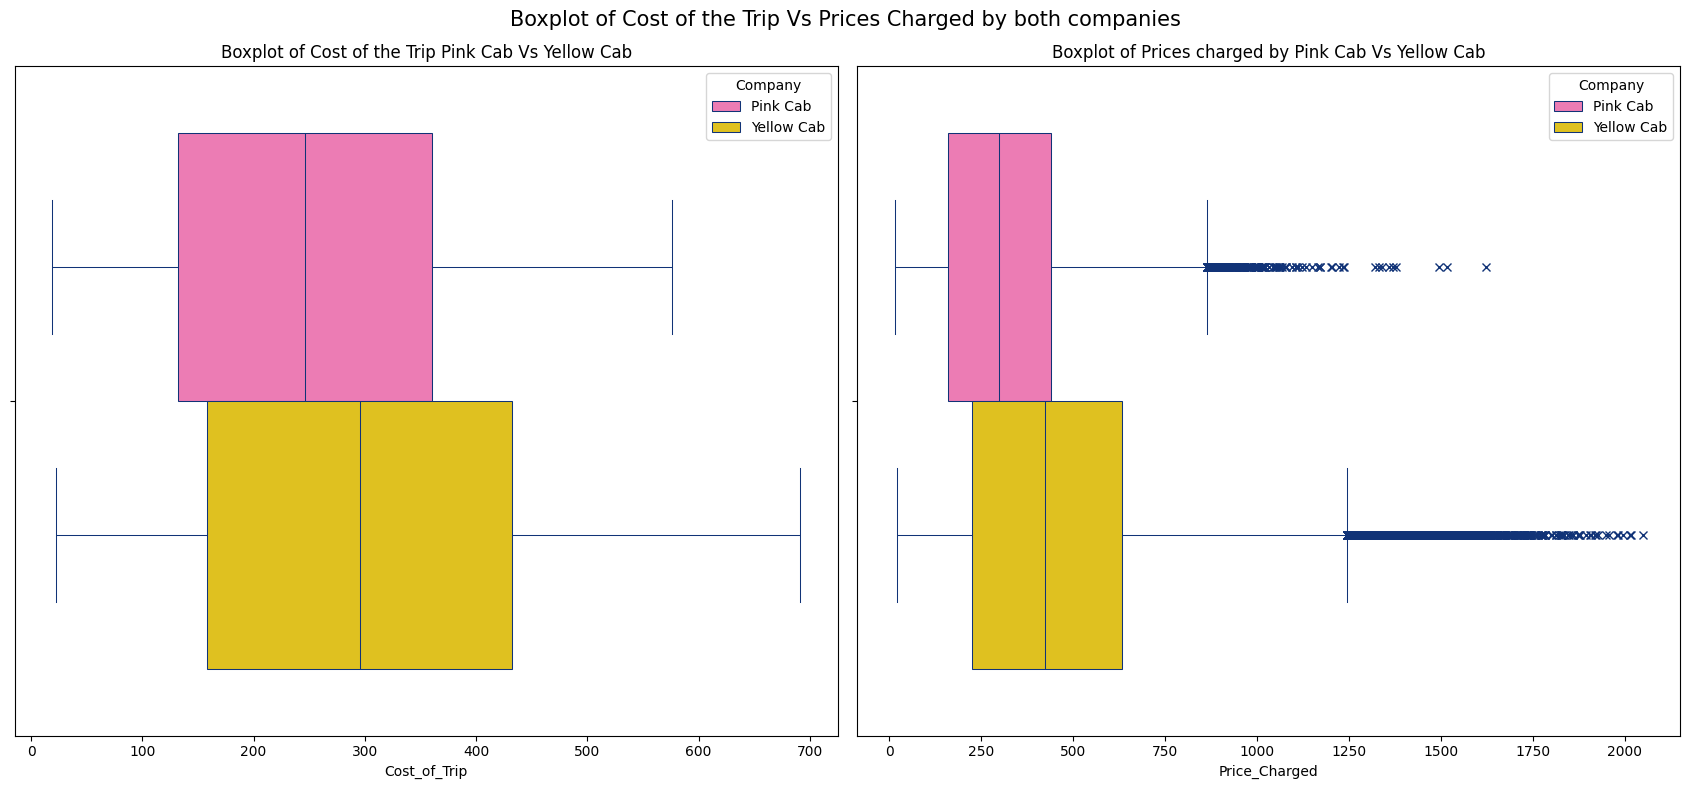

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
palletes=['hotpink','gold']
fig.suptitle('Boxplot of Cost of the Trip Vs Prices Charged by both companies', fontsize=15)
sns.boxplot(data=df_cab, x="Cost_of_Trip", hue="Company",palette=palletes,ax=axes[0],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[0].set_title('Boxplot of Cost of the Trip Pink Cab Vs Yellow Cab')
sns.boxplot(data=df_cab, x="Price_Charged", hue="Company",palette=palletes,ax=axes[1],linecolor="#137", linewidth=.75,flierprops={"marker": "x"})
axes[1].set_title('Boxplot of Prices charged by Pink Cab Vs Yellow Cab')
plt.tight_layout()
plt.show()

# **Overall sales Analysis**

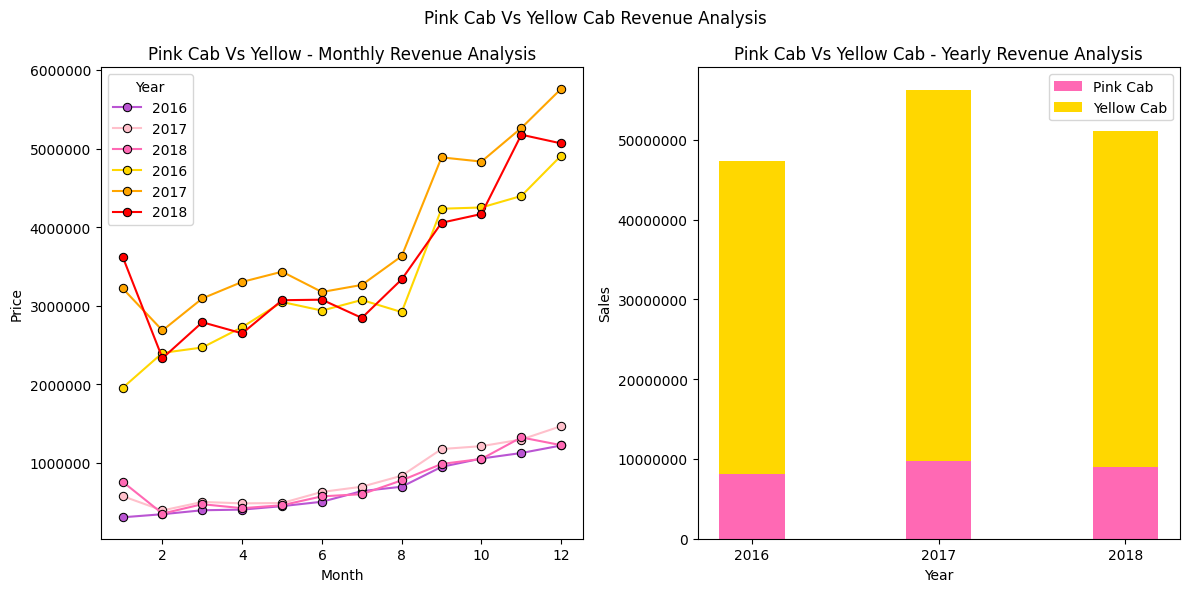

In [80]:
Pink_Cab_sales_by_year_month = PinkCab_df.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()
Yellow_Cab_sales_by_year_month = YellowCab_df.groupby(['Year', 'Month'])['Price_Charged'].sum().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Pink Cab Vs Yellow Cab Revenue Analysis')

pink_palettes = ['mediumorchid', 'pink', 'hotpink']
yellow_palettes = ['gold', 'orange', 'red']

# Pink Cab Line Plot
sns.lineplot(data=Pink_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=pink_palettes, ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Price')
axes[0].set_title('Pink Cab Vs Yellow - Monthly Revenue Analysis')
axes[0].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[0].legend(title='Year')

# Yellow Cab Line Plot
sns.lineplot(data=Yellow_Cab_sales_by_year_month, x='Month', y='Price_Charged', hue='Year', marker='o', markeredgecolor='black', palette=yellow_palettes, ax=axes[0])
axes[0].legend(title='Year')

# Stacked Bar Plot
years = sorted(Pink_Cab_sales_by_year_month['Year'].unique())

# Extracting Pink Cab and Yellow Cab sales for each year
pink_sales = []
yellow_sales = []
for year in years:
    pink_sales.append(Pink_Cab_sales_by_year_month[Pink_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())
    yellow_sales.append(Yellow_Cab_sales_by_year_month[Yellow_Cab_sales_by_year_month['Year'] == year]['Price_Charged'].sum())

index = np.arange(len(years))
bar_width = 0.35

pink_bar = axes[1].bar(index, pink_sales, bar_width, label='Pink Cab', color='hotpink')
yellow_bar = axes[1].bar(index, yellow_sales, bar_width, label='Yellow Cab', color='gold', bottom=pink_sales)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].set_title('Pink Cab Vs Yellow Cab - Yearly Revenue Analysis')
axes[1].set_xticks(index)
axes[1].set_xticklabels(years)
axes[1].ticklabel_format(axis='y', style='plain', useOffset=False)
axes[1].legend()
plt.tight_layout()
plt.show()

# **Weekend Fare Analysis**
 The data analysis shows the significance of weekends as a prime revenue-generating period for both Pink Cab and Yellow Cab, highlighting the importance of strategic planning and operational excellence to optimize revenue performance during leisure periods

* **Weekend Revenue Comparison**
  Both Pink Cab and Yellow Cab demonstrate a significant increase in revenue during weekends compared to weekdays.

  **Pink Cab** the average revenue surges from approximately 303.18 during weekdays to about 321.25 during weekends, representing a percentage difference of approximately **5.96%**.

   **Yellow Cab** experiences a notable increase in average revenue during weekends, rising from approximately 447.84 during weekdays to about 472.26 during weekends. This corresponds to a percentage difference of approximately **5.45%**.



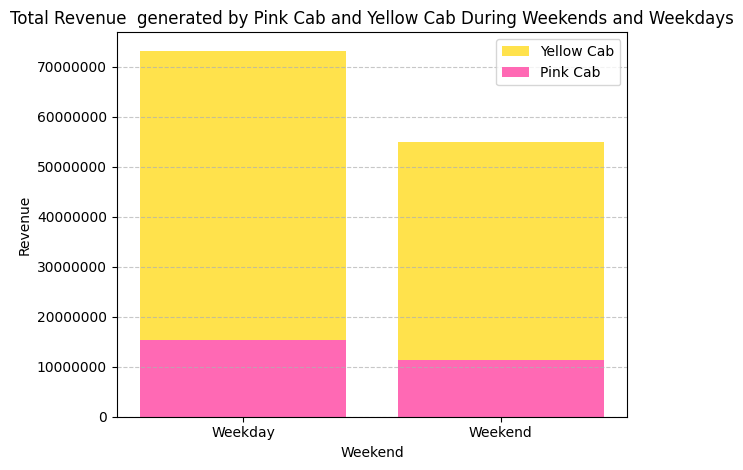

In [81]:
Pink_Cab_weekend = PinkCab_df.groupby('Weekend')['Price_Charged'].sum().reset_index()
Yellow_Cab_weekend = YellowCab_df.groupby('Weekend')['Price_Charged'].sum().reset_index()
#  Yellow Cab data
plt.bar(Yellow_Cab_weekend['Weekend'], Yellow_Cab_weekend['Price_Charged'], color='gold', label='Yellow Cab', alpha=0.7)
#  Pink Cab data
plt.bar(Pink_Cab_weekend['Weekend'], Pink_Cab_weekend['Price_Charged'], color='hotpink', label='Pink Cab')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.title('Total Revenue  generated by Pink Cab and Yellow Cab During Weekends and Weekdays')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

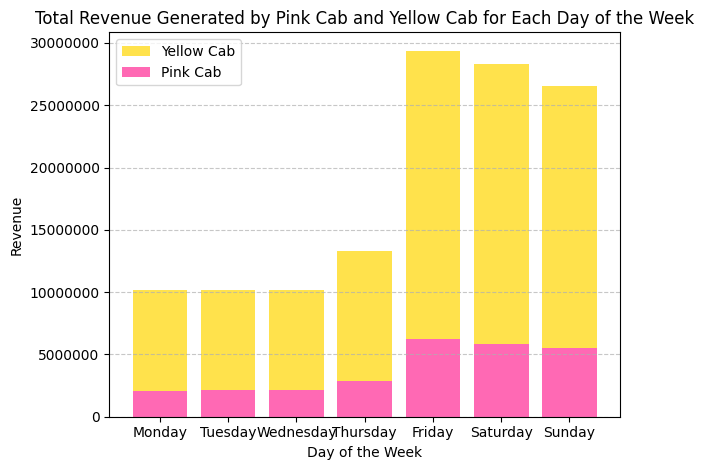

In [82]:
Pink_Cab_daily = PinkCab_df.groupby('Day_of_week')['Price_Charged'].sum().reset_index()
Yellow_Cab_daily = YellowCab_df.groupby('Day_of_week')['Price_Charged'].sum().reset_index()

# in order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Yellow Cab data
plt.bar(Yellow_Cab_daily['Day_of_week'], Yellow_Cab_daily['Price_Charged'], color='gold', label='Yellow Cab', alpha=0.7)

# Plot Pink Cab data
plt.bar(Pink_Cab_daily['Day_of_week'], Pink_Cab_daily['Price_Charged'], color='hotpink', label='Pink Cab')

# Set x-axis ticks and labels
plt.xticks(range(len(days_of_week)), days_of_week)

plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated by Pink Cab and Yellow Cab for Each Day of the Week')
plt.ticklabel_format(axis='y', style='plain', useOffset=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

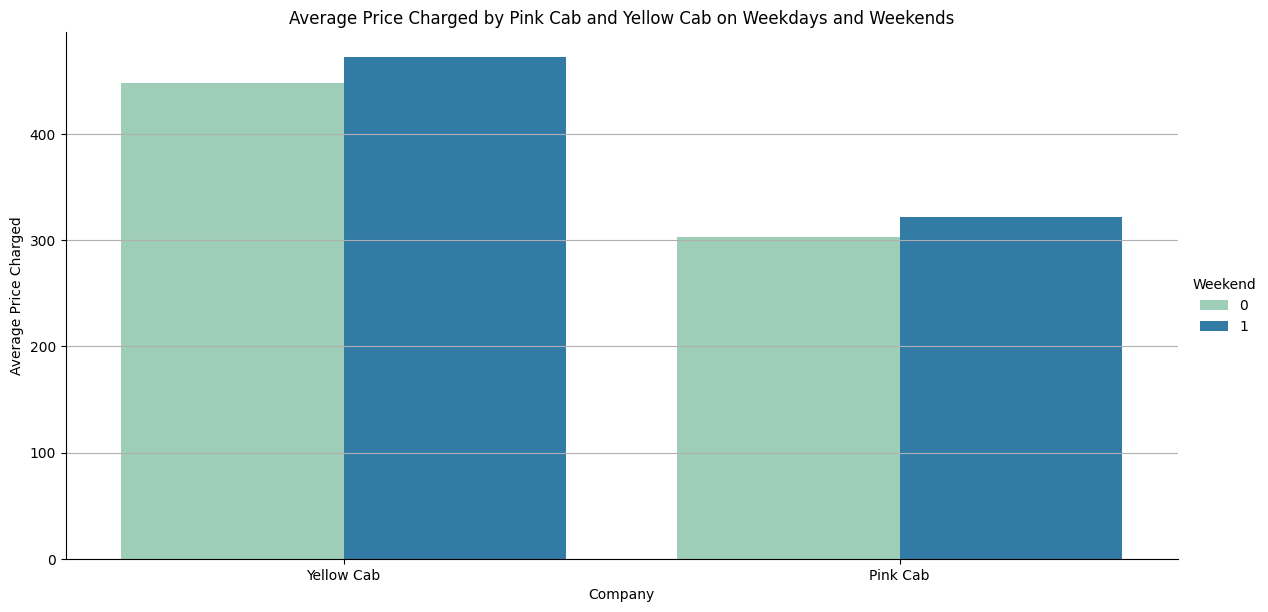

In [83]:
weekend_df = data.groupby(['Company', 'Weekend'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()

#bar plot for comparison on weekdays and weekends
catplot = sns.catplot(x='Company', y='Price_Charged', hue='Weekend', data=weekend_df, kind='bar', height=6, aspect=2, palette='YlGnBu')

plt.ylabel('Average Price Charged')
plt.title('Average Price Charged by Pink Cab and Yellow Cab on Weekdays and Weekends')
plt.grid(axis='y')
plt.show()

In [84]:
price_comparison = data.groupby(['Company', 'Weekend'])['Price_Charged'].mean().reset_index()

comparison_table = price_comparison.pivot_table(index='Company', columns='Weekend', values='Price_Charged').reset_index()

comparison_table['Percentage_Difference'] = ((comparison_table[1] - comparison_table[0]) / comparison_table[0]) * 100
print(comparison_table)

Weekend     Company           0           1  Percentage_Difference
0          Pink Cab  303.176771  321.254441               5.962749
1        Yellow Cab  447.839339  472.255505               5.451992


# **Holiday Analysis**

It's important to note the divergence between the **distance traveled** and the **revenue generated** by **Pink Cab** during holiday periods compared to non-holiday periods.

Despite covering **fewer kilometers** during holidays, Pink Cab experiences a notable **increase in revenue**, while Yellow Cab demonstrates a **marginal decrease in revenue** during the same periods.

This discrepancy suggests that Pink Cab may have implemented strategies to optimize its revenue generation during holidays, such as implementing surge pricing, offering special promotions, or focusing on high-demand routes. These initiatives could have effectively offset the reduction in distance traveled, resulting in a net increase in revenue.

*  **Impact of US Holidays on Revenue**

  **Pink Cab** experiences a notable **increase** in revenue during holiday periods compared to non-holiday periods. Specifically, during holidays, Pink Cab's average revenue rises and this corresponds to a percentage difference of approximately ** 0.98%**, signifying a slight improvement in revenue during holidays.

  **Yellow Cab's** revenue demonstrates a marginal **decrease** during holiday periods in comparison to non-holiday periods.This translates to a percentage difference of approximately -0.19%, indicating a slight decline in revenue for Yellow Cab during holidays.

  These findings suggest that **Pink Cab** experiences a ***positive revenue impact during holiday periods***, while **Yellow Cab** sees a **minor reduction in revenue** during the same periods.

In [85]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()
# Pivot the table to have Holiday and not a holiday
comparison_table_h = price_comparison_holiday.pivot_table(index='Company', columns='Holiday_Indicator', values='Price_Charged').reset_index()
# Calculate the percentage difference
comparison_table_h['Percentage_Difference'] = ((comparison_table_h[1] - comparison_table_h[0]) / comparison_table_h[0]) * 100
print(comparison_table_h)

Holiday_Indicator     Company           0           1  Percentage_Difference
0                    Pink Cab  310.260226  313.294387               0.977941
1                  Yellow Cab  458.075723  457.218399              -0.187158


In [86]:
# # Define the year and city you want to filter
# year_to_filter = 2018  # Example: filter for the year 2018
# city_to_filter = 'New York'  # Example: filter for New York

# # Filter the dataset for the specific year and city
# filtered_data = data[(data['Year'] == year_to_filter) & (data['City'] == city_to_filter)]

# # Group by Company and Holiday_Indicator, and calculate the mean price charged
# price_comparison_holiday = filtered_data.groupby(['Company', 'Holiday_Indicator'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()

# # Pivot the table to have Holiday (1) and Non-Holiday (0) as columns
# comparison_table_h = price_comparison_holiday.pivot_table(index='Company', columns='Holiday_Indicator', values='Price_Charged').reset_index()

# # Calculate the percentage difference between Holiday and Non-Holiday fares
# comparison_table_h['Percentage_Difference'] = ((comparison_table_h[1] - comparison_table_h[0]) / comparison_table_h[0]) * 100

# # Print the resulting table
# print(comparison_table_h)


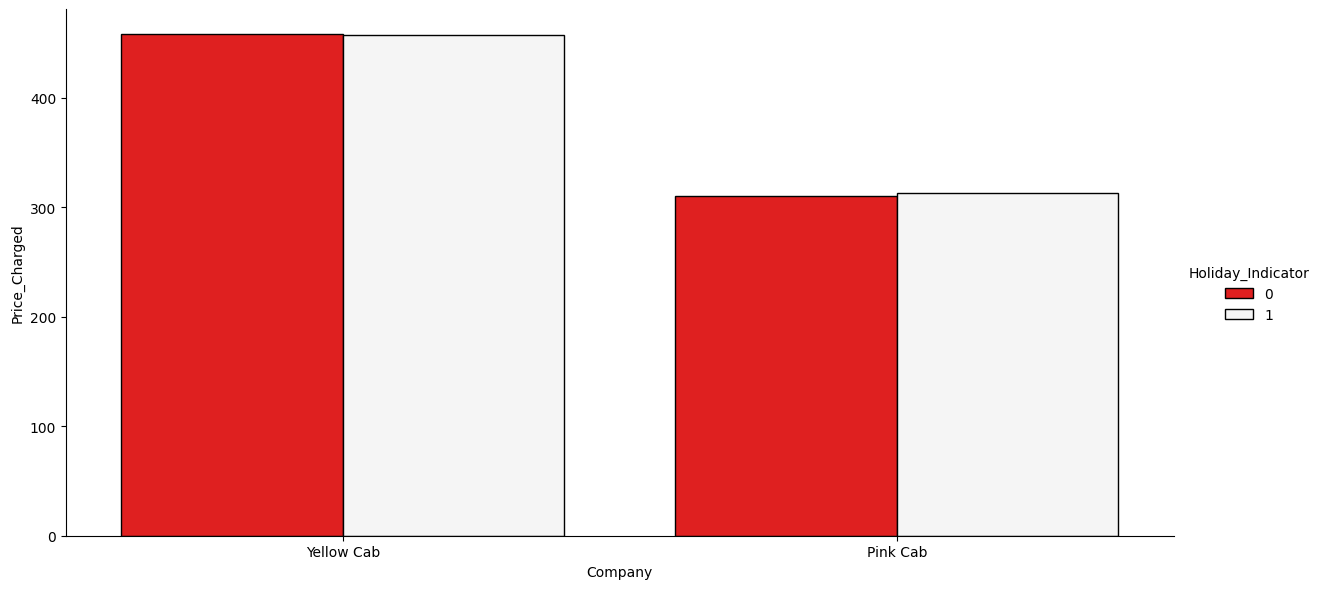

In [87]:
c=['red','whitesmoke']
catplot = sns.catplot(x='Company', y='Price_Charged', hue='Holiday_Indicator', data=price_comparison_holiday, kind='bar', height=6, aspect=2, palette=c,edgecolor='black')

* **Impact of US Holidays on Distance Traveled**

  For Pink Cab, there is a **slight decrease** in the average **distance traveled** during holiday periods. The average distance decreases from approximately 22.56 kilometers during non-holiday periods to about 22.51 kilometers during holiday periods. This reflects a percentage difference of approximately -0.25%.

  Conversely, **Yellow Cab** shows a slight **increase**in the **average distance** traveled during holiday periods compared to non-holiday periods. The average distance traveled increases from approximately 22.57 kilometers during non-holiday periods to about 22.58 kilometers during holiday periods, resulting in a percentage difference of approximately **0.04%**.



In [88]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['KM_Travelled'].mean().sort_values(ascending=False).reset_index()
# Pivot the table to have Holiday and not a holiday
comparison_table_h = price_comparison_holiday.pivot_table(index='Company', columns='Holiday_Indicator', values='KM_Travelled').reset_index()
# Calculate the percentage difference
comparison_table_h['Percentage_Difference'] = ((comparison_table_h[1] - comparison_table_h[0]) / comparison_table_h[0]) * 100
print(comparison_table_h)

Holiday_Indicator     Company          0          1  Percentage_Difference
0                    Pink Cab  22.561297  22.505816              -0.245912
1                  Yellow Cab  22.566986  22.575793               0.039023


In [89]:
price_comparison_holiday = data.groupby(['Company', 'Holiday_Indicator'])['KM_Travelled'].sum().sort_values(ascending=False).reset_index()

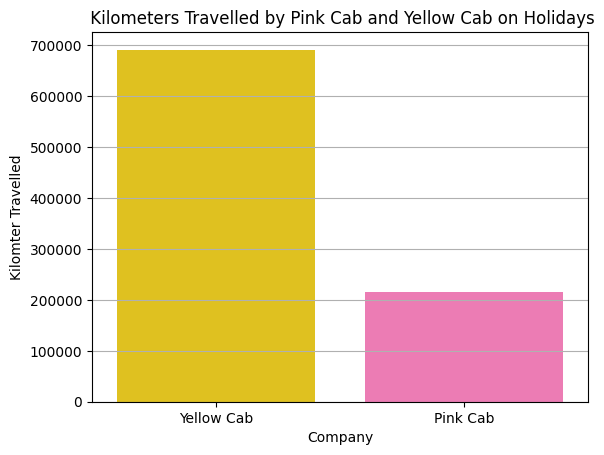

In [90]:
price_comparison_holidays=price_comparison_holiday[price_comparison_holiday['Holiday_Indicator']==1]
colors=['gold','hotpink']
sns.barplot(x='Company', y='KM_Travelled', data=price_comparison_holidays, palette=colors)

plt.ylabel('Kilomter Travelled')
plt.title(' Kilometers Travelled by Pink Cab and Yellow Cab on Holidays')
plt.grid(axis='y')
plt.show()

* **Months with the highest and lowest revenue for Pink Cab and Yellow Cab**

  The analysis reveals that **December** stands out as the **top revenue-generating** month for both **Pink Cab and Yellow Cab**. This observation aligns with broader **seasonal trends**, as December typically witnesses heightened consumer activity and increased travel demand associated with holiday festivities.

  Conversely, **February** emerges as the **low revenue** month for **both cab companies**.
  
  This trend may reflect a **post-holiday downturn** in travel demand and consumer spending, characteristic of the early months of the year

In [91]:
month_revenue = data.groupby(['Company', 'Holiday', 'Month','Day'])['Price_Charged'].sum().reset_index()

pink_cab_monthly_revenue = month_revenue[month_revenue['Company'] == 'Pink Cab']
yellow_cab_monthly_revenue = month_revenue[month_revenue['Company'] == 'Yellow Cab']


pink_cab_top_month = pink_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmax()
yellow_cab_top_month = yellow_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmax()

pink_cab_low_month = pink_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmin()
yellow_cab_low_month = yellow_cab_monthly_revenue.groupby('Month')['Price_Charged'].sum().idxmin()

print("Top revenue month for Pink Cab:", pink_cab_top_month)
print("Top revenue month for Yellow Cab:", yellow_cab_top_month)
print("Low revenue month for Pink Cab:", pink_cab_low_month)
print("Low revenue month for Yellow Cab:", yellow_cab_low_month)

Top revenue month for Pink Cab: 12
Top revenue month for Yellow Cab: 12
Low revenue month for Pink Cab: 2
Low revenue month for Yellow Cab: 2


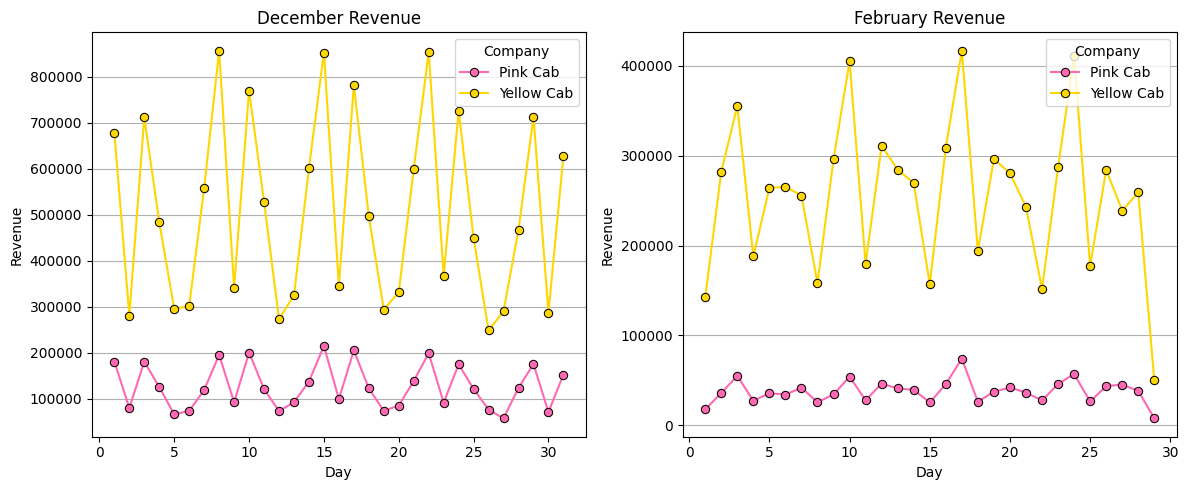

In [92]:
#Fetch Decemeber and Feburary Month
Dec_month_df=month_revenue[month_revenue['Month']==12]
Feb_month_df=month_revenue[month_revenue['Month']==2]

plt.figure(figsize=(12, 5))
colors=['hotpink','gold']
plt.subplot(1, 2, 1)
sns.lineplot(data=Dec_month_df, x='Day', y='Price_Charged', hue='Company', marker='o', markeredgecolor='black', palette=colors)
plt.title('December Revenue')
plt.grid(axis='y')
plt.xlabel('Day')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
sns.lineplot(data=Feb_month_df, x='Day', y='Price_Charged', hue='Company', marker='o', markeredgecolor='black', palette=colors)
plt.title('February Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Revenue Analysis in each City**

Upon examining revenue data, it becomes evident that **``Yellow Cab``** has consistently generated higher revenue overall compared to **``Pink Cab``**.

In specific instances, **Pink Cab** achieved its highest revenue in **New York**
during the year **2016**. However, in subsequent years, namely 2017 and 2018, **Silicon Valley** emerged as the leading revenue-generating city for Pink Cab. Notably, there were ***variations*** in the third-ranking city each year, with *``Miami, Austin, and Orange County``* occupying the position in 2016, 2017, and 2018, respectively.

Conversely, **Yellow Cab** maintained its revenue dominance in New York across all three years. Additionally,** Silicon Valley and Dalla**s consistently secured the second and third positions, respectively, in revenue generation for Yellow Cab throughout the same period.


In [93]:
City_Comparison = data.groupby(['Company', 'City','Year','Month'])['Price_Charged'].mean().sort_values(ascending=False).reset_index()

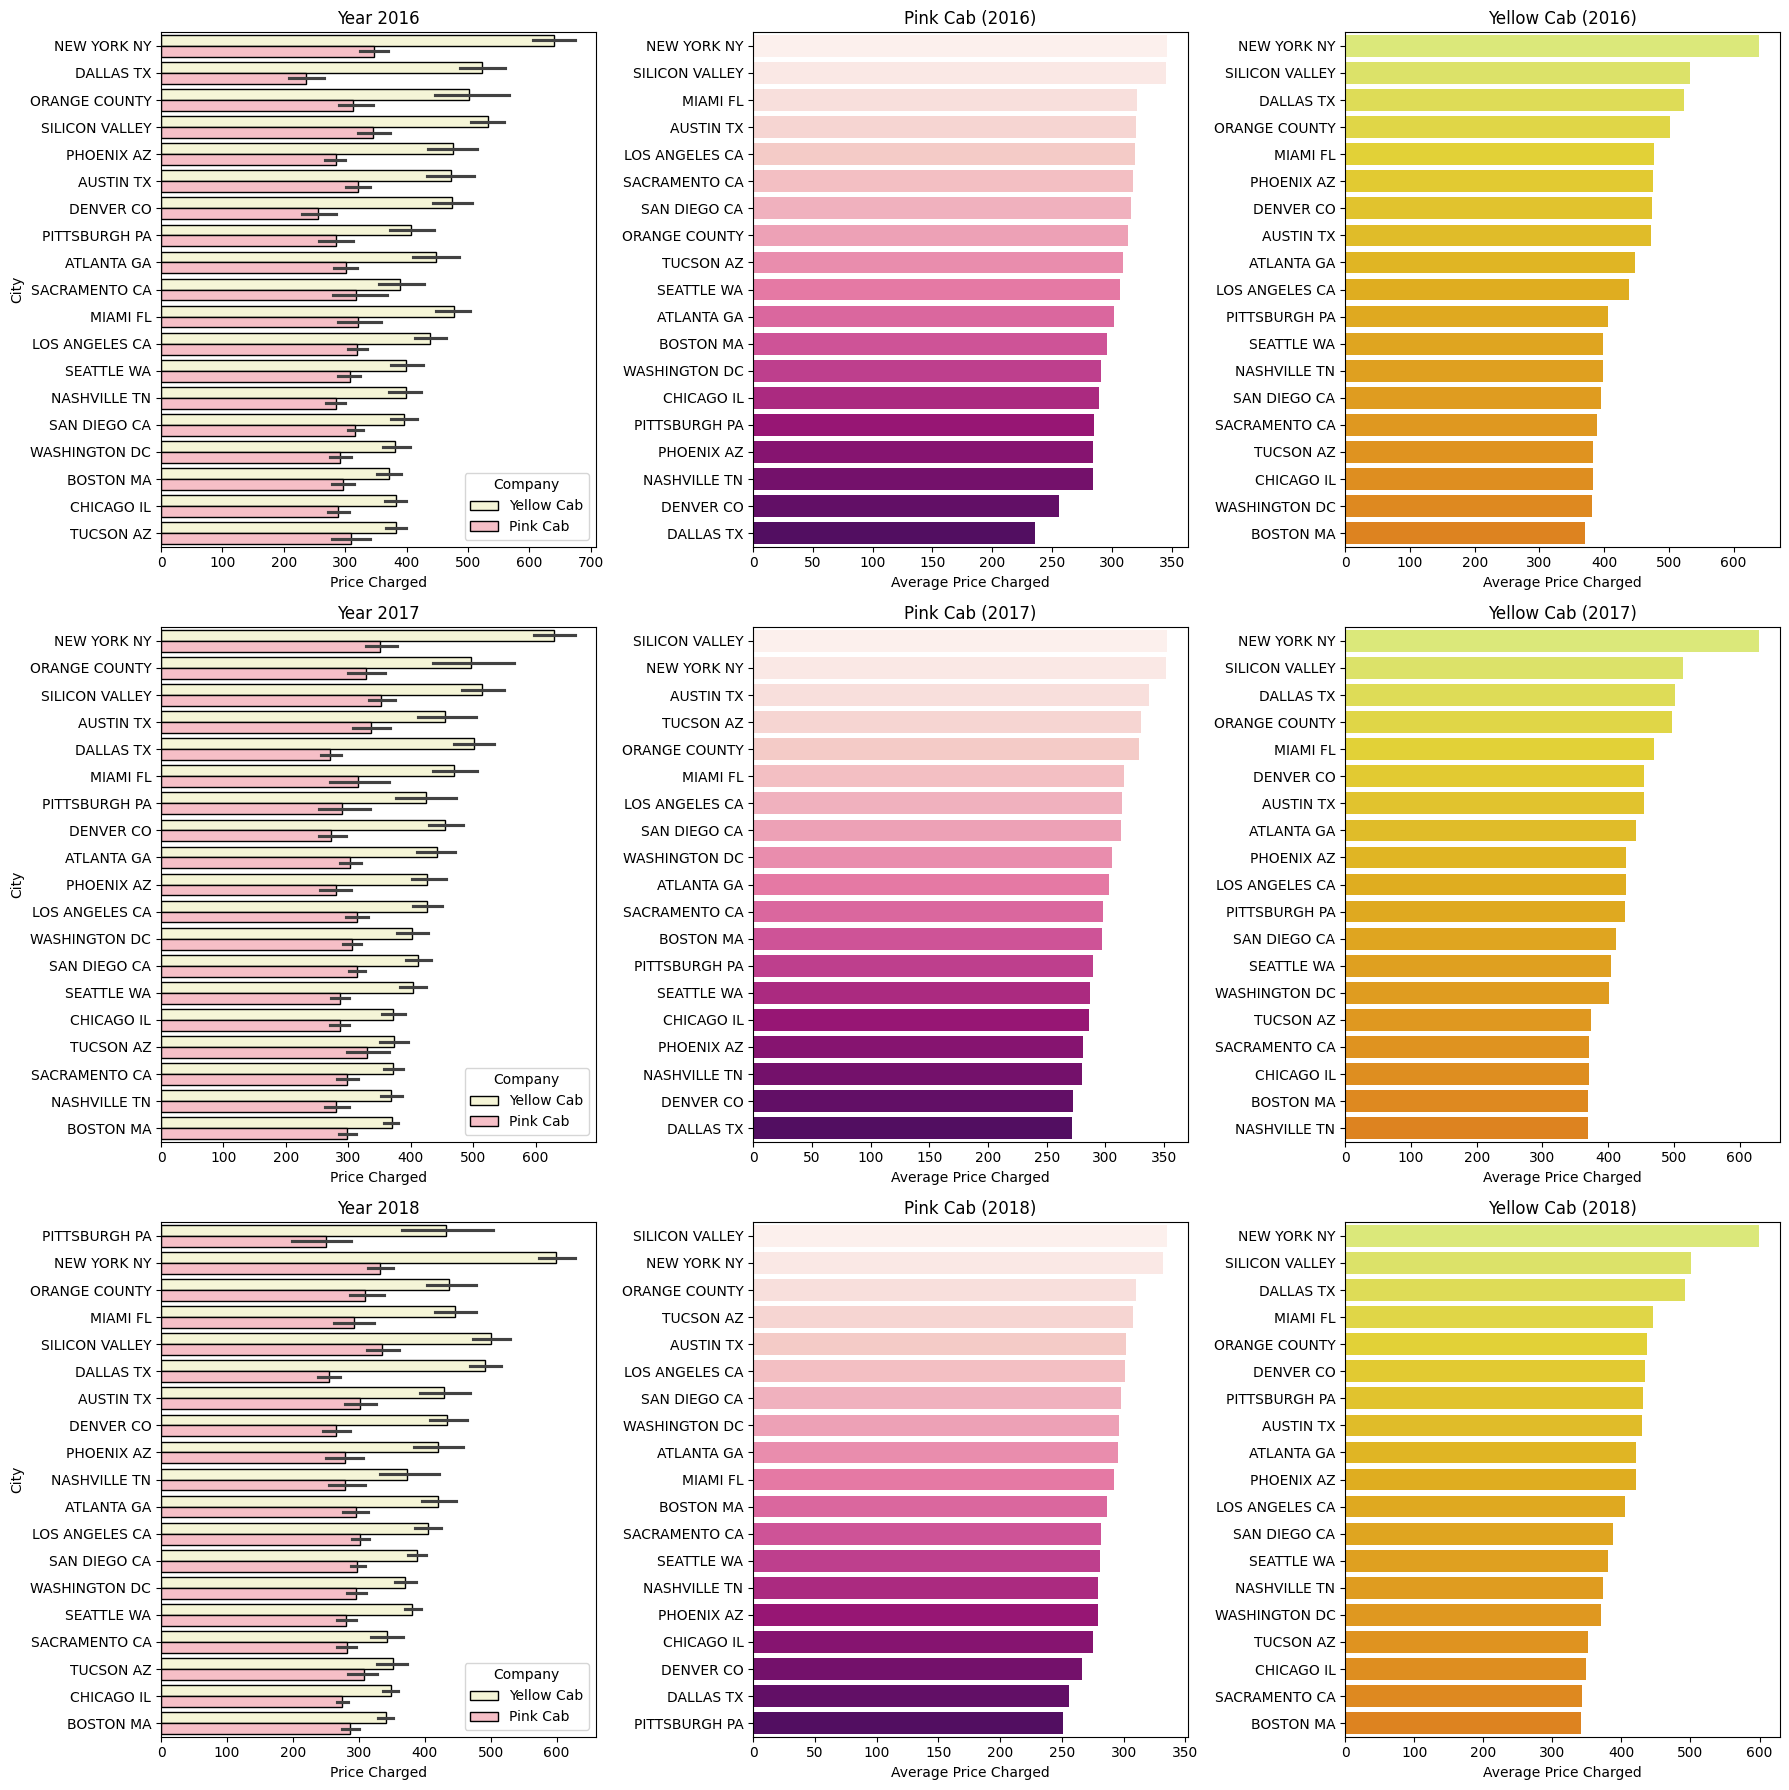

In [94]:
years = sorted(City_Comparison['Year'].unique())
colors = ['#FAFAD2','#FFB6C1']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for i, year in enumerate(years):
    year_data = City_Comparison[City_Comparison['Year'] == year]

    # Plot comparison of Pink Cab and Yellow Cab prices for each year
    sns.barplot(x='Price_Charged', y='City', hue='Company', data=year_data, ax=axes[i, 0], palette=colors,edgecolor='black')
    axes[i, 0].set_xlabel('Price Charged')
    axes[i, 0].set_ylabel('City')
    axes[i, 0].set_title(f'Year {year}')

    # Plot average price charged by Pink Cab in each city (descending order)
    pink_cab_prices = year_data[year_data['Company'] == 'Pink Cab'].groupby('City')['Price_Charged'].mean().sort_values(ascending=False)
    sns.barplot(x=pink_cab_prices.values, y=pink_cab_prices.index, ax=axes[i, 1], palette='RdPu')
    axes[i, 1].set_xlabel('Average Price Charged')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_title(f'Pink Cab ({year})')

    # Plot average price charged by Yellow Cab in each city (descending order)
    yellow_cab_prices = year_data[year_data['Company'] == 'Yellow Cab'].groupby('City')['Price_Charged'].mean().sort_values(ascending=False)
    sns.barplot(x=yellow_cab_prices.values, y=yellow_cab_prices.index, ax=axes[i, 2], palette='Wistia')
    axes[i, 2].set_xlabel('Average Price Charged')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Yellow Cab ({year})')

plt.tight_layout()
plt.show()


* **Max and Min Trip charges**`

  we find that for **Pink Cab**, the minimum cost of a trip charged is ``$19.0``, while the maximum cost reaches ``$576.0``.
  
  On the other hand, for **Yellow Cab** the minimum trip cost is ``$22.8``, with the highest cost peaking at ``$691.2``.

In [95]:
print('Pink Cab')
print('Minimum cost of the trip charged $',PinkCab_df['Cost_of_Trip'].min())
print('Maximum cost of the trip charged $',PinkCab_df['Cost_of_Trip'].max())
print('\nYellow Cab')
print('Minimum cost of the trip charged $',YellowCab_df['Cost_of_Trip'].min())
print('Maximum cost of the trip charged $',YellowCab_df['Cost_of_Trip'].max())

Pink Cab
Minimum cost of the trip charged $ 19.0
Maximum cost of the trip charged $ 576.0

Yellow Cab
Minimum cost of the trip charged $ 22.8
Maximum cost of the trip charged $ 691.2


# **Profit Analysis**

* **Profit margins**

  **Profit margins** between Pink Cab and Yellow Cab over a three year period shows that **Yellow Cab** has **more** Profit than **Pink Cab**

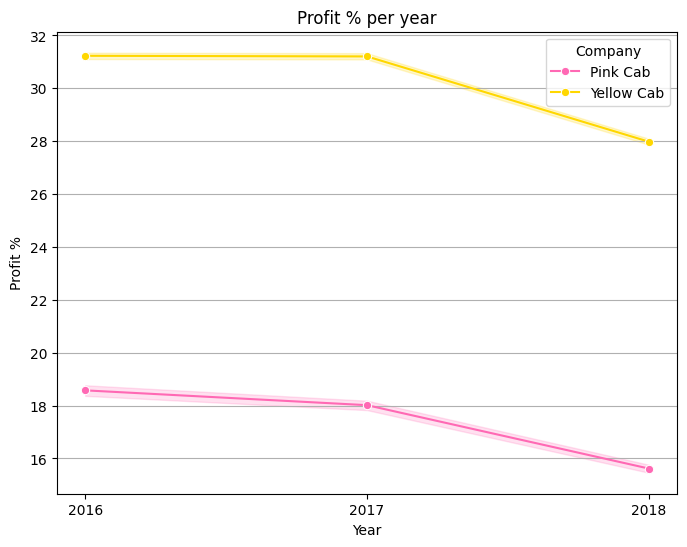

In [96]:
plt.figure(figsize=(8,6))
palettes =['hotpink','gold']
sns.lineplot(x='Year', y='Profit_Percentage', hue="Company", data=data, marker='o',palette=palettes)
plt.xlabel("Year")
plt.ylabel("Profit %")
plt.xticks( [2016, 2017, 2018], ['2016', '2017', '2018'])
plt.title("Profit % per year")
plt.grid(axis='y')

*  **Revenue vs. Profit Margin**

  The analysis of profitability trends over a three-year period reveals significant insights into the financial performance of Pink Cab and Yellow Cab. **Pink Cab** exhibited a consistent growth trajectory in profitability from 2016 to 2017, followed by a slight decline in 2018.
    
  Conversely, **Yellow Cab** demonstrated robust profitability throughout the same period. Despite fluctuations, both companies maintained relatively stable profit margins. These findings underscore Yellow Cab's sustained profitability and market dominance compared to Pink Cab, positioning it as a more promising investment opportunity for potential stakeholders.

    While **Yellow Cab** maintains a significantly **higher average profit** due to its **larger revenue base**, **Pink Cab** exhibits **a more consistent profit** margin around 10.3% to 10.9%. **Pink Cab** operates with a potentially leaner cost but they **extract a larger portion of their revenue** as profit despite a lower overall income.


  

In [97]:
company_profit = data.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

In [98]:
total_profit_yearly = company_profit.groupby('Year')['Profit'].sum()

In [99]:
company_profit['Profit_Percentage'] = company_profit.apply(lambda row: (row['Profit'] / total_profit_yearly[row['Year']]) * 100, axis=1)
print(company_profit)

      Company  Year       Profit  Profit_Percentage
0    Pink Cab  2016   1746800.90          10.930593
1    Pink Cab  2017   2062166.41          10.921193
2    Pink Cab  2018   1583973.15          10.367708
3  Yellow Cab  2016  14234041.54          89.069407
4  Yellow Cab  2017  16820078.50          89.078807
5  Yellow Cab  2018  13693975.43          89.632292


In [100]:
company_profit.to_csv('/content/drive/My Drive/OUTPUT_CSV/Company_Profit.csv', encoding='utf-8', index=False)

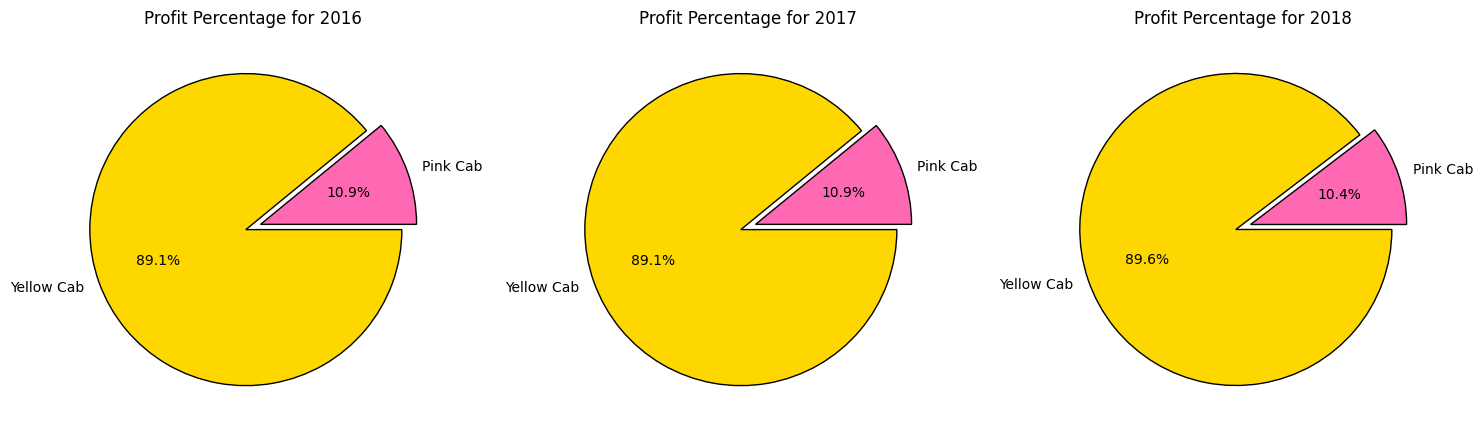

In [101]:
years = np.sort(data['Year'].unique())
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
colors=['hotpink','gold']
for i, year in enumerate(years):
    profit_data_year = company_profit[company_profit['Year'] == year]
    ax = axes[i]
    ax.pie(profit_data_year['Profit_Percentage'], labels=profit_data_year['Company'],explode=[0.05]*2, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f'Profit Percentage for {year}')
plt.tight_layout()
plt.show()

In [102]:
cab1_data = company_profit[company_profit['Company'] == 'Yellow Cab']
cab2_data = company_profit[company_profit['Company'] == 'Pink Cab']

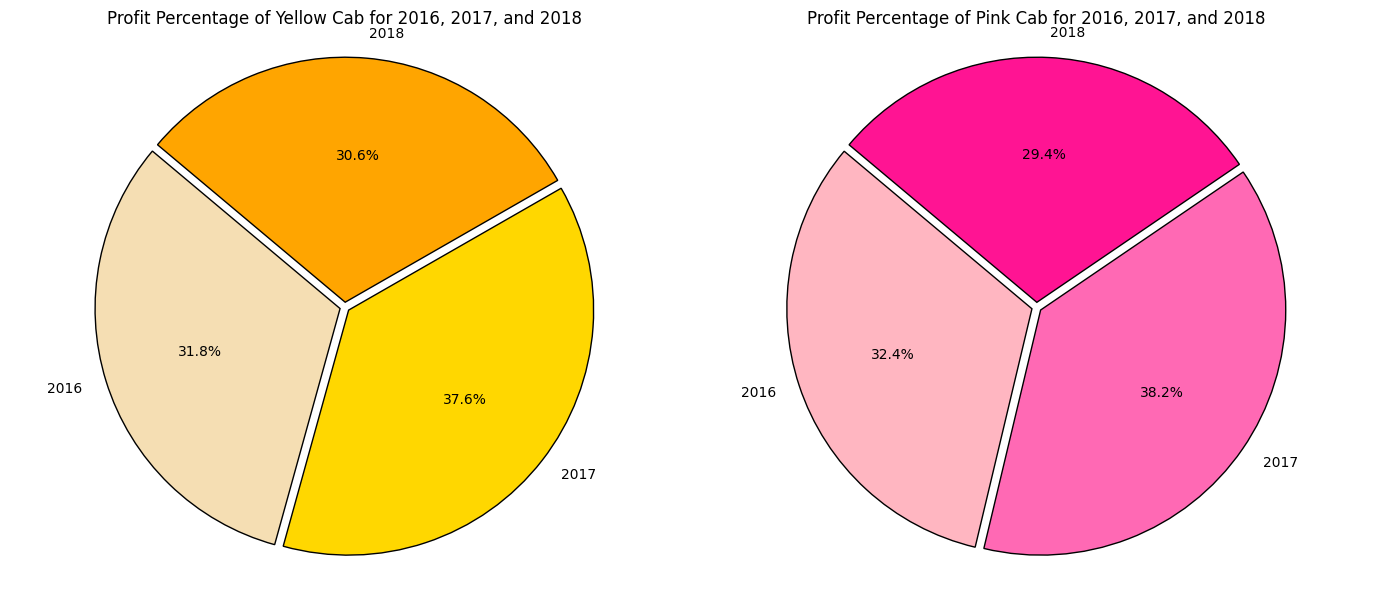

In [103]:
cab1_filtered_data = cab1_data[cab1_data['Year'].isin([2016, 2017, 2018])]
cab2_filtered_data = cab2_data[cab2_data['Year'].isin([2016, 2017, 2018])]

total_profit_cab1 = cab1_filtered_data['Profit'].sum()
cab1_filtered_data['Profit_Percentage'] = cab1_filtered_data['Profit'] / total_profit_cab1 * 100

total_profit_cab2 = cab2_filtered_data['Profit'].sum()
cab2_filtered_data['Profit_Percentage'] = cab2_filtered_data['Profit'] / total_profit_cab2 * 100

explode = (0.02, 0.02, 0.02)
colors_yellow_cab=['wheat','gold','orange']
colors_pink_cab=['lightpink','hotpink','deeppink']
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Pink
axs[0].pie(cab1_filtered_data['Profit_Percentage'], labels=cab1_filtered_data['Year'], autopct='%1.1f%%', startangle=140,colors=colors_yellow_cab, explode=explode, wedgeprops={'edgecolor': 'black'})
axs[0].set_title('Profit Percentage of Yellow Cab for 2016, 2017, and 2018')
axs[0].axis('equal')

# Yellow
axs[1].pie(cab2_filtered_data['Profit_Percentage'], labels=cab2_filtered_data['Year'], autopct='%1.1f%%', startangle=140,colors=colors_pink_cab, explode=explode, wedgeprops={'edgecolor': 'black'})
axs[1].set_title('Profit Percentage of Pink Cab for 2016, 2017, and 2018')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


In [104]:
print(cab2_filtered_data)

    Company  Year      Profit  Profit_Percentage
0  Pink Cab  2016  1746800.90          32.390510
1  Pink Cab  2017  2062166.41          38.238257
2  Pink Cab  2018  1583973.15          29.371234


In [105]:
print(cab1_filtered_data)

      Company  Year       Profit  Profit_Percentage
3  Yellow Cab  2016  14234041.54          31.809268
4  Yellow Cab  2017  16820078.50          37.588367
5  Yellow Cab  2018  13693975.43          30.602365


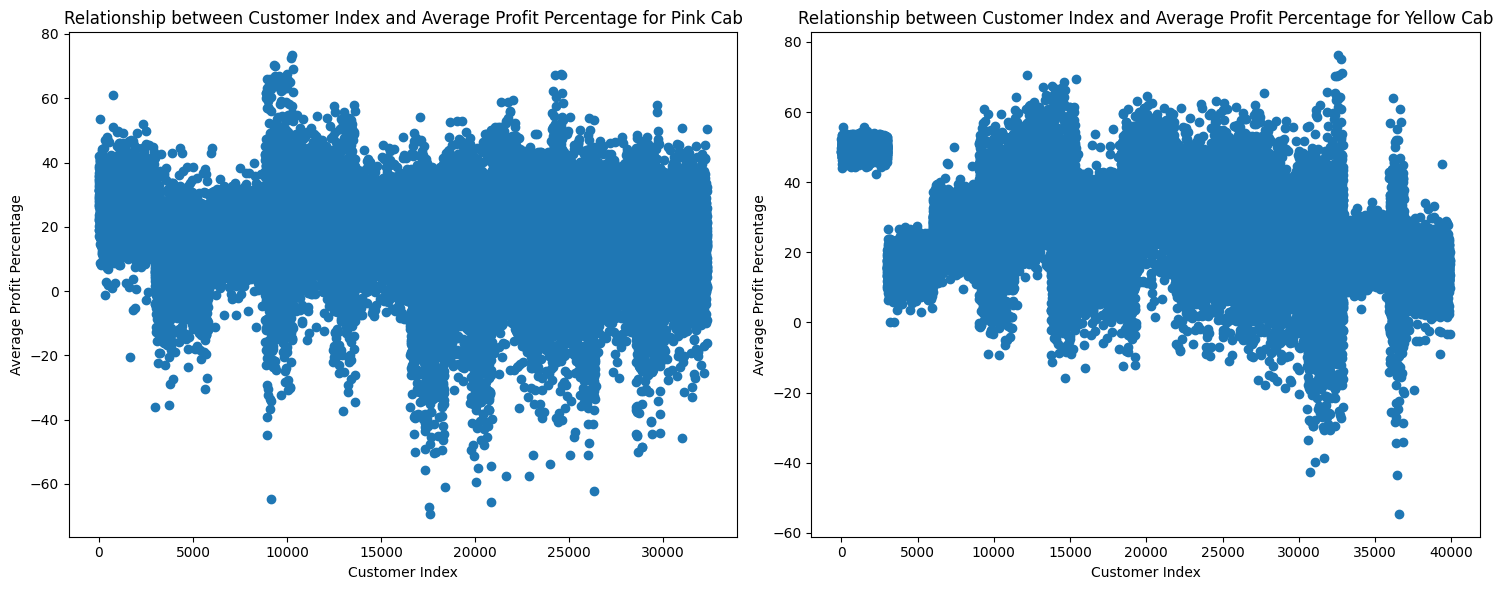

In [106]:
unique_companies = data['Company'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Iterate over each company
for i, company in enumerate(unique_companies):
    subset_data = data[data['Company'] == company][['Customer_ID', 'Profit_Percentage']]
    customer_profit_mean = subset_data.groupby('Customer_ID')['Profit_Percentage'].mean()
    total_customers = customer_profit_mean.shape[0]

    ax = axes[i]
    ax.scatter(range(total_customers), customer_profit_mean.values)
    ax.set_xlabel('Customer Index')
    ax.set_ylabel('Average Profit Percentage')
    ax.set_title(f'Relationship between Customer Index and Average Profit Percentage for {company}')

plt.tight_layout()
plt.show()



* **Coefficient of Variation (CV) for each company**

  **Yellow Cab** exhibits a **lower CV** compared to Pink Cab, indicating relatively **stable profits**. Their average profit is also significantly higher than Pink Cab's. While they have a higher standard deviation in terms of absolute values, it's proportionally smaller compared to their mean profit. This suggests Yellow Cab maintains **consistent profits** despite some variation across trips.

  **Pink Cab** has a **higher CV** compared to Yellow Cab, suggesting greater variability in profits. Their average profit is also considerably lower. This implies Pink Cab's **profits fluctuate** more significantly across trips, with a standard deviation close to their average profit.

In [107]:
company_std_dev = data.groupby('Company')['Profit'].std()
company_mean = data.groupby('Company')['Profit'].mean()
company_cv = company_std_dev / company_mean
most_stable_companies = company_cv.sort_values(ascending=True)
print("Coefficient of Variation (CV) for each company:")
print(most_stable_companies)
print('company_mean',company_mean,'company_std_dev',company_std_dev)

Coefficient of Variation (CV) for each company:
Company
Yellow Cab    1.072619
Pink Cab      1.237708
Name: Profit, dtype: float64
company_mean Company
Pink Cab       62.491344
Yellow Cab    160.082765
Name: Profit, dtype: float64 company_std_dev Company
Pink Cab       77.346064
Yellow Cab    171.707868
Name: Profit, dtype: float64


* **Trips: Quarterly Trends**

  **Pink Cab** showed a **more dynamic growth pattern**, with accelerated growth seen in the second half of 2017 and continuing into 2018, whilst **Yellow Cab** maintained a **relatively constant growth** rate in trip numbers across the years.

  **``2016:``** Both Pink Cab and Yellow Cab experienced an increase in the number of trips as the year progressed. Yellow Cab consistently had a higher number of trips compared to Pink Cab throughout the year.

  **``2017:``** The number of trips for both Pink Cab and Yellow Cab continued to rise steadily across all quarters. Yellow Cab maintained its lead in terms of the number of trips, although Pink Cab showed considerable growth.

  **``2018:``** The upward trend in trip numbers continued into 2018. Both Pink Cab and Yellow Cab witnessed growth in the first half of the year, with Pink Cab slightly closing the gap in trip numbers compared to Yellow Cab. However, in the second half of the year, Pink Cab experienced a more significant increase in trips compared to Yellow Cab.

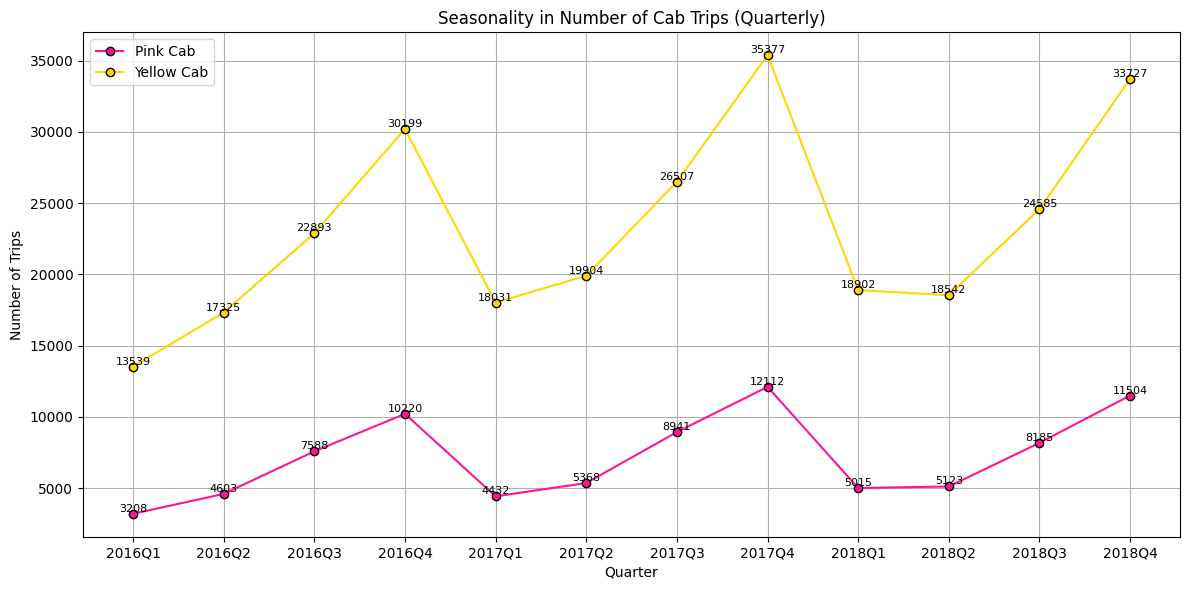

In [108]:
dataset=data.copy()
# Extract year and quarter from 'Travel_Date'
dataset['Travel_Date'] = pd.to_datetime(dataset['Travel_Date'])
dataset['Year_Quarter'] = dataset['Travel_Date'].dt.to_period('Q')
quarterly_data_company = dataset.groupby(['Year_Quarter', 'Company']).size().unstack(fill_value=0)
quarterly_data_company['Year_Quarter_str'] = quarterly_data_company.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(quarterly_data_company['Year_Quarter_str'], quarterly_data_company['Pink Cab'], marker='o', markeredgecolor='black', label='Pink Cab', color='deeppink')
plt.plot(quarterly_data_company['Year_Quarter_str'], quarterly_data_company['Yellow Cab'], marker='o', markeredgecolor='black', label='Yellow Cab', color='gold')

for i, row in quarterly_data_company.iterrows():
    plt.text(row['Year_Quarter_str'], row['Pink Cab'], str(row['Pink Cab']), ha='center', va='bottom', fontsize=8)
    plt.text(row['Year_Quarter_str'], row['Yellow Cab'], str(row['Yellow Cab']), ha='center', va='bottom', fontsize=8)

plt.xlabel('Quarter')
plt.ylabel('Number of Trips')
plt.title('Seasonality in Number of Cab Trips (Quarterly)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


* **Profit:Quarterly Trends:**

  **``2016:``** Both Pink Cab and Yellow Cab experienced an upward trajectory in profits throughout the year. Yellow Cab consistently outperformed Pink Cab in terms of profit generation in each quarter.

  **``2017:``** The profit trends continued to rise for both companies in 2017. However, Pink Cab's profitability remained below that of Yellow Cab across all quarters, indicating Yellow Cab's superior revenue-generating capabilities.

  **``2018:``** Profit dynamics varied across quarters in 2018. Pink Cab saw fluctuations in profitability, while Yellow Cab maintained relatively stable profits, albeit with some fluctuations. Yellow Cab continued to outperform Pink Cab in terms of profit generation in each quarter.

  The analysis of quarterly profit data highlights the financial performance of Pink Cab and Yellow Cab services from 2016 to 2018. While **Yellow Cab** maintains its position as the **market leader** with **higher profitability**, Pink Cab faces challenges in achieving comparable levels of financial success.

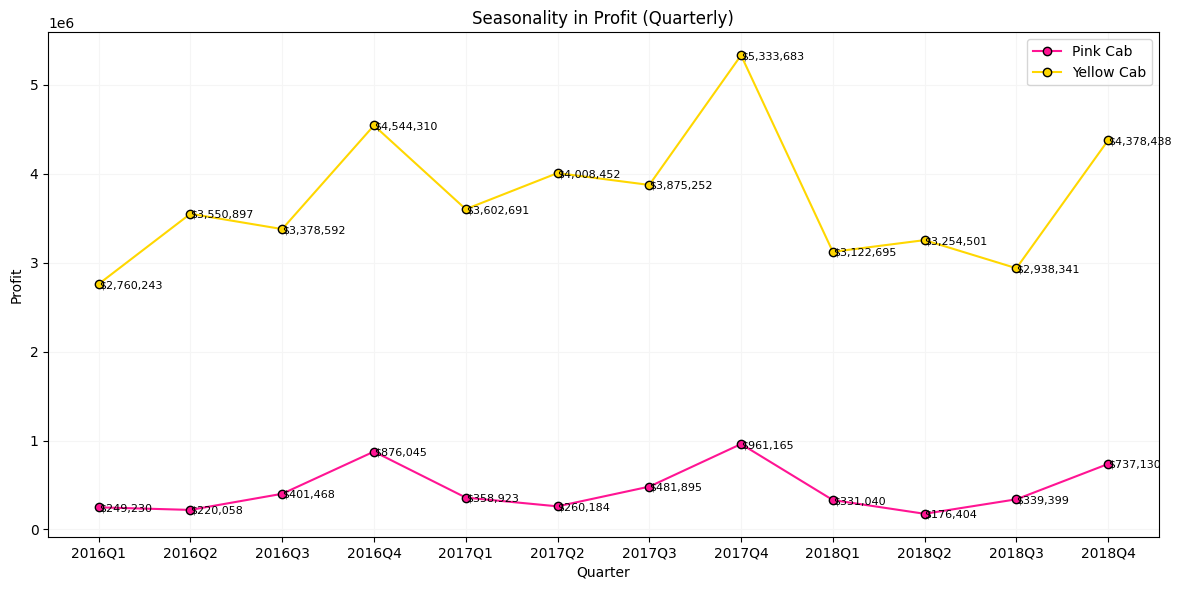

In [109]:
profit_data_company = dataset.groupby(['Year_Quarter', 'Company'])['Profit'].sum().unstack(fill_value=0)
profit_data_company['Year_Quarter_str'] = profit_data_company.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(profit_data_company['Year_Quarter_str'], profit_data_company['Pink Cab'], marker='o', markeredgecolor='black', label='Pink Cab', color='deeppink')
plt.plot(profit_data_company['Year_Quarter_str'], profit_data_company['Yellow Cab'], marker='o', markeredgecolor='black', label='Yellow Cab', color='gold')
# Annotating profit values
for i, row in profit_data_company.iterrows():
    plt.text(row['Year_Quarter_str'], row['Pink Cab'], f"${row['Pink Cab']:,.0f}", ha='left', va='center_baseline', fontsize=8)
    plt.text(row['Year_Quarter_str'], row['Yellow Cab'], f"${row['Yellow Cab']:,.0f}", ha='left', va='center_baseline', fontsize=8)

plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Seasonality in Profit (Quarterly)')

plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.grid(color='whitesmoke')
plt.tight_layout()
plt.show()



*   **Demographic profit analysis**

    In most cities, Yellow Cab consistently shows higher average profits than Pink

    **``City-wise Performance``**

    New York, NY stands out as the city with the highest average profit for Yellow Cab, which could indicate either higher demand, higher pricing, or both. Pink Cab, on the other hand, has relatively lower profits in New York. Other cities such as Dallas, TX, Orange County, and Silicon Valley also show strong performance for Yellow Cab across the years. Cities like Washington, DC, Boston, MA, and Pittsburgh, PA generally have lower profits for both companies, indicating lower cab usage or lower profitability in these locations.

    The profit trends remain relatively stable across the three years, with no major drops or spikes in profits for either company. Some cities show slight declines in average profit from 2016 to 2018 for both companies, such as Miami, FL, Phoenix, AZ, and Chicago, IL.

    **``Close Competition in Some Cities:``**

    In cities like Austin, TX and Miami, FL, the difference between the two companies’ average profits is relatively small, suggesting closer competition in these areas.

    **``Underperforming Cities:``**

    Cities like Atlanta, GA, San Diego, CA, and Pittsburgh, PA have lower average profits for both companies across all three years, which could suggest a smaller market size or less demand for cab services in these locations.

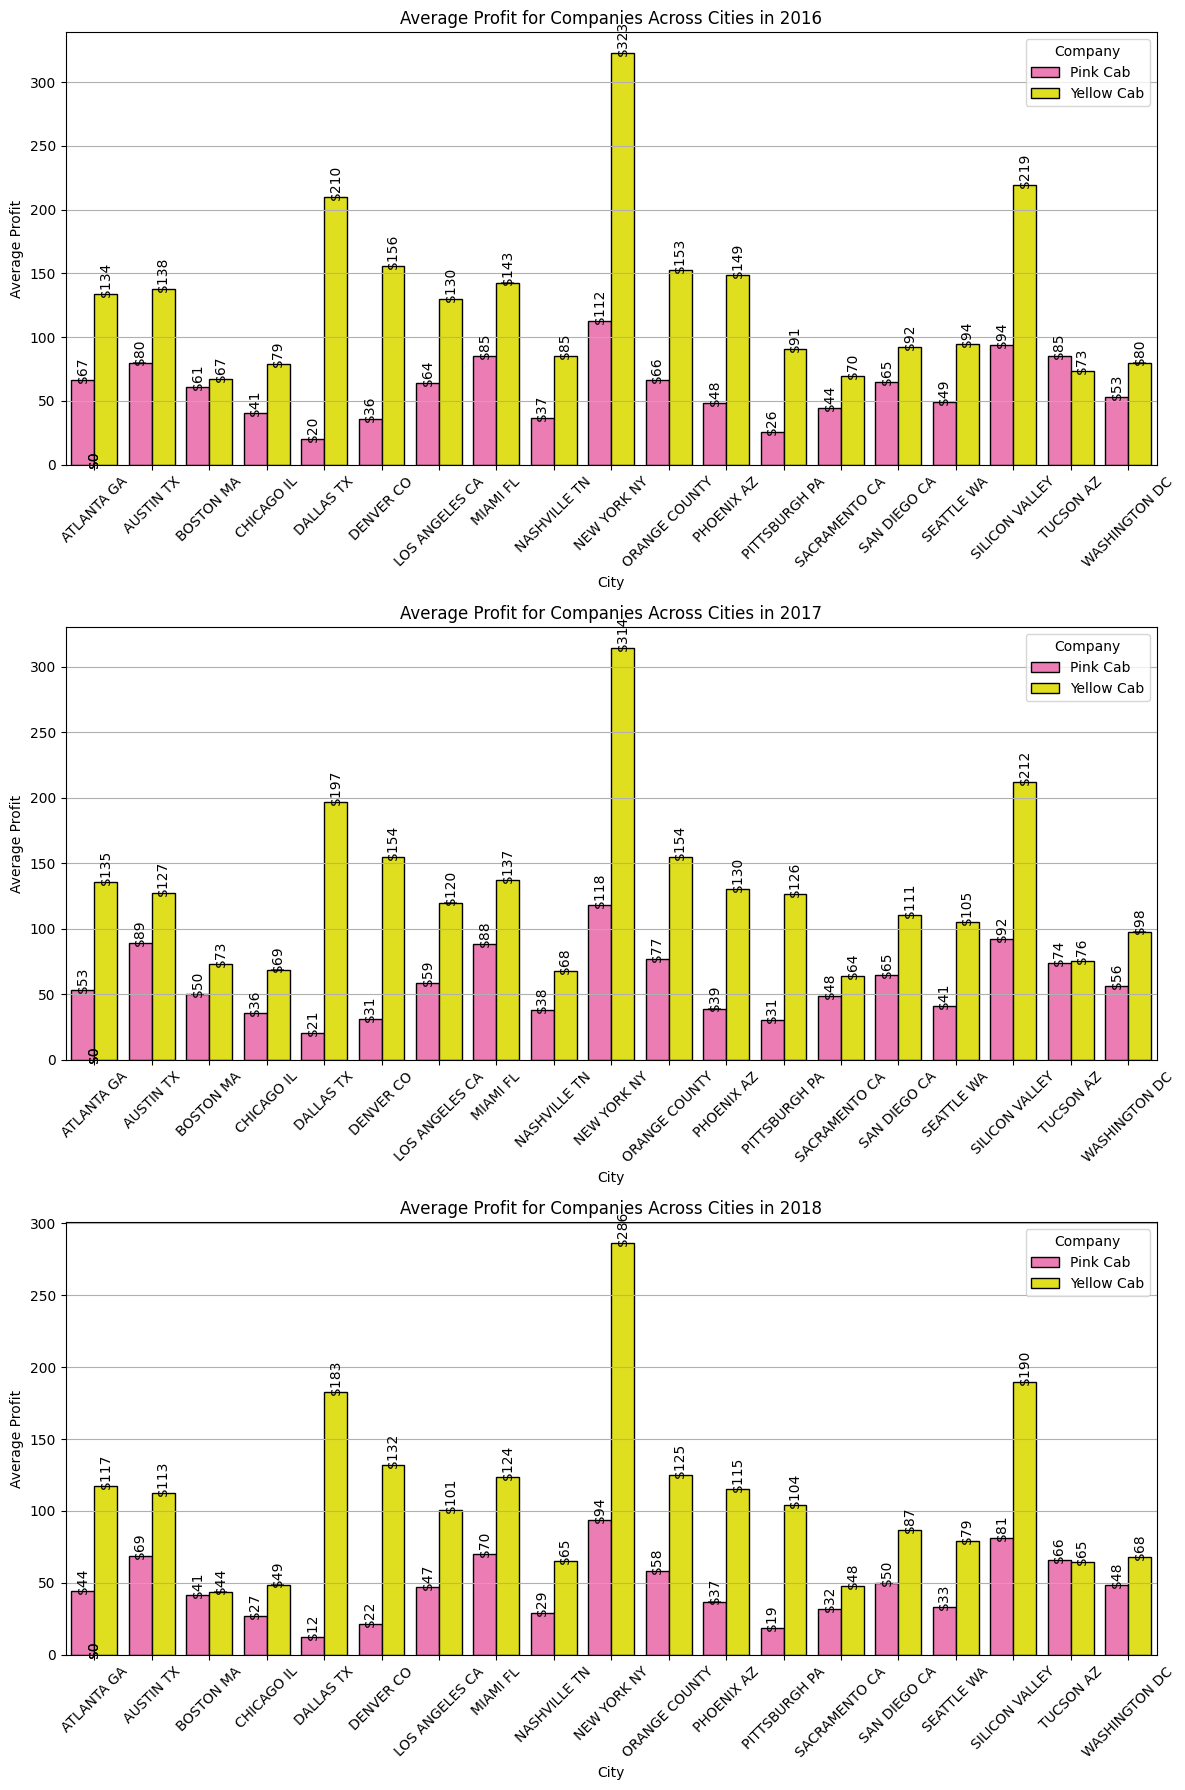

In [110]:
# Group by City and calculate total and average profit
colors_company = [ 'hotpink','yellow']

# Create subplots for 2016, 2017, and 2018
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

# Filter and plot for 2016
data_2016 = data[data['Year'] == 2016]
Company_profit_2016 = data_2016.groupby(['City', 'Company'])['Profit'].agg(['sum', 'mean', 'count']).reset_index()
Company_profit_2016.columns = ['City', 'Company', 'Total_Profit', 'Avg_Profit', 'Num_Trips']
#Company_profit_2016 = Company_profit_2016.sort_values(by='Avg_Profit', ascending=False)
sns.barplot(x='City', y='Avg_Profit', hue='Company', data=Company_profit_2016, palette=colors_company, ax=axes[0], edgecolor='black')
axes[0].set_title('Average Profit for Companies Across Cities in 2016')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Profit')
axes[0].grid(axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height + 0.05,  # Y coordinate (a little above the bar)
        f'${height:,.0f}',  # Format as currency with 2 decimal points
        ha='center',
        rotation=90  # Horizontal alignment (centered on the bar)
    )
plt.grid(axis='y')
axes[0].legend(title='Company')

# Filter and plot for 2017
data_2017 = data[data['Year'] == 2017]
Company_profit_2017 = data_2017.groupby(['City', 'Company'])['Profit'].agg(['sum', 'mean', 'count']).reset_index()
Company_profit_2017.columns = ['City', 'Company', 'Total_Profit', 'Avg_Profit', 'Num_Trips']
#Company_profit_2017 = Company_profit_2017.sort_values(by='Avg_Profit', ascending=False)
sns.barplot(x='City', y='Avg_Profit', hue='Company', data=Company_profit_2017, palette=colors_company, ax=axes[1], edgecolor='black')
axes[1].set_title('Average Profit for Companies Across Cities in 2017')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Average Profit')
axes[1].grid(axis='y')
plt.grid(axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height + 0.05,  # Y coordinate (a little above the bar)
        f'${height:,.0f}',  # Format as currency with 2 decimal points
        ha='center',
        rotation=90  # Horizontal alignment (centered on the bar)
    )
axes[1].legend(title='Company')

# Filter and plot for 2018
data_2018 = data[data['Year'] == 2018]
Company_profit_2018 = data_2018.groupby(['City', 'Company'])['Profit'].agg(['sum', 'mean', 'count']).reset_index()
Company_profit_2018.columns = ['City', 'Company', 'Total_Profit', 'Avg_Profit', 'Num_Trips']
#Company_profit_2018 = Company_profit_2018.sort_values(by='Avg_Profit', ascending=False)
sns.barplot(x='City', y='Avg_Profit', hue='Company', data=Company_profit_2018, palette=colors_company, ax=axes[2], edgecolor='black')
axes[2].set_title('Average Profit for Companies Across Cities in 2018')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Average Profit')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(
        p.get_x() + p.get_width() / 2,  # X coordinate
        height + 0.05,  # Y coordinate (a little above the bar)
        f'${height:,.0f}',  # Format as currency with 2 decimal points
        ha='center',
        rotation=90  # Horizontal alignment (centered on the bar)
    )
plt.grid(axis='y')
axes[2].legend(title='Company')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()





*   **Average Profit by Distance**

      The bar chart illustrates the average profit by distance range for Yellow Cab and Pink Cab in 2018, revealing several key insights. Yellow Cab consistently outperforms Pink Cab for trips longer than 10 km, with the profit gap widening as distance increases, especially beyond 20 km, where Yellow Cab dominates, particularly in the 45-50 km range. Short-distance trips (0-5 km and 5-10 km) generate minimal profit for both companies, indicating that these trips may barely cover costs. Yellow Cab shows a steady increase in profit with distance, especially in the 25-50 km range, suggesting better pricing strategies and operational efficiency in long-distance markets. In contrast, Pink Cab's profits rise more modestly with distance, implying it may focus more on short to medium trips. Yellow Cab's strong performance in long-distance trips highlights an opportunity for further enhancing services for long-distance riders, while both companies may need to reassess pricing or cost structures in shorter distances to boost profitability.




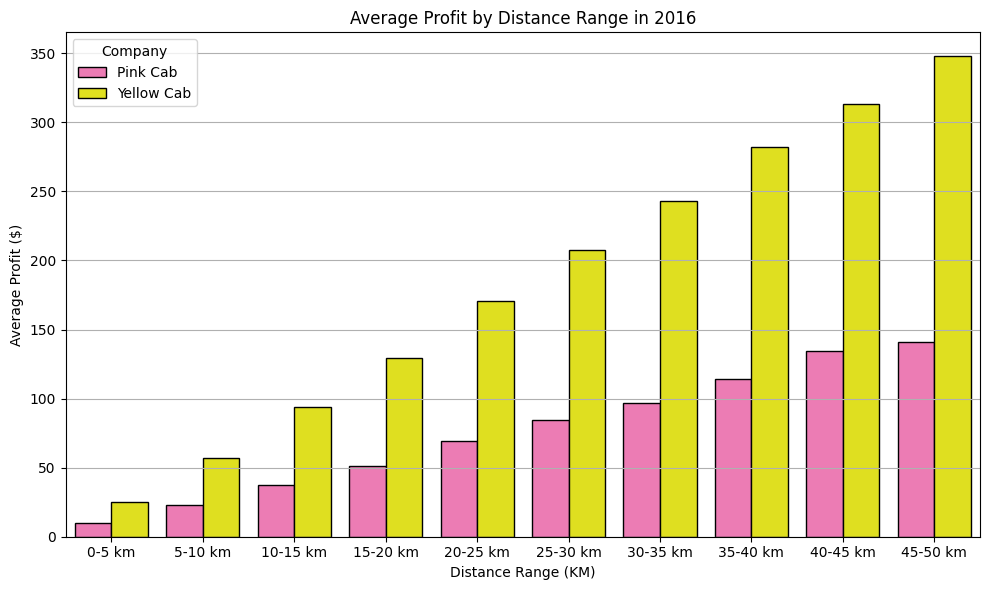

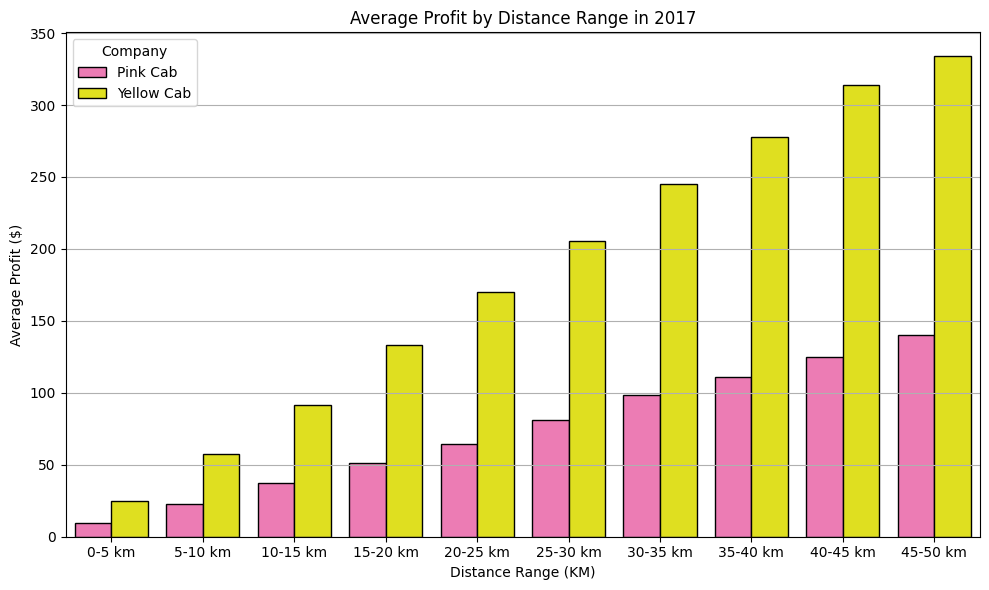

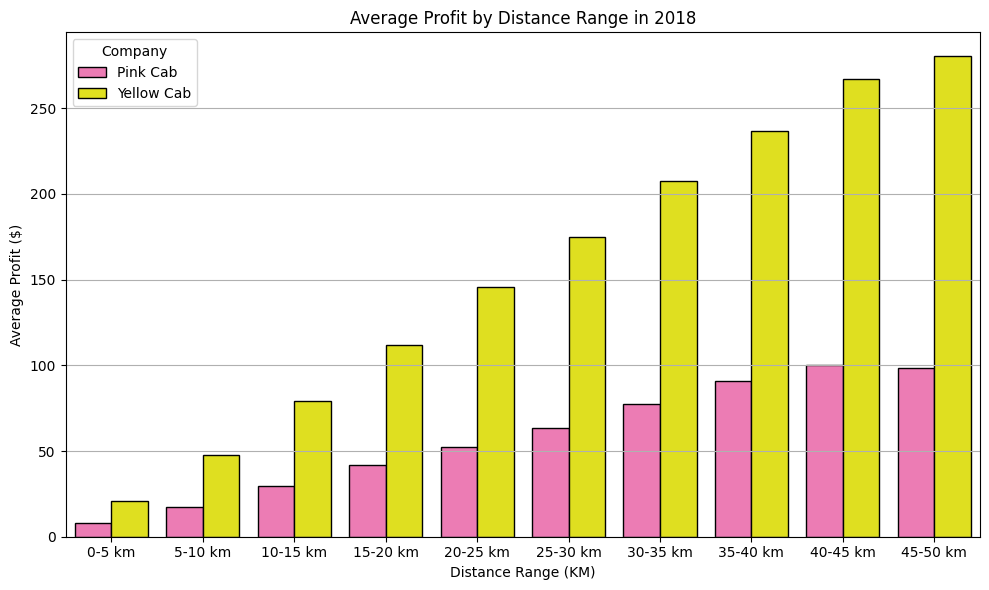

In [111]:
years = [2016, 2017, 2018]
# Create distance bins
df= data.copy()
df['Distance_Bins'] = pd.cut(df['KM_Travelled'], bins=[0, 5, 10,15, 20,25, 30,35,40,45, 50], labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20-25 km', '25-30 km','30-35 km','35-40 km','40-45 km','45-50 km'])
# Loop over each year to create separate plots
for year in years:

    df_year = df[df['Year'] == year]

    # Group by distance bins and company, then calculate total, average profit, and trip count
    profit_by_distance = df_year.groupby(['Distance_Bins', 'Company'])['Profit'].agg(['sum', 'mean', 'count']).reset_index()
    profit_by_distance.columns = ['Distance_Range', 'Company', 'Total_Profit', 'Avg_Profit', 'Num_Trips']

    plt.figure(figsize=(10, 6))

    # Plot average profit by distance range, using hue to differentiate companies
    sns.barplot(x='Distance_Range', y='Avg_Profit', hue='Company', data=profit_by_distance, palette=colors_company, edgecolor='black')

    plt.title(f'Average Profit by Distance Range in {year}')
    plt.xlabel('Distance Range (KM)')
    plt.ylabel('Average Profit ($)')
    plt.grid(axis='y')
    # Show the plot
    plt.tight_layout()
    plt.show()


# **Cab User Analysis**


**Market Penetration**

The market penetration data shows significant variation across cities, with Boston, MA (32.14%) and Washington, DC (30.32%) leading in user adoption rates, reflecting strong demand for cab services in smaller, dense urban areas. In contrast, major metropolitan areas like Los Angeles, CA (9.03%), Chicago, IL (8.41%), and New York, NY (3.59%) exhibit lower penetration despite larger populations, likely due to the availability of public transport and personal vehicles. Mid-sized cities such as San Diego, CA (7.30%) and Seattle, WA (3.73%) show moderate penetration, while cities like Pittsburgh, PA (0.67%), Phoenix, AZ (0.65%), and Tucson, AZ (0.90%) represent opportunities for growth with lower adoption rates. Silicon Valley (2.31%) and Austin, TX (2.14%) also offer potential for expansion due to their tech-savvy populations. Regional variations suggest that denser Northeastern cities have higher penetration compared to more sprawling cities in the Southwest, highlighting areas for strategic marketing and service improvement.



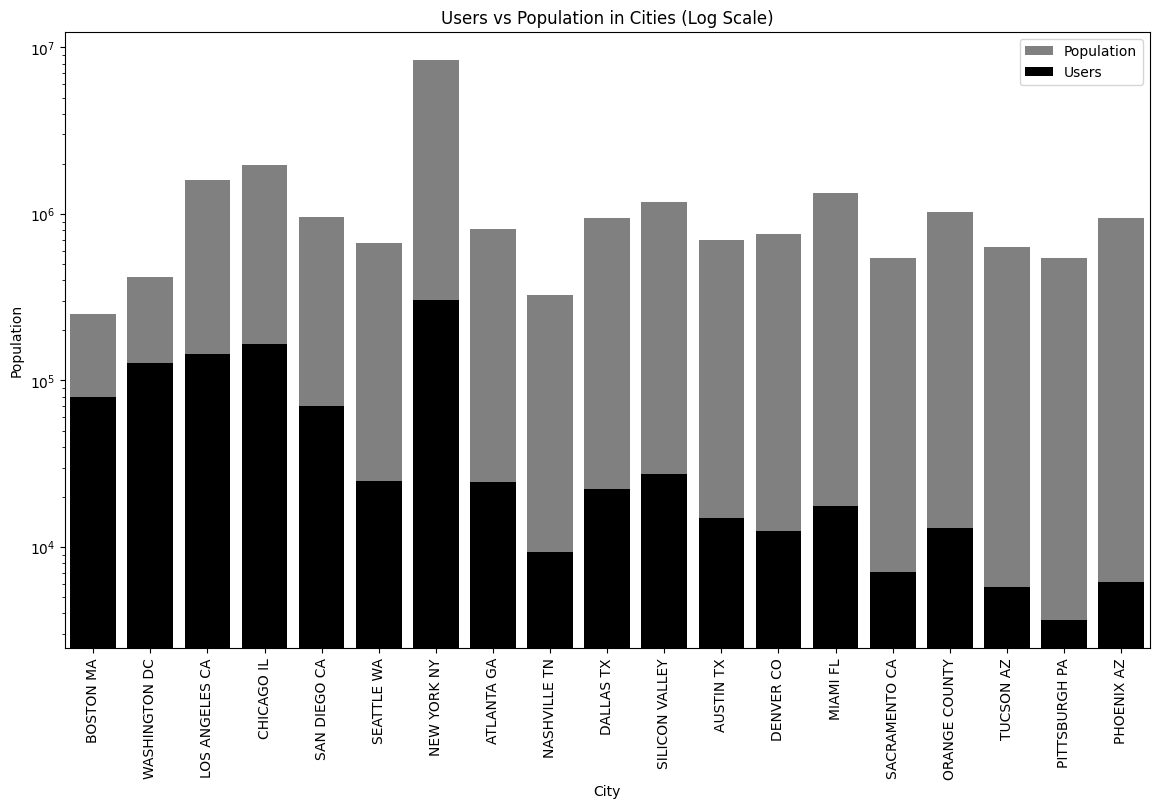

              City  Population   Users  User_Percentage
2        BOSTON MA      248968   80021        32.141078
18   WASHINGTON DC      418859  127001        30.320705
6   LOS ANGELES CA     1595037  144132         9.036279
3       CHICAGO IL     1955130  164468         8.412126
14    SAN DIEGO CA      959307   69995         7.296413
15      SEATTLE WA      671238   25063         3.733847
9      NEW YORK NY     8405837  302149         3.594514
0       ATLANTA GA      814885   24701         3.031225
8     NASHVILLE TN      327225    9270         2.832913
4        DALLAS TX      942908   22157         2.349858
16  SILICON VALLEY     1177609   27247         2.313756
1        AUSTIN TX      698371   14978         2.144705
5        DENVER CO      754233   12421         1.646839
7         MIAMI FL     1339155   17675         1.319862
13   SACRAMENTO CA      545776    7044         1.290639
10   ORANGE COUNTY     1030185   12994         1.261327
17       TUCSON AZ      631442    5712         0

In [112]:
df_distinct = df.drop_duplicates(subset=['City']).reset_index()

# Calculate the User Percentage for distinct cities
df_distinct['User_Percentage'] = (df_distinct['Users'] / df_distinct['Population']) * 100

df_distinct = df_distinct.sort_values(by='User_Percentage', ascending=False)

# plot the data including the percentage
plt.figure(figsize=(14, 8))

# Use log scale
sns.barplot(x="City", y="Population", data=df_distinct, color="grey", label="Population")
sns.barplot(x="City", y="Users", data=df_distinct, color="black", label="Users")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Apply log scale to y-axis
plt.yscale('log')

# Title and legend
plt.title("Users vs Population in Cities (Log Scale)")
plt.legend()

plt.show()

# Display the data with the new percentage column for verification
print(df_distinct[['City', 'Population', 'Users', 'User_Percentage']])


In [113]:
user_data = df[df['City'] =='BOSTON MA']
user_data.head()

Transaction_ID   Company       City  KM_Travelled  Price_Charged  \
8         10000019  Pink Cab  BOSTON MA         14.40         191.61   
9         10000020  Pink Cab  BOSTON MA         10.89         156.98   
10        10000021  Pink Cab  BOSTON MA         39.60         570.83   
11        10000022  Pink Cab  BOSTON MA         21.80         317.27   
12        10000023  Pink Cab  BOSTON MA         12.00         158.01   

    Cost_of_Trip Travel_Date  Year  Month  Day  ...  Gender Age  Income  \
8         146.88  2016-01-12  2016      1   12  ...    Male  33   19271   
9         113.26  2016-01-06  2016      1    6  ...    Male  57    5068   
10        475.20  2016-01-11  2016      1   11  ...    Male  20   23602   
11        220.18  2016-01-06  2016      1    6  ...    Male  28   27338   
12        134.40  2016-01-11  2016      1   11  ...    Male  63    6683   

    Population  Users Holiday  Holiday_Indicator  Profit  Profit_Percentage  \
8       248968  80021       0                  0   44.73              23.34   
9       248968  80021       0                  0   43.72              27.85   
10      248968  80021       0                  0   95.63              16.75   
11      248968  80021       0                  0   97.09              30.60   
12      248968  80021       0                  0   23.61              14.94   

    Distance_Bins  
8        10-15 km  
9        10-15 km  
10       35-40 km  
11       20-25 km  
12       10-15 km  

[5 rows x 25 columns]

In [114]:
Cab_Users=data.groupby(['Company','Gender','Age','Payment_Mode','City'])['Price_Charged'].mean().reset_index()
Cab_Users.head(10)

Company  Gender  Age Payment_Mode            City  Price_Charged
0  Pink Cab  Female   18         Card      ATLANTA GA     342.778421
1  Pink Cab  Female   18         Card       AUSTIN TX     298.598261
2  Pink Cab  Female   18         Card       BOSTON MA     327.977667
3  Pink Cab  Female   18         Card      CHICAGO IL     252.780000
4  Pink Cab  Female   18         Card       DALLAS TX     328.845000
5  Pink Cab  Female   18         Card       DENVER CO     310.190000
6  Pink Cab  Female   18         Card  LOS ANGELES CA     318.292857
7  Pink Cab  Female   18         Card        MIAMI FL     315.195263
8  Pink Cab  Female   18         Card    NASHVILLE TN     280.865294
9  Pink Cab  Female   18         Card     NEW YORK NY     343.939500

* **Number of Male and Female Users in Each Company:**

  The bar plot shows the count of male and female users for each cab company (Pink Cab and Yellow Cab).

  It appears that there are **more male users** than female users for both cab companies.

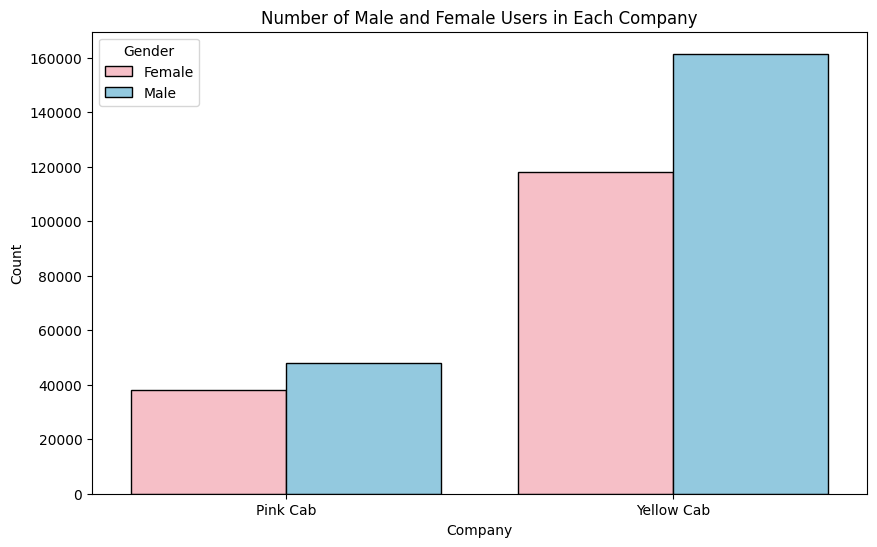

In [115]:
gender_counts = data.groupby(['Company', 'Gender']).size().reset_index(name='Count')
colors_gender=['lightpink','skyblue']
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Count', hue='Gender', data=gender_counts, palette=colors_gender,edgecolor='black')
plt.title('Number of Male and Female Users in Each Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

* **Distribution of Female and Male Users Across Cities for Pink Cab and Yellow Cab:**

  The first subplot displays the distribution of female and male users for Pink Cab across different cities.

  The second subplot illustrates the distribution of female and male users for Yellow Cab across different cities.

  The gender distribution varies across cities, with some cities having more female users while others have more male users.

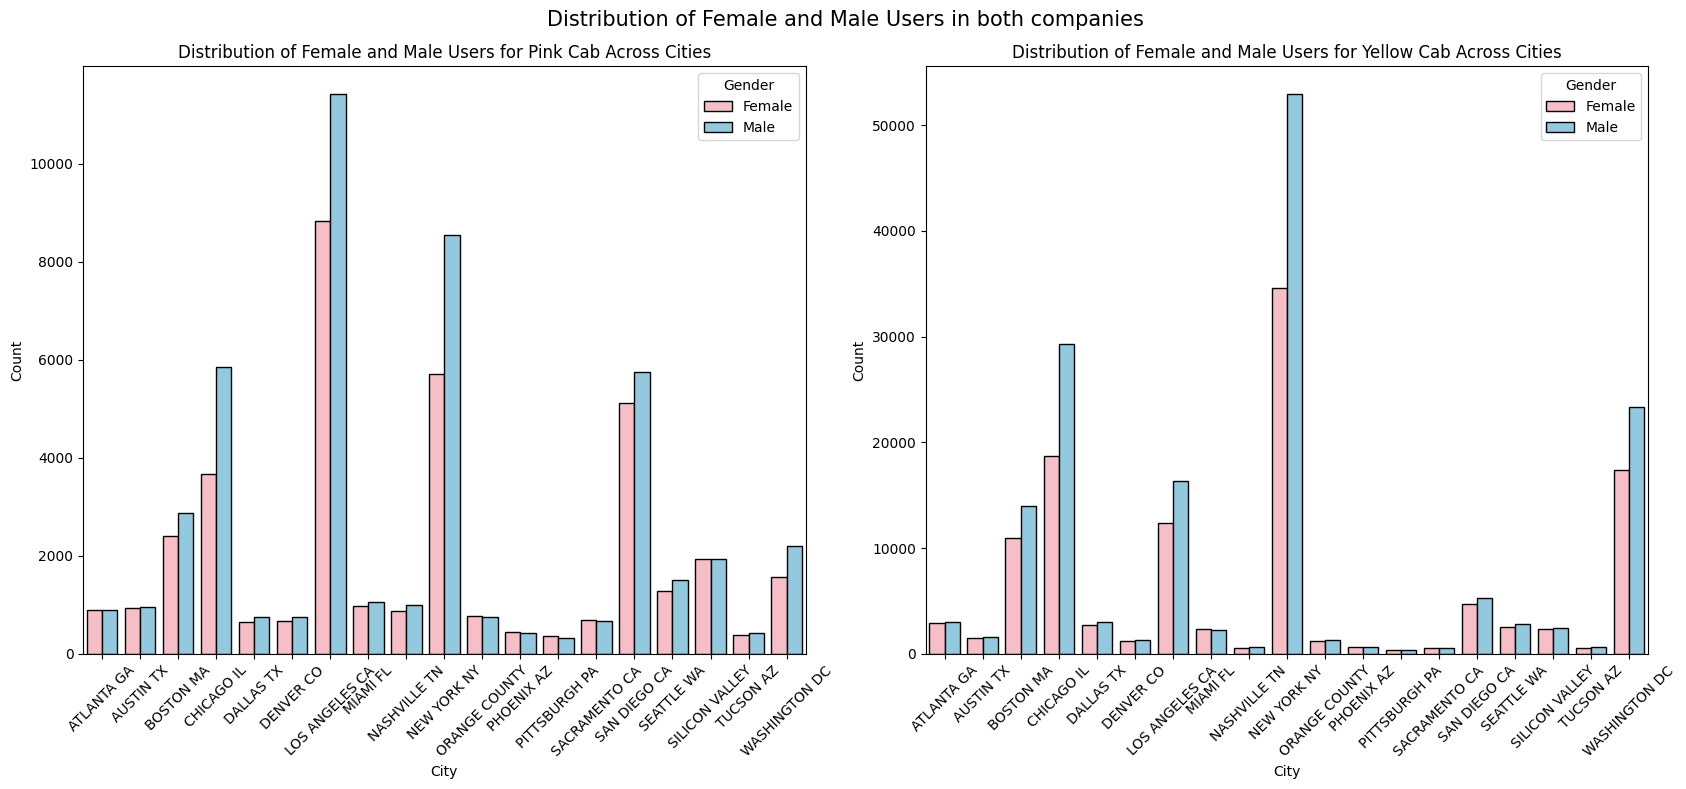

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
colors_gender = ['lightpink', 'skyblue']
fig.suptitle('Distribution of Female and Male Users in both companies', fontsize=15)

# Pink Cab
pink_cab_gender_city_counts = PinkCab_df.groupby(['City', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='City', y='Count', hue='Gender', data=pink_cab_gender_city_counts, palette=colors_gender, ax=axes[0],edgecolor='black')
axes[0].set_title('Distribution of Female and Male Users for Pink Cab Across Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Gender')

# Yellow Cab
yellow_cab_gender_city_counts = YellowCab_df.groupby(['City', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='City', y='Count', hue='Gender', data=yellow_cab_gender_city_counts, palette=colors_gender, ax=axes[1],edgecolor='black')
axes[1].set_title('Distribution of Female and Male Users for Yellow Cab Across Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

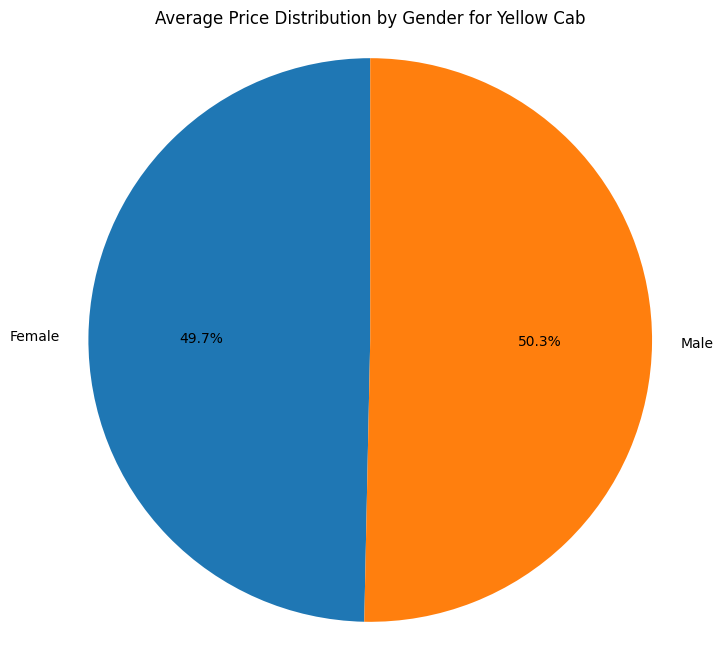

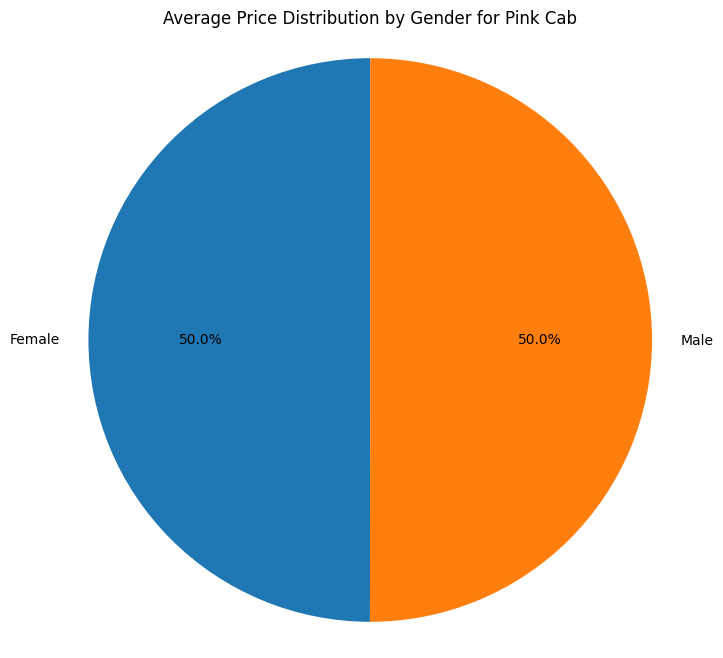

In [117]:
gender_yellow_cab=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_pink_cab=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(gender_yellow_cab, labels=gender_yellow_cab.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Average Price Distribution by Gender for Yellow Cab')
ax1.axis('equal')

fig, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(gender_pink_cab, labels=gender_pink_cab.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Average Price Distribution by Gender for Pink Cab')
ax2.axis('equal')

plt.show()

* **Price Charged for Female and Male Users in both companies:**

  The first subplot shows the average price charged to female and male users for **Pink Cab** across different cities.

  The second subplot shows the average price charged to female and male users for **Yellow Cab** across different cities.

  The bars represent the average price charged to users of each gender in each city.

  Interestingly, there are **variations** in the average price charged to female and male users across different cities for both cab companies.

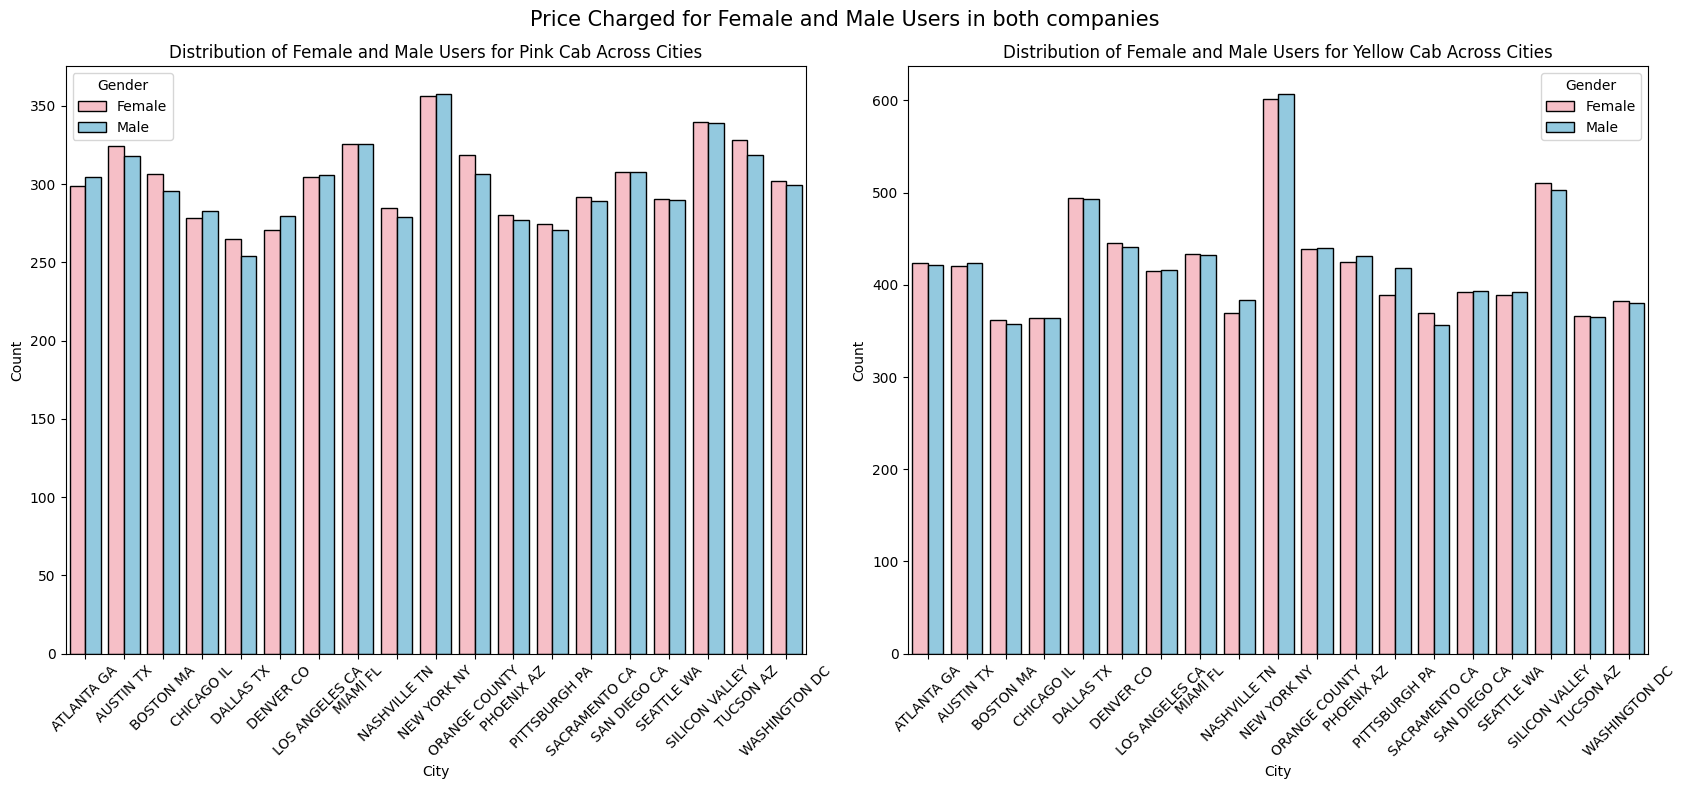

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(17, 8))
colors_gender = ['lightpink', 'skyblue']
fig.suptitle('Price Charged for Female and Male Users in both companies', fontsize=15)

# Pink Cab
pink_cab_gender_city_counts = PinkCab_df.groupby(['City', 'Gender'])['Price_Charged'].mean().reset_index()
sns.barplot(x='City', y='Price_Charged', hue='Gender', data=pink_cab_gender_city_counts, palette=colors_gender, ax=axes[0],edgecolor='black')
axes[0].set_title('Distribution of Female and Male Users for Pink Cab Across Cities')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].legend(title='Gender')

# Yellow Cab
yellow_cab_gender_city_counts = YellowCab_df.groupby(['City', 'Gender'])['Price_Charged'].mean().reset_index()
sns.barplot(x='City', y='Price_Charged', hue='Gender', data=yellow_cab_gender_city_counts, palette=colors_gender, ax=axes[1],edgecolor='black')
axes[1].set_title('Distribution of Female and Male Users for Yellow Cab Across Cities')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

# Customer Retention

Surprisingly, Pink Cab has reattained its customer (atleast 10 rides over 3 years) in both genders when compared to Yellow Cab

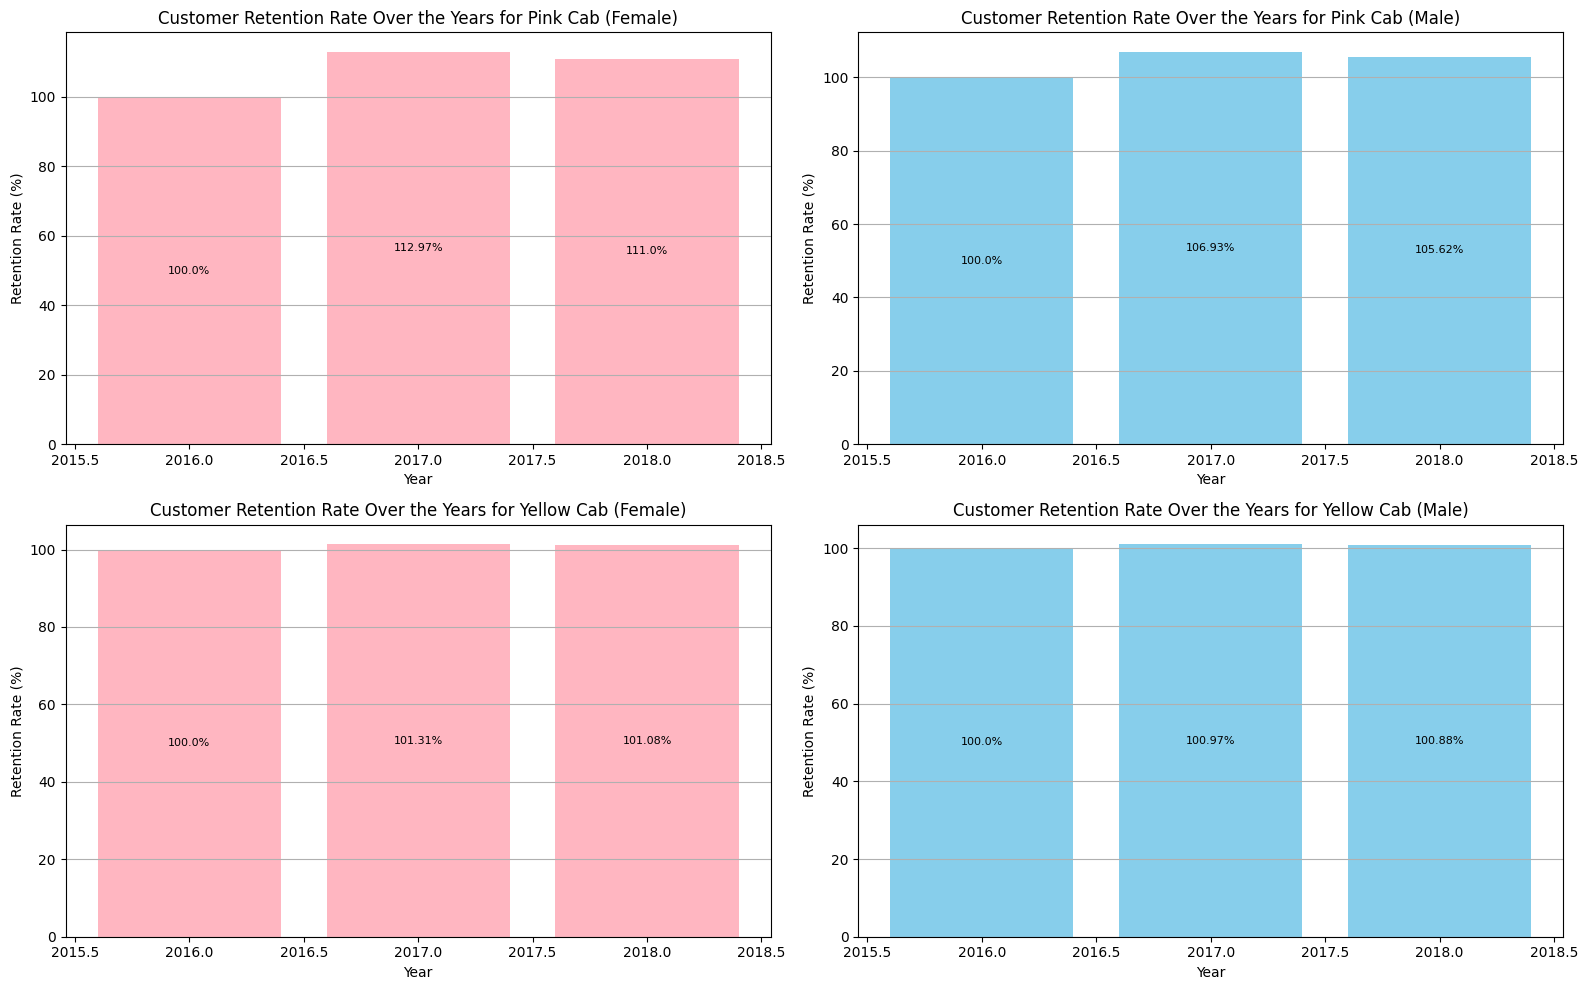

In [119]:
df=data.copy()
users_atleast_10_rides = df.groupby('Customer_ID').size().reset_index(name='Ride_Count')
users_atleast_10_rides = users_atleast_10_rides[users_atleast_10_rides['Ride_Count'] >= 10]

filtered_df = df[df['Customer_ID'].isin(users_atleast_10_rides['Customer_ID'])]

# to count the number of retained customers each year for each gender and company
retained_customers_by_year_gender_company = filtered_df.groupby(['Year', 'Gender', 'Company'])['Customer_ID'].nunique().reset_index()
retained_customers_by_year_gender_company.rename(columns={'Customer_ID': 'Retained_Customers'}, inplace=True)

# Calculate the retention rate for each year, gender, and company
retained_customers_by_year_gender_company['Retention_Rate'] = (retained_customers_by_year_gender_company['Retained_Customers'] / retained_customers_by_year_gender_company.groupby(['Gender', 'Company'])['Retained_Customers'].transform('first')) * 100
companies = retained_customers_by_year_gender_company['Company'].unique()
genders = retained_customers_by_year_gender_company['Gender'].unique()

fig, axes = plt.subplots(len(companies), len(genders), figsize=(16, 10))
colors_gender=['lightpink','skyblue','skyblue','lightpink','skyblue','skyblue']
for i, company in enumerate(companies):
    for j, gender in enumerate(genders):
        data = retained_customers_by_year_gender_company[(retained_customers_by_year_gender_company['Company'] == company) & (retained_customers_by_year_gender_company['Gender'] == gender)]
        ax = axes[i, j] if len(companies) > 1 and len(genders) > 1 else axes[j] if len(companies) == 1 else axes[i]
        if not data.empty:
            ax.bar(data['Year'], data['Retention_Rate'], color=colors_gender[j])
            ax.set_title(f'Customer Retention Rate Over the Years for {company} ({gender})')
            ax.set_xlabel('Year')
            ax.set_ylabel('Retention Rate (%)')
            ax.grid(axis='y')
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy()
                round_percent = round(height, 2)
                ax.annotate(f'{round_percent}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


* **Total Customers by Age Range**

  The chart shows that the largest customer segment falls in the 20-29 age range (32.2%), followed by the 30-39 age range (31.6%). The proportion of customers reduces as age range increases.

In [120]:
dataset=merged_df.copy()
bins = [18, 19, 29, 39, 49, 59, 69]
labels = ['18-19', '20-29', '30-39', '40-49', '50-59', '60+']
dataset['Age_range'] = pd.cut(dataset.Age, bins, labels = labels,include_lowest = True)
age_range_share = dataset.groupby('Age_range').Customer_ID.nunique()

Text(0.5, 1.0, 'Total Customers by Age Range')

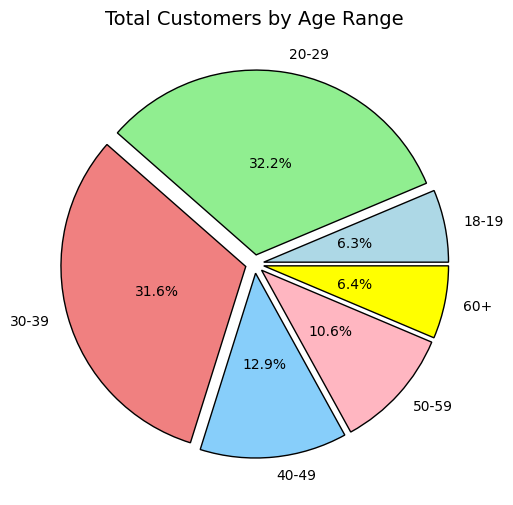

In [121]:
pie, ax = plt.subplots(figsize=[10,6])
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'yellow']
labels = age_range_share.keys()
plt.pie(x=age_range_share, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5,colors=colors,wedgeprops={'edgecolor': 'black'})
plt.title("Total Customers by Age Range", fontsize=14)

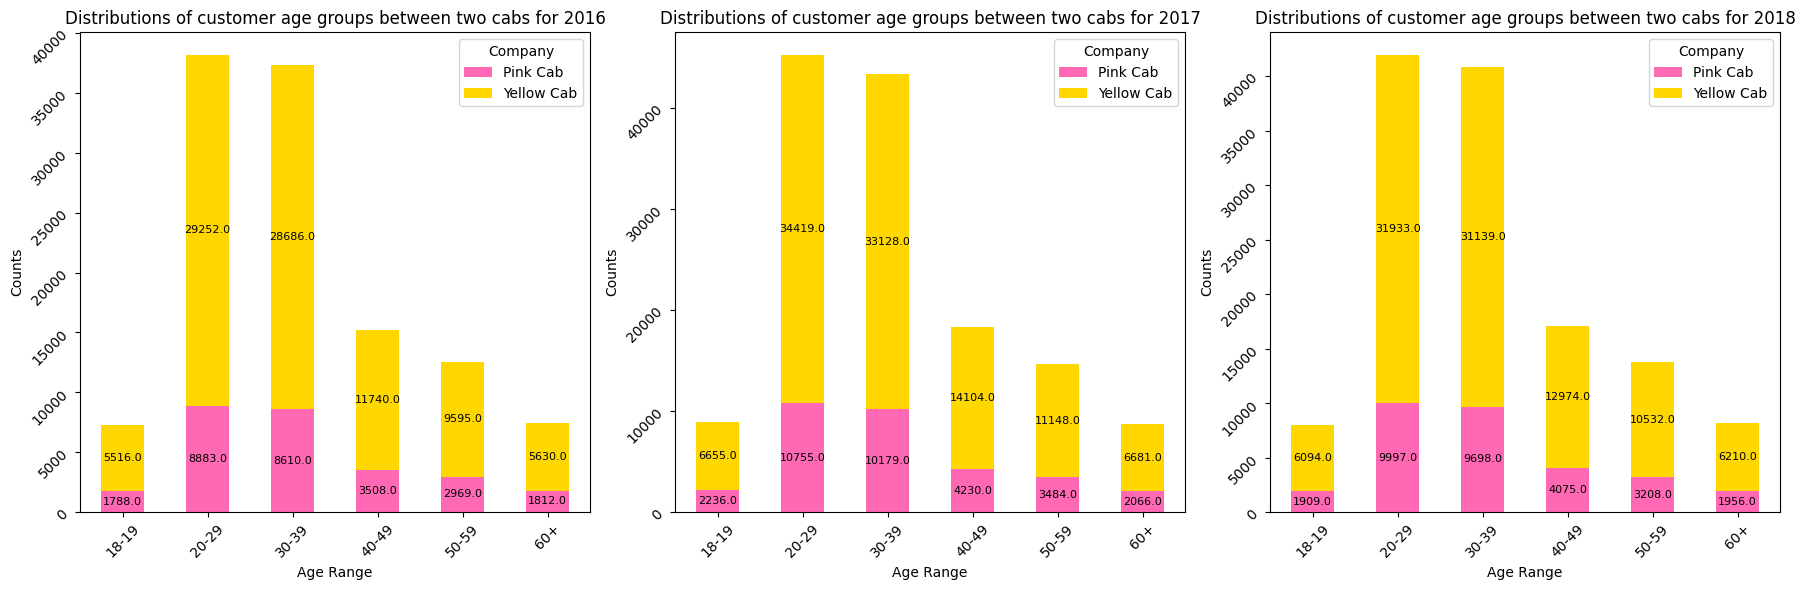

In [122]:
dataset_2016 = dataset[dataset['Year'] == 2016]
dataset_2017 = dataset[dataset['Year'] == 2017]
dataset_2018 = dataset[dataset['Year'] == 2018]
company_colors=['hotpink','gold']
grouped_data_2016 = dataset_2016.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)
grouped_data_2017 = dataset_2017.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)
grouped_data_2018 = dataset_2018.groupby(['Age_range', 'Company']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, df_data, year in zip(axes, [grouped_data_2016, grouped_data_2017, grouped_data_2018], [2016, 2017, 2018]):
    df_data.plot(kind='bar', stacked=True, ax=ax, color=company_colors)
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Counts')
    ax.set_title(f'Distributions of customer age groups between two cabs for {year}')
    ax.legend(title='Company')
    ax.tick_params(labelrotation=45)
    # Annotate each stack with its count
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


In [123]:
!pip install cmasher

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.3/533.3 kB 12.2 MB/s eta 0:00:00


# Profitability across Income Class

Yellow Cab has a larger customer base and/or charges higher prices than Pink Cab. It is also seen that both companies earn the most revenue from customers in the upper income class.


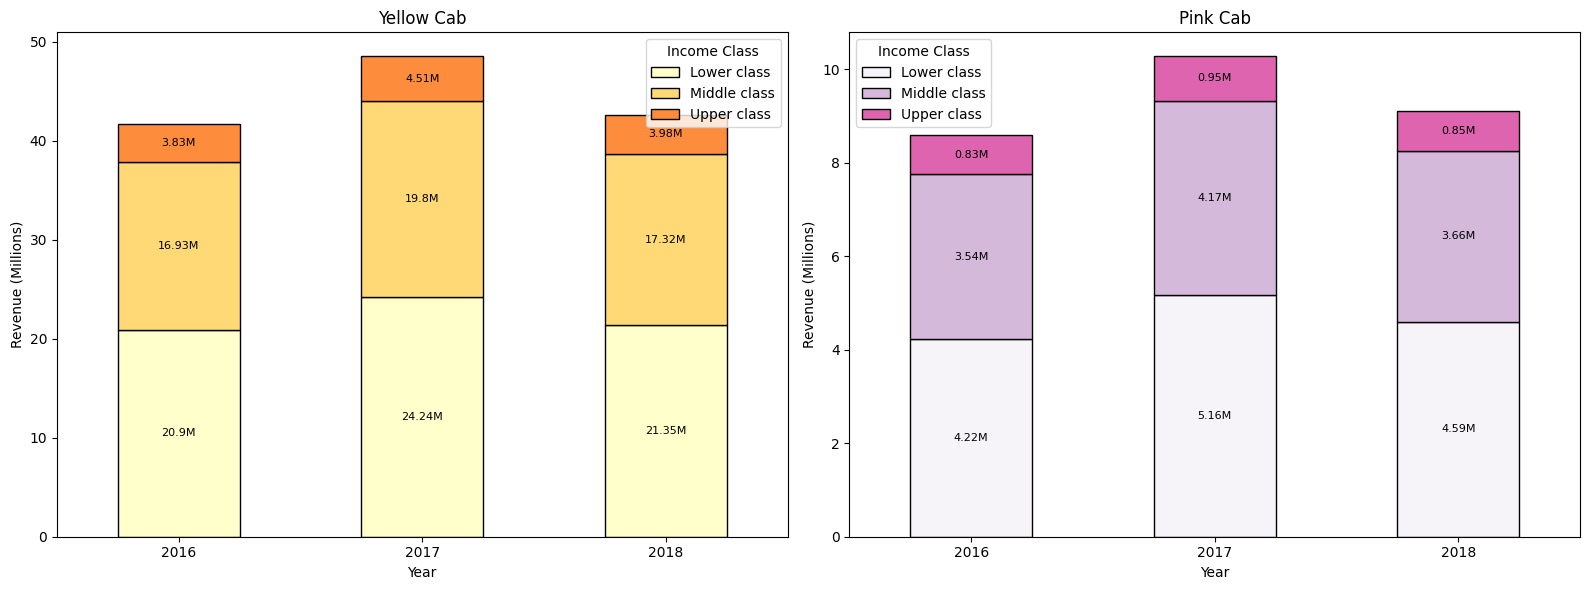

In [124]:
import cmasher as cmr

income_bins = [2500, 15000, 25000, np.inf]
income_labels = ['Lower class', 'Middle class', 'Upper class']
dataset['Income_Class'] = pd.cut(dataset['Income'], bins=income_bins, labels=income_labels, right=False)
revenue_by_company_year_income = dataset.groupby(['Company', 'Year', 'Income_Class'])['Price_Charged'].sum().reset_index()
# Pivot the DataFrame to reshape it for stacked plotting
pivot_table = revenue_by_company_year_income.pivot_table(index=['Company', 'Year'], columns='Income_Class', values='Price_Charged', fill_value=0)

colors_yellow_cab = cmr.take_cmap_colors('YlOrRd', 5, return_fmt='hex')
colors_pink_cab = cmr.take_cmap_colors('PuRd', 5, return_fmt='hex')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Yellow Cab
ax1 = pivot_table.loc['Yellow Cab'].plot.bar(stacked=True, color=colors_yellow_cab, edgecolor='black', ax=axes[0])
ax1.set_title('Yellow Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue (Millions)')
ax1.legend(title='Income Class')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')

# Pink Cab
ax2 = pivot_table.loc['Pink Cab'].plot.bar(stacked=True, color=colors_pink_cab, edgecolor='black', ax=axes[1])
ax2.set_title('Pink Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (Millions)')
ax2.legend(title='Income Class')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')


# Annotate for Yellow Cab
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    convert_to_millions = round(height / 1000000, 2)
    in_millions = str(convert_to_millions)
    ax1.annotate(f'{in_millions}M', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

# Annotate for Yellow Cab for Pink Cab
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    convert_to_millions = round(height / 1000000, 2)
    in_millions = str(convert_to_millions)
    ax2.annotate(f'{in_millions}M', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

# Convert y-axis to million scale
for ax in [ax1, ax2]:
    ax.set_yticklabels(['{:.0f}'.format(x / 1000000) for x in ax.get_yticks()])

plt.tight_layout()
plt.show()


In [125]:
pivot_table

Income_Class     Lower class  Middle class  Upper class
Company    Year                                        
Pink Cab   2016   4223281.97    3536134.34    827419.31
           2017   5163630.06    4167889.26    945104.41
           2018   4590516.35    3664374.23    849114.10
Yellow Cab 2016  20904007.97   16926948.88   3832582.48
           2017  24238429.16   19799063.00   4508129.27
           2018  21348325.29   17321544.81   3977489.66

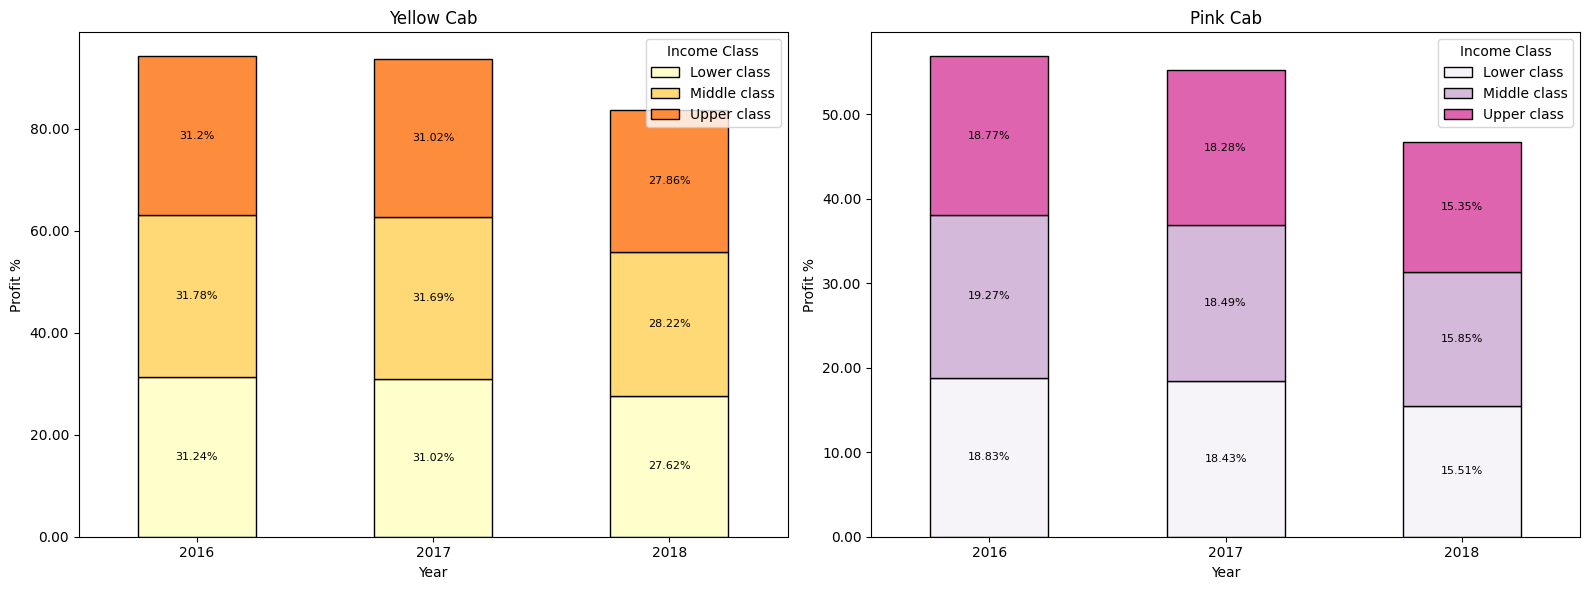

In [126]:
import cmasher as cmr

income_bins = [2500, 15000, 25000, np.inf]
income_labels = ['Lower class', 'Middle class', 'Upper class']
dataset['Income_Class'] = pd.cut(dataset['Income'], bins=income_bins, labels=income_labels, right=False)
revenue_by_company_year_income = dataset.groupby(['Company', 'Year', 'Income_Class'])['Profit_Percentage'].mean().reset_index()
# Pivot the DataFrame to reshape it for stacked plotting
pivot_table = revenue_by_company_year_income.pivot_table(index=['Company', 'Year'], columns='Income_Class', values='Profit_Percentage', fill_value=0)

colors_yellow_cab = cmr.take_cmap_colors('YlOrRd', 5, return_fmt='hex')
colors_pink_cab = cmr.take_cmap_colors('PuRd', 5, return_fmt='hex')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Yellow Cab
ax1 = pivot_table.loc['Yellow Cab'].plot.bar(stacked=True, color=colors_yellow_cab, edgecolor='black', ax=axes[0])
ax1.set_title('Yellow Cab')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit %')
ax1.legend(title='Income Class')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')

# Pink Cab
ax2 = pivot_table.loc['Pink Cab'].plot.bar(stacked=True, color=colors_pink_cab, edgecolor='black', ax=axes[1])
ax2.set_title('Pink Cab')
ax2.set_xlabel('Year')
ax2.set_ylabel('Profit %')
ax2.legend(title='Income Class')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')

#  Yellow Cab
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    round_percent = round(height, 2)
    ax1.annotate(f'{round_percent}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')
# Pink Cab
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    round_percent = round(height, 2)
    #in_millions = str(convert_to_millions)
    ax2.annotate(f'{round_percent}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

# Convert y-axis to million scale
for ax in [ax1, ax2]:
    ax.set_yticklabels(['{:.2f}'.format(x) for x in ax.get_yticks()])

plt.tight_layout()
plt.show()


# **Hypothesis Testing**

**Hypothesis 1: Company with Maximum Cab Users**




In [127]:
data=merged_df.copy()

In [142]:

pink_cab_data_Price = data[data['Company'] == 'Pink Cab']['Price_Charged']
yellow_cab_data_Price = data[data['Company'] == 'Yellow Cab']['Price_Charged']

#  t-test
t_statistic, p_value = ttest_ind(pink_cab_data_Price, yellow_cab_data_Price)

if p_value < 0.05:
    print("Reject the null hypothesis: Between Pink Cab and Yellow Cab, the average price charged differs significantly.")
else:
    print("Fail to reject the null hypothesis: The average cost charged by Pink Cab and Yellow Cab is not much different.")

Reject the null hypothesis: Between Pink Cab and Yellow Cab, the average price charged differs significantly.


**Hypothesis 2: Effect of Holidays on Cab Usage**

In [136]:
holiday_data = data[data['Holiday'] == 'Holiday']['Users']
non_holiday_data = data[data['Holiday'] == 'Non-Holiday']['Users']

# t-test
t_statistic, p_value = ttest_ind(holiday_data, non_holiday_data)
if p_value < 0.05:
    print("Reject the null hypothesis: The use of taxis varies significantly between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis: Holidays and non-holidays do not significantly differ in terms of taxi utilization. ")

Fail to reject the null hypothesis: Holidays and non-holidays do not significantly differ in terms of taxi utilization. 


**Hypothesis 3: Seasonality in Cab Usage**

In [137]:
# We are going to assume seasons as Spring in Months (3,4,5), Summer (6,7,8), Autumn (9,10,11),  Winter (12,1,2)
spring_data = data[data['Month'].isin([3, 4, 5])]['Users']
summer_data = data[data['Month'].isin([6, 7, 8])]['Users']
fall_data = data[data['Month'].isin([9, 10, 11])]['Users']
winter_data = data[data['Month'].isin([12, 1, 2])]['Users']

#  ANOVA test
f_statistic, p_value = f_oneway(spring_data, summer_data, fall_data, winter_data)
if p_value < 0.05:
    print("Reject the null hypothesis: The use of taxis varies significantly depending on the season.")
else:
    print("Fail to reject the null hypothesis: Seasons do not significantly affect the amount of time spent in taxis.")



Reject the null hypothesis: The use of taxis varies significantly depending on the season.


**Hypothesis 4: Impact of Payment Mode on Cab Usage**

In [138]:
contingency_table = pd.crosstab(data['Payment_Mode'], data['Users'])

# chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < 0.05:
    print("Reject the null hypothesis: The form of payment and the use of taxis are significantly correlated.")
else:
    print("Fail to reject the null hypothesis: The form of payment and the use of taxis are not significantly correlated.")


Reject the null hypothesis: The form of payment and the use of taxis are significantly correlated.


**Hypothesis 5: Impact of City Population on Cab Usage**

In [139]:
# Fit linear regression model
X = sm.add_constant(data['Population'])
y = data['Users']
model = sm.OLS(y, X).fit()

if model.pvalues['Population'] < 0.05:
    print("Reject the null hypothesis: The population of the city has a big influence on how many taxis are used.")
else:
    print("Fail to reject the null hypothesis: the population of the city has no discernible effect on the use of taxis.")


Reject the null hypothesis: The population of the city has a big influence on how many taxis are used.


**Hypothesis 6: Impact of Distance Travelled on Profit**

In [140]:
#Correlation
correlation, p_value = pearsonr(data['KM_Travelled'], data['Profit'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a strong correlation between profit and KM_Travelled")
else:
    print("Fail to reject the null hypothesis: there is no discernible relationship between KM_Travelled and Profit.")

Correlation coefficient: 0.4646364048427806
P-value: 0.0
There is a strong correlation between profit and KM_Travelled


**Hypothesis 7: Profit is proportional to increase in customers**

In [141]:
from scipy.stats import linregress

# linear regression to get slope value
slope, intercept, r_value, p_value, std_err = linregress(range(total_customers), customer_profit_mean.values)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (correlation coefficient):", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


if p_value < 0.05:
    print("Reject the null hypothesis. The quantity of customers and profit margins are significantly correlated.")
    if slope > 0:
        print("The link is proportional: profit margins rise in tandem with an increase in the number of clients.")
    else:
        print("The relationship is inversely proportional, meaning that profit margins fall as client numbers rise.")
else:
    print("Fail to reject the null hypothesis. The quantity of customers and profit margins don't significantly correlate.")


Slope: -0.0004528057609286455
Intercept: 35.80990345103224
R-value (correlation coefficient): -0.39458225927960383
P-value: 0.0
Standard error: 5.2792257834810396e-06
Reject the null hypothesis. The quantity of customers and profit margins are significantly correlated.
The relationship is inversely proportional, meaning that profit margins fall as client numbers rise.


**Conclusion**

Based on the analysis of cab service data, Yellow Cab emerges as the most promising investment opportunity for XYZ. The company demonstrates strong revenue performance, market presence, and profitability potential compared to Pink Cab. Yellow Cab's effective revenue optimization strategies, diverse customer base, and competitive pricing make it a favorable investment choice. By investing in Yellow Cab, XYZ can capitalize on the company's growth and maximize returns on their investment.